# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:

plt.rc('font', family='NanumGothic')




In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [5]:
path = 'C:/Users/tkdal/Desktop/covid19/dataset/'

case = p_info = pd.read_csv(path+'Case.csv')
Patient_Info = pd.read_csv(path+'PatientInfo.csv')
patient_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
time_age = pd.read_csv(path+'TimeAge.csv')
time_gender = pd.read_csv(path+'TimeGender.csv')
time_province = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search_trend = pd.read_csv(path+'SearchTrend.csv')

# 1. case csv

# case csv 살펴보기

In [6]:
# case csv의 정보

'''
1. case_id(7) - region_code(5)(region) + case_number(2)
2. province - 특별시, 광역시, 도
3. city - 시, 군, 구(from other city = 다른도시에서 시작함)
4. group - true = infection_case의 명칭이 정확한 것,
False는 contact with patient, overseas inflow, etc처럼 그룹이 아닌 경우
5. infection_case - overseas inflow는 다른나라에서 감염되어 들어온 것,
etc는 개인감염, 조사후 분류진행중, 조사중인 경우
6. confirmed - 확진자 수
7. latitude - group의 위도
8. longitude - group의 경도
'''
case.head()

case_id province           city  group                 infection_case  \
0  1000001    Seoul        Guro-gu   True            Guro-gu Call Center   
1  1000002    Seoul  Dongdaemun-gu   True                  Dongan Church   
2  1000003    Seoul   Eunpyeong-gu   True  Eunpyeong St. Mary's Hospital   
3  1000004    Seoul   Seongdong-gu   True               Seongdong-gu APT   
4  1000005    Seoul      Jongno-gu   True        Jongno Community Center   

   confirmed   latitude   longitude  
0         79  37.508163  126.884387  
1         24  37.592888  127.056766  
2         14   37.63369    126.9165  
3         13   37.55713    127.0403  
4         10   37.57681     127.006

In [7]:
# case 데이터프레임의 행과 열 갯수
case.shape

(81, 8)

In [8]:
# case 데이터프레임의 정보(데이터타입, 메모리 등)
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
case_id           81 non-null int64
province          81 non-null object
city              81 non-null object
group             81 non-null bool
infection_case    81 non-null object
confirmed         81 non-null int64
latitude          81 non-null object
longitude         81 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [9]:
# case 데이터프레임의 결측치 -> '-'로 표시됨
# case.isnull().sum()
case

case_id          province             city  group  \
0   1000001             Seoul          Guro-gu   True   
1   1000002             Seoul    Dongdaemun-gu   True   
2   1000003             Seoul     Eunpyeong-gu   True   
3   1000004             Seoul     Seongdong-gu   True   
4   1000005             Seoul        Jongno-gu   True   
..      ...               ...              ...    ...   
76  6100004  Gyeongsangnam-do      Changwon-si   True   
77  6100005  Gyeongsangnam-do  Changnyeong-gun   True   
78  6100006  Gyeongsangnam-do  from other city   True   
79  6100007  Gyeongsangnam-do                -  False   
80  7000001           Jeju-do                -  False   

                   infection_case  confirmed   latitude   longitude  
0             Guro-gu Call Center         79  37.508163  126.884387  
1                   Dongan Church         24  37.592888  127.056766  
2   Eunpyeong St. Mary's Hospital         14   37.63369    126.9165  
3                Seongdong-gu APT         13   37.55713    127.0403  
4         Jongno Community Center         10   37.57681     127.006  
..                            ...        ...        ...         ...  
76     Hanmaeum Changwon Hospital          7   35.22115    128.6866  
77       Changnyeong Coin Karaoke          7   35.54127    128.5008  
78                  Onchun Church          2          -           -  
79                            etc         19          -           -  
80                            etc          4          -           -  

[81 rows x 8 columns]

# case csv 각 column별 정보

In [10]:
# case_id 컬럼의 값들 합계 확인
case['case_id'].value_counts() # 1500003 얘 뭔데 2냐?

1500003    2
6000005    1
4100001    1
1300001    1
1300002    1
          ..
1600001    1
1400002    1
6100002    1
1400001    1
1200001    1
Name: case_id, Length: 80, dtype: int64

In [11]:
# province 컬럼의 값들 합계 확인
case['province'].value_counts()

Gyeongsangbuk-do     9
Seoul                8
Gyeonggi-do          7
Busan                7
Gyeongsangnam-do     7
Incheon              5
Daejeon              4
Chungcheongbuk-do    4
Jeollabuk-do         4
Gwangju              4
Jeollanam-do         4
Daegu                4
Sejong               4
Ulsan                3
Chungcheongnam-do    3
Gangwon-do           3
Jeju-do              1
Name: province, dtype: int64

In [12]:
# city 컬럼의 값들 합계 확인
case['city'].value_counts() # from other city이거 이해안됨

-                  30
from other city    22
Gyeongsan-si        3
Geochang-gun        2
Seongnam-si         2
Dongdaemun-gu       1
Chilgok-gun         1
Bonghwa-gun         1
Cheongdo-gun        1
Jung-gu             1
Boram-dong          1
Seosan-si           1
Suyeong-gu          1
Jin-gu              1
Cheonan-si          1
Haeundae-gu         1
Changwon-si         1
Guro-gu             1
Goesan-gun          1
Eunpyeong-gu        1
Suwon-si            1
Nam-gu              1
Jongno-gu           1
Eojin-dong          1
Dongnae-gu          1
Seongdong-gu        1
Changnyeong-gun     1
Name: city, dtype: int64

In [13]:
# group 컬럼의 값들 합계 확인
case['group'].value_counts()

True     51
False    30
Name: group, dtype: int64

In [14]:
# confirmed 컬럼의 값들 합계 확인
case['confirmed'].value_counts()

1       11
6        7
2        7
8        6
10       5
4        5
7        3
3        3
32       3
28       2
16       2
22       2
19       2
5        1
649      1
18       1
11       1
13       1
14       1
17       1
119      1
517      1
24       1
25       1
34       1
1056     1
47       1
49       1
4359     1
58       1
65       1
322      1
79       1
9        1
104      1
20       1
Name: confirmed, dtype: int64

In [15]:
# infection_case 컬럼의 값들 합계 확인
case['infection_case'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Guro-gu Call Center                       3
Cheongdo Daenam Hospital                  3
Onchun Church                             2
Seosan-si Laboratory                      2
gym facility in Cheonan                   2
Gyeongsan Cham Joeun Community Center     1
gym facility in Sejong                    1
Goesan-gun Jangyeon-myeon                 1
Ministry of Oceans and Fisheries          1
Haeundae-gu Catholic Church               1
Suyeong-gu Kindergarten                   1
Jongno Community Center                   1
Pilgrimage to Israel                      1
Gyeongsan Jeil Silver Town                1
Bonghwa Pureun Nursing Home               1
Seongdong-gu APT                          1
Jung-gu Fashion Company                   1
Changnyeong Coin Karaoke                  1
River of Grace Community Church 

In [16]:
# latitude 컬럼의 값들 합계 확인
case['latitude'].value_counts()

-            52
37.2376       1
37.63369      1
35.82558      1
35.84008      1
35.64887      1
35.54127      1
36.504713     1
36.82422      1
37.592888     1
35.84819      1
36.48025      1
37.508163     1
37.38833      1
37.55713      1
35.21628      1
35.20599      1
35.16708      1
35.68556      1
37.57681      1
36.0581       1
37.562405     1
37.455687     1
36.81503      1
36.92757      1
35.805681     1
35.17371      1
35.22115      1
37.000354     1
35.782149     1
Name: latitude, dtype: int64

In [17]:
# longitude 컬럼의 값들 합계 확인
case['longitude'].value_counts()

-             52
128.7373       1
129.0771       1
128.7368       1
127.161627     1
128.6866       1
127.9127       1
127.917805     1
128.9099       1
127.9552       1
126.9165       1
126.984377     1
127.289        1
128.7621       1
127.265172     1
128.5008       1
127.0517       1
128.801498     1
127.056766     1
128.5667       1
128.4941       1
129.0633       1
129.1124       1
126.884387     1
127.006        1
129.1256       1
126.354443     1
127.1139       1
127.0403       1
127.1218       1
Name: longitude, dtype: int64

# 집단감염된 곳에 따른 확진자 수 파악

In [18]:
# infection_case - confirmed 연계
df_location = pd.DataFrame(case.groupby(['infection_case'])['confirmed'].max())
df_location = df_location.sort_values(by=['confirmed'], ascending=False).reset_index()
df_location = df_location[:5] # 상위 5개
df_location

infection_case  confirmed
0        Shincheonji Church       4359
1                       etc       1056
2      contact with patient        649
3  Cheongdo Daenam Hospital        119
4   gym facility in Cheonan        104

In [19]:
from plotnine import *

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


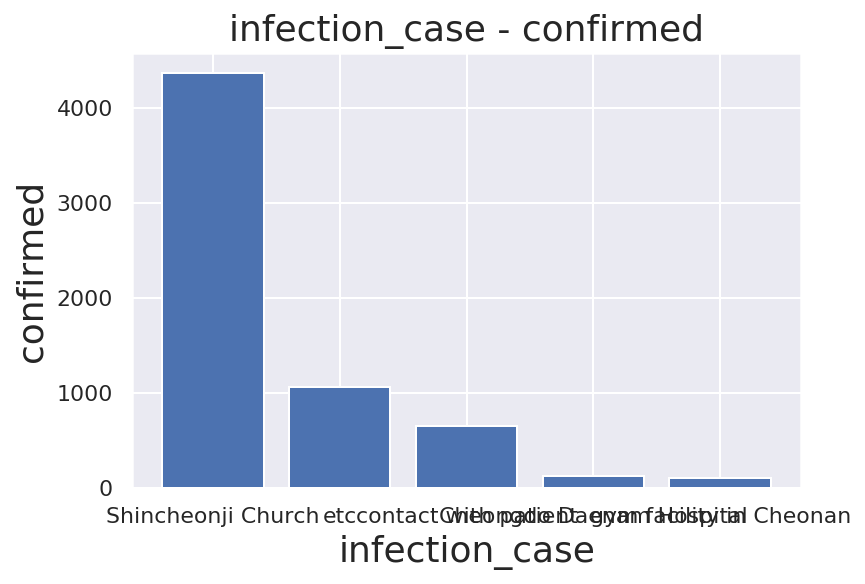

In [20]:
plt.bar(df_location['infection_case'], df_location['confirmed'])

plt.title('infection_case - confirmed', fontsize=18)
plt.xlabel('infection_case', fontsize=18)
plt.ylabel('confirmed', fontsize=18)


plt.show()

# 2. Patient

# 2-1. Patient Info

In [21]:
Patient_Info.head(20)

patient_id  global_num     sex  birth_year  age country province  \
0   1000000001         2.0    male      1964.0  50s   Korea    Seoul   
1   1000000002         5.0    male      1987.0  30s   Korea    Seoul   
2   1000000003         6.0    male      1964.0  50s   Korea    Seoul   
3   1000000004         7.0    male      1991.0  20s   Korea    Seoul   
4   1000000005         9.0  female      1992.0  20s   Korea    Seoul   
5   1000000006        10.0  female      1966.0  50s   Korea    Seoul   
6   1000000007        11.0    male      1995.0  20s   Korea    Seoul   
7   1000000008        13.0    male      1992.0  20s   Korea    Seoul   
8   1000000009        19.0    male      1983.0  30s   Korea    Seoul   
9   1000000010        21.0  female      1960.0  60s   Korea    Seoul   
10  1000000011        23.0  female      1962.0  50s   China    Seoul   
11  1000000012        24.0    male      1992.0  20s   Korea    Seoul   
12  1000000013        29.0    male      1938.0  80s   Korea    Seoul   
13  1000000014        30.0  female      1952.0  60s   Korea    Seoul   
14  1000000015        40.0    male      1943.0  70s   Korea    Seoul   
15  1000000016        56.0    male      1945.0  70s   Korea    Seoul   
16  1000000017        83.0    male      1944.0  70s   Korea    Seoul   
17  1000000018       111.0    male      2000.0  20s   Korea    Seoul   
18  1000000019       112.0  female      1941.0  70s   Korea    Seoul   
19  1000000020       121.0  female      1944.0  70s   Korea    Seoul   

            city disease        infection_case  infection_order   infected_by  \
0     Gangseo-gu     NaN       overseas inflow              1.0           NaN   
1    Jungnang-gu     NaN       overseas inflow              1.0           NaN   
2      Jongno-gu     NaN  contact with patient              2.0  2.002000e+09   
3        Mapo-gu     NaN       overseas inflow              1.0           NaN   
4    Seongbuk-gu     NaN  contact with patient              2.0  1.000000e+09   
5      Jongno-gu     NaN  contact with patient              3.0  1.000000e+09   
6      Jongno-gu     NaN  contact with patient              3.0  1.000000e+09   
7            etc     NaN       overseas inflow              1.0           NaN   
8      Songpa-gu     NaN       overseas inflow              2.0           NaN   
9    Seongbuk-gu     NaN  contact with patient              3.0  1.000000e+09   
10  Seodaemun-gu     NaN       overseas inflow              1.0           NaN   
11           etc     NaN       overseas inflow              1.0           NaN   
12     Jongno-gu     NaN  contact with patient              4.0  1.000000e+09   
13     Jongno-gu     NaN  contact with patient              5.0  1.000000e+09   
14  Seongdong-gu     NaN      Seongdong-gu APT              NaN           NaN   
15     Jongno-gu     NaN  contact with patient              4.0  1.000000e+09   
16     Jongno-gu     NaN  contact with patient              3.0  1.000000e+09   
17           etc     NaN                   etc              NaN           NaN   
18     Jongno-gu     NaN  contact with patient              5.0  1.000000e+09   
19  Seongdong-gu     NaN      Seongdong-gu APT              NaN  1.000000e+09   

    contact_number symptom_onset_date confirmed_date released_date  \
0             75.0         2020-01-22     2020-01-23    2020-02-05   
1             31.0                NaN     2020-01-30    2020-03-02   
2             17.0                NaN     2020-01-30    2020-02-19   
3              9.0         2020-01-26     2020-01-30    2020-02-15   
4              2.0                NaN     2020-01-31    2020-02-24   
5             43.0                NaN     2020-01-31    2020-02-19   
6              0.0                NaN     2020-01-31    2020-02-10   
7              0.0                NaN     2020-02-02    2020-02-24   
8             68.0                NaN     2020-02-05    2020-02-21   
9              6.0                NaN     2020-02-05    2020-02-29   
10            23.0 

In [22]:
Patient_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
patient_id            2218 non-null int64
global_num            1314 non-null float64
sex                   2073 non-null object
birth_year            1764 non-null float64
age                   1957 non-null object
country               2218 non-null object
province              2218 non-null object
city                  2153 non-null object
disease               19 non-null object
infection_case        1163 non-null object
infection_order       42 non-null float64
infected_by           469 non-null float64
contact_number        411 non-null float64
symptom_onset_date    193 non-null object
confirmed_date        2077 non-null object
released_date         223 non-null object
deceased_date         32 non-null object
state                 2130 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 312.0+ KB


## 기존에 환자였던 이들 위주로 데이터 파악

In [23]:
have_disease = Patient_Info[~Patient_Info['disease'].isna()]
have_disease

patient_id  global_num     sex  birth_year  age   country  \
388   1200000038        38.0  female      1963.0  50s     Korea   
431   1200001288      1288.0    male      1955.0  60s     Korea   
433   1200001921      1921.0    male      1953.0  60s     Korea   
434   1200002085      2085.0    male      1949.0  70s     Korea   
436   1200002614      2614.0  female      1943.0  70s     Korea   
441   1200003896      3896.0    male      1933.0  80s     Korea   
442   1200003914      3914.0    male      1938.0  80s     Korea   
443   1200004046      4046.0  female      1962.0  50s     Korea   
444   1200005767      5767.0    male      1938.0  80s     Korea   
445   1200007196      7196.0    male      1945.0  70s     Korea   
627   2000000039       875.0    male      1984.0  30s  Mongolia   
917   3014000001         NaN  female         NaN  80s     Korea   
2024  6020100054        54.0    male      1963.0  50s     Korea   
2025  6020100055        55.0    male      1961.0  50s     Korea   
2026  6020100104       104.0    male      1957.0  60s     Korea   
2027  6020100107       107.0    male      1953.0  60s     Korea   
2028  6020100205       205.0  female      1965.0  50s     Korea   
2029  6020100286       286.0    male      1958.0  60s     Korea   
2030  6020100298       298.0    male      1962.0  50s     Korea   

              province          city disease            infection_case  \
388              Daegu        Nam-gu    True                       NaN   
431              Daegu           NaN    True                       NaN   
433              Daegu           NaN    True                       NaN   
434              Daegu           NaN    True                       NaN   
436              Daegu           NaN    True                       NaN   
441              Daegu           NaN    True                       NaN   
442              Daegu           NaN    True                       NaN   
443              Daegu           NaN    True                       NaN   
444              Daegu           NaN    True                       NaN   
445              Daegu           NaN    True                       NaN   
627        Gyeonggi-do  Namyangju-si    True                       etc   
917         Gangwon-do    Taebaek-si    True      contact with patient   
2024  Gyeongsangbuk-do  Cheongdo-gun    True  Cheongdo Daenam Hospital   
2025  Gyeongsangbuk-do  Cheongdo-gun    True  Cheongdo Daenam Hospital   
2026  Gyeongsangbuk-do  Cheongdo-gun    True  Cheongdo Daenam Hospital   
2027  Gyeongsangbuk-do  Cheongdo-gun    True  Cheongdo Daenam Hospital   
2028  Gyeongsangbuk-do  Cheongdo-gun    True  Cheongdo Daenam Hospital   
2029  Gyeongsangbuk-do  Cheongdo-gun    True  Cheongdo Daenam Hospital   
2030  Gyeongsangbuk-do  Cheongdo-gun    True  Cheongdo Daenam Hospital   

      infection_order  infected_by  contact_number symptom_onset_date  \
388               NaN          NaN             NaN                NaN   
431               NaN          NaN             NaN                NaN   
433               NaN          NaN             NaN                NaN   
434               NaN          NaN             NaN                NaN   
436               NaN          NaN             NaN                NaN   
441               NaN          NaN             NaN                NaN   
442               NaN          NaN             NaN                NaN   
443               NaN          NaN             NaN                NaN   
444               NaN          NaN             NaN                NaN   
445               NaN          NaN             NaN                NaN   
627               NaN          NaN             NaN                NaN   
917               NaN          NaN             NaN                NaN   
2024              NaN          NaN             NaN                NaN   
2025              NaN          NaN             NaN                NaN   
2026              NaN          NaN             NaN                NaN   
2027            

In [24]:
have_disease['age'].value_counts()

50s    6
60s    5
80s    4
70s    3
30s    1
Name: age, dtype: int64

In [25]:
have_disease['sex'].value_counts()

male      14
female     5
Name: sex, dtype: int64

In [26]:
import re
date_list1 = []
date_list2 = []
period = []

for date in have_disease['confirmed_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list1.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr1 = pd.Series(data={'confirmed_date':date_list1})
date_sr1 = pd.to_numeric(date_sr1['confirmed_date'])

for date in have_disease['deceased_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list2.append(r.sub("\g<year>\g<month>\g<day>", date))
    
date_sr2 = pd.Series(data={'deceased_date':date_list2})
date_sr2 = pd.to_numeric(date_sr2['deceased_date'])

In [27]:
df = pd.DataFrame(data={'confirmed_date': date_sr1, 'deceased_date': date_sr2})
df.loc[ df['deceased_date'] > 20200229, 'deceased_date'] = df['deceased_date']-71
df.loc[ df['confirmed_date'] > 20200229, 'confirmed_date'] = df['confirmed_date']-71
df['period'] = df['deceased_date'] - df['confirmed_date']
df

confirmed_date  deceased_date  period
0         20200218       20200223       5
1         20200227       20200231       4
2         20200228       20200234       6
3         20200228       20200233       5
4         20200229       20200230       1
5         20200230       20200232       2
6         20200230       20200238       8
7         20200230       20200230       0
8         20200234       20200234       0
9         20200237       20200238       1
10        20200225       20200225       0
11        20200233       20200233       0
12        20200219       20200223       4
13        20200219       20200223       4
14        20200220       20200219      -1
15        20200221       20200224       3
16        20200222       20200221      -1
17        20200222       20200223       1
18        20200222       20200225       3

In [28]:
df['period'].value_counts()

 0    4
 4    3
 1    3
 3    2
 5    2
-1    2
 8    1
 6    1
 2    1
Name: period, dtype: int64

In [29]:
have_disease[have_disease['infection_case'] == 'Cheongdo Daenam Hospital']['age'].value_counts()

50s    4
60s    3
Name: age, dtype: int64

1. 나이는 대부분 50대 이상 환자들
2. 남성 14, 여성 5
3. 기존에 환자였던 코로나 양성 환자들은 전부 사망하였음
4. 19명의 환자들 중 7명이 청도 대남 병원 출신, 1명은 태백시 환자 접촉자
5. 코로나 확진판정 이후 대부분 4일 이내로 사망
6. 특히 청도 대남 병원 출신들은 19~22일 사이에 대부분 사망하였음. (50대 4명, 60대 3명)

## 환자는 아니지만 결국엔 사망했던 사람들 정보 파악

In [30]:
Patient_Info[Patient_Info['state'] == 'deceased']

patient_id  global_num     sex  birth_year  age   country  \
388   1200000038        38.0  female      1963.0  50s     Korea   
427   1200000114       114.0    male      1946.0  70s     Korea   
428   1200000620       620.0    male      1949.0  70s     Korea   
429   1200000901       901.0  female      1934.0  80s     Korea   
430   1200001064      1064.0  female      1943.0  70s     Korea   
431   1200001288      1288.0    male      1955.0  60s     Korea   
432   1200001443      1443.0    male      1945.0  70s     Korea   
433   1200001921      1921.0    male      1953.0  60s     Korea   
434   1200002085      2085.0    male      1949.0  70s     Korea   
435   1200002289      2289.0    male      1954.0  60s     Korea   
436   1200002614      2614.0  female      1943.0  70s     Korea   
437   1200002769      2769.0  female      1934.0  80s     Korea   
438   1200002936      2936.0    male      1939.0  80s     Korea   
439   1200003550      3550.0  female      1951.0  60s     Korea   
440   1200003578      3578.0    male      1930.0  90s     Korea   
441   1200003896      3896.0    male      1933.0  80s     Korea   
442   1200003914      3914.0    male      1938.0  80s     Korea   
443   1200004046      4046.0  female      1962.0  50s     Korea   
444   1200005767      5767.0    male      1938.0  80s     Korea   
445   1200007196      7196.0    male      1945.0  70s     Korea   
627   2000000039       875.0    male      1984.0  30s  Mongolia   
917   3014000001         NaN  female         NaN  80s     Korea   
1611  6002000002         NaN    male      1980.0  40s     Korea   
1910  6015000035      6309.0    male         NaN  70s     Korea   
1946  6016000035         NaN     NaN         NaN  NaN     Korea   
2024  6020100054        54.0    male      1963.0  50s     Korea   
2025  6020100055        55.0    male      1961.0  50s     Korea   
2026  6020100104       104.0    male      1957.0  60s     Korea   
2027  6020100107       107.0    male      1953.0  60s     Korea   
2028  6020100205       205.0  female      1965.0  50s     Korea   
2029  6020100286       286.0    male      1958.0  60s     Korea   
2030  6020100298       298.0    male      1962.0  50s     Korea   

              province           city disease            infection_case  \
388              Daegu         Nam-gu    True                       NaN   
427              Daegu            NaN     NaN        Shincheonji Church   
428              Daegu            NaN     NaN                       NaN   
429              Daegu            NaN     NaN                       NaN   
430              Daegu            NaN     NaN                       NaN   
431              Daegu            NaN    True                       NaN   
432              Daegu            NaN     NaN                       NaN   
433              Daegu            NaN    True                       NaN   
434              Daegu            NaN    True                       NaN   
435              Daegu            NaN     NaN                       NaN   
436              Daegu            NaN    True                       NaN   
437              Daegu            NaN     NaN                       NaN   
438              Daegu            NaN     NaN                       NaN   
439              Daegu            NaN     NaN                       NaN   
440              Daegu            NaN     NaN                       NaN   
441              Daegu            NaN    True                       NaN   
442              Daegu            NaN    True                       NaN   
443              Daegu            NaN    True                       NaN   
444              Daegu            NaN    True                       NaN   
445              Daegu            NaN    True                       NaN   
627        Gyeonggi-do   Namyangju-si    True                       etc   
917         Gangwon-do     Taebaek-si    True      contact with patient   
1611  Gyeongsangbuk-do    Gyeongju-si     NaN                       N

In [31]:
deceased_patient = Patient_Info[Patient_Info['state'] == 'deceased']

In [32]:
not_disease = deceased_patient[~(deceased_patient['disease'] == True)]

In [33]:
not_disease

patient_id  global_num     sex  birth_year  age country  \
427   1200000114       114.0    male      1946.0  70s   Korea   
428   1200000620       620.0    male      1949.0  70s   Korea   
429   1200000901       901.0  female      1934.0  80s   Korea   
430   1200001064      1064.0  female      1943.0  70s   Korea   
432   1200001443      1443.0    male      1945.0  70s   Korea   
435   1200002289      2289.0    male      1954.0  60s   Korea   
437   1200002769      2769.0  female      1934.0  80s   Korea   
438   1200002936      2936.0    male      1939.0  80s   Korea   
439   1200003550      3550.0  female      1951.0  60s   Korea   
440   1200003578      3578.0    male      1930.0  90s   Korea   
1611  6002000002         NaN    male      1980.0  40s   Korea   
1910  6015000035      6309.0    male         NaN  70s   Korea   
1946  6016000035         NaN     NaN         NaN  NaN   Korea   

              province           city disease      infection_case  \
427              Daegu            NaN     NaN  Shincheonji Church   
428              Daegu            NaN     NaN                 NaN   
429              Daegu            NaN     NaN                 NaN   
430              Daegu            NaN     NaN                 NaN   
432              Daegu            NaN     NaN                 NaN   
435              Daegu            NaN     NaN                 NaN   
437              Daegu            NaN     NaN                 NaN   
438              Daegu            NaN     NaN                 NaN   
439              Daegu            NaN     NaN                 NaN   
440              Daegu            NaN     NaN                 NaN   
1611  Gyeongsangbuk-do    Gyeongju-si     NaN                 NaN   
1910  Gyeongsangbuk-do  Yeongcheon-si     NaN                 etc   
1946  Gyeongsangbuk-do    Yecheon-gun     NaN                 NaN   

      infection_order  infected_by  contact_number symptom_onset_date  \
427               NaN          NaN             NaN                NaN   
428               NaN          NaN             NaN                NaN   
429               NaN          NaN             NaN                NaN   
430               NaN          NaN             NaN                NaN   
432               NaN          NaN             NaN                NaN   
435               NaN          NaN             NaN                NaN   
437               NaN          NaN             NaN                NaN   
438               NaN          NaN             NaN                NaN   
439               NaN          NaN             NaN                NaN   
440               NaN          NaN             NaN                NaN   
1611              NaN          NaN             NaN                NaN   
1910              NaN          NaN             NaN                NaN   
1946              NaN          NaN             NaN                NaN   

     confirmed_date released_date deceased_date     state  
427      2020-02-21           NaN    2020-02-26  deceased  
428      2020-02-24           NaN    2020-03-02  deceased  
429      2020-02-25           NaN    2020-03-04  deceased  
430      2020-02-26           NaN    2020-03-01  deceased  
432      2020-02-27           NaN    2020-02-27  deceased  
435      2020-02-28           NaN    2020-03-05  deceased  
437      2020-02-29           NaN    2020-03-02  deceased  
438      2020-02-29           NaN    2020-03-06  deceased  
439      2020-03-01           NaN    2020-03-09  deceased  
440      2020-03-01           NaN    2020-03-07  deceased  
1611     2020-02-22           NaN           NaN  deceased  
1910     2020-03-06           NaN    2020-03-07  deceased  
1946            NaN           NaN           NaN  deceased

In [34]:
not_disease['age'].value_counts()

70s    5
80s    3
60s    2
90s    1
40s    1
Name: age, dtype: int64

In [35]:
not_disease['sex'].value_counts()

male      8
female    4
Name: sex, dtype: int64

In [36]:
not_disease['age'].isna()

427     False
428     False
429     False
430     False
432     False
435     False
437     False
438     False
439     False
440     False
1611    False
1910    False
1946     True
Name: age, dtype: bool

In [37]:
not_disease.dropna(subset = ['confirmed_date', 'deceased_date'], inplace = True)

In [38]:
import re
date_list1 = []
date_list2 = []
period = []

for date in not_disease['confirmed_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list1.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr1 = pd.Series(data={'confirmed_date':date_list1})
date_sr1 = pd.to_numeric(date_sr1['confirmed_date'])

for date in not_disease['deceased_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list2.append(r.sub("\g<year>\g<month>\g<day>", date))
    
date_sr2 = pd.Series(data={'deceased_date':date_list2})
date_sr2 = pd.to_numeric(date_sr2['deceased_date'])

In [39]:
df = pd.DataFrame(data={'confirmed_date': date_sr1, 'deceased_date': date_sr2})
df.loc[ df['deceased_date'] > 20200229, 'deceased_date'] = df['deceased_date']-71
df.loc[ df['confirmed_date'] > 20200229, 'confirmed_date'] = df['confirmed_date']-71
df['period'] = df['deceased_date'] - df['confirmed_date']
df

confirmed_date  deceased_date  period
0         20200221       20200226       5
1         20200224       20200231       7
2         20200225       20200233       8
3         20200226       20200230       4
4         20200227       20200227       0
5         20200228       20200234       6
6         20200229       20200231       2
7         20200229       20200235       6
8         20200230       20200238       8
9         20200230       20200236       6
10        20200235       20200236       1

In [40]:
df['period'].value_counts()

6    3
8    2
7    1
5    1
4    1
2    1
1    1
0    1
Name: period, dtype: int64

In [41]:
not_disease = deceased_patient[~(deceased_patient['disease'] == True)]

In [42]:
not_disease

patient_id  global_num     sex  birth_year  age country  \
427   1200000114       114.0    male      1946.0  70s   Korea   
428   1200000620       620.0    male      1949.0  70s   Korea   
429   1200000901       901.0  female      1934.0  80s   Korea   
430   1200001064      1064.0  female      1943.0  70s   Korea   
432   1200001443      1443.0    male      1945.0  70s   Korea   
435   1200002289      2289.0    male      1954.0  60s   Korea   
437   1200002769      2769.0  female      1934.0  80s   Korea   
438   1200002936      2936.0    male      1939.0  80s   Korea   
439   1200003550      3550.0  female      1951.0  60s   Korea   
440   1200003578      3578.0    male      1930.0  90s   Korea   
1611  6002000002         NaN    male      1980.0  40s   Korea   
1910  6015000035      6309.0    male         NaN  70s   Korea   
1946  6016000035         NaN     NaN         NaN  NaN   Korea   

              province           city disease      infection_case  \
427              Daegu            NaN     NaN  Shincheonji Church   
428              Daegu            NaN     NaN                 NaN   
429              Daegu            NaN     NaN                 NaN   
430              Daegu            NaN     NaN                 NaN   
432              Daegu            NaN     NaN                 NaN   
435              Daegu            NaN     NaN                 NaN   
437              Daegu            NaN     NaN                 NaN   
438              Daegu            NaN     NaN                 NaN   
439              Daegu            NaN     NaN                 NaN   
440              Daegu            NaN     NaN                 NaN   
1611  Gyeongsangbuk-do    Gyeongju-si     NaN                 NaN   
1910  Gyeongsangbuk-do  Yeongcheon-si     NaN                 etc   
1946  Gyeongsangbuk-do    Yecheon-gun     NaN                 NaN   

      infection_order  infected_by  contact_number symptom_onset_date  \
427               NaN          NaN             NaN                NaN   
428               NaN          NaN             NaN                NaN   
429               NaN          NaN             NaN                NaN   
430               NaN          NaN             NaN                NaN   
432               NaN          NaN             NaN                NaN   
435               NaN          NaN             NaN                NaN   
437               NaN          NaN             NaN                NaN   
438               NaN          NaN             NaN                NaN   
439               NaN          NaN             NaN                NaN   
440               NaN          NaN             NaN                NaN   
1611              NaN          NaN             NaN                NaN   
1910              NaN          NaN             NaN                NaN   
1946              NaN          NaN             NaN                NaN   

     confirmed_date released_date deceased_date     state  
427      2020-02-21           NaN    2020-02-26  deceased  
428      2020-02-24           NaN    2020-03-02  deceased  
429      2020-02-25           NaN    2020-03-04  deceased  
430      2020-02-26           NaN    2020-03-01  deceased  
432      2020-02-27           NaN    2020-02-27  deceased  
435      2020-02-28           NaN    2020-03-05  deceased  
437      2020-02-29           NaN    2020-03-02  deceased  
438      2020-02-29           NaN    2020-03-06  deceased  
439      2020-03-01           NaN    2020-03-09  deceased  
440      2020-03-01           NaN    2020-03-07  deceased  
1611     2020-02-22           NaN           NaN  deceased  
1910     2020-03-06           NaN    2020-03-07  deceased  
1946            NaN           NaN           NaN  deceased

In [43]:
not_disease[not_disease['province'] == 'Daegu']['age'].value_counts()

70s    4
80s    3
60s    2
90s    1
Name: age, dtype: int64

1. 이 역시 대부분 2명을 제외하고는 모두 50대 이상 (40대 1명, NaN 데이터 1명)
2. 남성 8명, 여성 4명 (NaN 데이터 1명)
3. 신천지 관련 환자 1명 (70대 남성)
4. '대구'지역 환자가 전체 13명중 10명으로 높은 비율을 차지
5. 기존에 환자였던 사람들에 비해 생존기간이 더 길었음. 대부분 4일 이상
##### 데이터를 확인해보니 state에 어떤 라벨이 있는지 궁금해졌음

In [44]:
Patient_Info['state'].value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

In [45]:
Patient_Info[Patient_Info['state'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 802 to 2213
Data columns (total 18 columns):
patient_id            88 non-null int64
global_num            81 non-null float64
sex                   88 non-null object
birth_year            88 non-null float64
age                   1 non-null object
country               88 non-null object
province              88 non-null object
city                  88 non-null object
disease               0 non-null object
infection_case        87 non-null object
infection_order       0 non-null float64
infected_by           67 non-null float64
contact_number        2 non-null float64
symptom_onset_date    6 non-null object
confirmed_date        88 non-null object
released_date         0 non-null object
deceased_date         0 non-null object
state                 0 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 13.1+ KB


In [46]:
Patient_Info[Patient_Info['state'].isna()]

patient_id  global_num     sex  birth_year  age country  \
802   2000000214      8168.0  female      1967.0  NaN   Korea   
803   2000000215      8195.0  female      1974.0  NaN   Korea   
804   2000000216      8212.0  female      1963.0  NaN   Korea   
805   2000000217      8205.0  female      1954.0  NaN   Korea   
806   2000000218      8184.0  female      1992.0  NaN   Korea   
...          ...         ...     ...         ...  ...     ...   
885   2000000297      8473.0  female      1969.0  NaN   Korea   
886   2000000298      8503.0  female      1969.0  NaN   Korea   
887   2000000299         NaN  female      1985.0  NaN   Korea   
888   2000000300         NaN    male      1989.0  NaN   Korea   
2213  6100000085         NaN    male      1990.0  30s   Korea   

              province          city disease        infection_case  \
802        Gyeonggi-do   Seongnam-si     NaN  contact with patient   
803        Gyeonggi-do    Bucheon-si     NaN  contact with patient   
804        Gyeonggi-do   Seongnam-si     NaN                   etc   
805        Gyeonggi-do   Seongnam-si     NaN  contact with patient   
806        Gyeonggi-do   Seongnam-si     NaN  contact with patient   
...                ...           ...     ...                   ...   
885        Gyeonggi-do   Seongnam-si     NaN  contact with patient   
886        Gyeonggi-do  Namyangju-si     NaN  contact with patient   
887        Gyeonggi-do  Namyangju-si     NaN       overseas inflow   
888        Gyeonggi-do   Seongnam-si     NaN       overseas inflow   
2213  Gyeongsangnam-do   Changwon-si     NaN                   NaN   

      infection_order   infected_by  contact_number symptom_onset_date  \
802               NaN  2.000000e+09             2.0                NaN   
803               NaN  2.000000e+09             NaN                NaN   
804               NaN           NaN            11.0         2020-03-13   
805               NaN  2.000000e+09             NaN                NaN   
806               NaN  2.000000e+09             NaN                NaN   
...               ...           ...             ...                ...   
885               NaN           NaN             NaN                NaN   
886               NaN  2.000000e+09             NaN                NaN   
887               NaN           NaN             NaN                NaN   
888               NaN           NaN             NaN                NaN   
2213              NaN           NaN             NaN                NaN   

     confirmed_date released_date deceased_date state  
802      2020-03-15           NaN           NaN   NaN  
803      2020-03-15           NaN           NaN   NaN  
804      2020-03-15           NaN           NaN   NaN  
805      2020-03-15           NaN           NaN   NaN  
806      2020-03-15           NaN           NaN   NaN  
...             ...           ...           ...   ...  
885      2020-03-18           NaN           NaN   NaN  
886      2020-03-18           NaN           NaN   NaN  
887      2020-03-18           NaN           NaN   NaN  
888      2020-03-18           NaN           NaN   NaN  
2213     2020-03-16           NaN           NaN   NaN  

[88 rows x 18 columns]

## 치료된 환자

In [47]:
released_patient = Patient_Info[Patient_Info['state'] == 'released']

In [48]:
released_patient

patient_id  global_num     sex  birth_year  age country  \
0     1000000001         2.0    male      1964.0  50s   Korea   
1     1000000002         5.0    male      1987.0  30s   Korea   
2     1000000003         6.0    male      1964.0  50s   Korea   
3     1000000004         7.0    male      1991.0  20s   Korea   
4     1000000005         9.0  female      1992.0  20s   Korea   
...          ...         ...     ...         ...  ...     ...   
2208  6102000080         NaN  female      1969.0  50s   Korea   
2210  6102000082         NaN    male      1963.0  50s   Korea   
2211  6101000083         NaN    male      1992.0  20s   Korea   
2215  7000000002       222.0  female      1998.0  20s   Korea   
2216  7000000003      4345.0  female      1972.0  40s   Korea   

              province          city disease        infection_case  \
0                Seoul    Gangseo-gu     NaN       overseas inflow   
1                Seoul   Jungnang-gu     NaN       overseas inflow   
2                Seoul     Jongno-gu     NaN  contact with patient   
3                Seoul       Mapo-gu     NaN       overseas inflow   
4                Seoul   Seongbuk-gu     NaN  contact with patient   
...                ...           ...     ...                   ...   
2208  Gyeongsangnam-do  Geochang-gun     NaN                   NaN   
2210  Gyeongsangnam-do  Geochang-gun     NaN                   NaN   
2211  Gyeongsangnam-do      Geoje-si     NaN                   NaN   
2215           Jeju-do       Jeju-do     NaN                   etc   
2216           Jeju-do           etc     NaN                   etc   

      infection_order   infected_by  contact_number symptom_onset_date  \
0                 1.0           NaN            75.0         2020-01-22   
1                 1.0           NaN            31.0                NaN   
2                 2.0  2.002000e+09            17.0                NaN   
3                 1.0           NaN             9.0         2020-01-26   
4                 2.0  1.000000e+09             2.0                NaN   
...               ...           ...             ...                ...   
2208              NaN           NaN             NaN                NaN   
2210              NaN           NaN             NaN                NaN   
2211              NaN           NaN             NaN                NaN   
2215              NaN           NaN            84.0                NaN   
2216              NaN           NaN            21.0                NaN   

     confirmed_date released_date deceased_date     state  
0        2020-01-23    2020-02-05           NaN  released  
1        2020-01-30    2020-03-02           NaN  released  
2        2020-01-30    2020-02-19           NaN  released  
3        2020-01-30    2020-02-15           NaN  released  
4        2020-01-31    2020-02-24           NaN  released  
...             ...           ...           ...       ...  
2208     2020-03-06           NaN           NaN  released  
2210     2020-03-07           NaN           NaN  released  
2211     2020-03-10           NaN           NaN  released  
2215     2020-02-22    2020-03-07           NaN  released  
2216     2020-03-02    2020-03-15           NaN  released  

[307 rows x 18 columns]

In [49]:
released_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 2216
Data columns (total 18 columns):
patient_id            307 non-null int64
global_num            175 non-null float64
sex                   306 non-null object
birth_year            277 non-null float64
age                   305 non-null object
country               307 non-null object
province              307 non-null object
city                  294 non-null object
disease               0 non-null object
infection_case        215 non-null object
infection_order       32 non-null float64
infected_by           89 non-null float64
contact_number        124 non-null float64
symptom_onset_date    34 non-null object
confirmed_date        307 non-null object
released_date         223 non-null object
deceased_date         2 non-null object
state                 307 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 45.6+ KB


In [50]:
index_list = released_patient[~released_patient['deceased_date'].isna()].index

In [51]:
released_patient.drop(index_list, inplace = True)

In [52]:
released_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 2216
Data columns (total 18 columns):
patient_id            305 non-null int64
global_num            173 non-null float64
sex                   304 non-null object
birth_year            275 non-null float64
age                   303 non-null object
country               305 non-null object
province              305 non-null object
city                  292 non-null object
disease               0 non-null object
infection_case        213 non-null object
infection_order       32 non-null float64
infected_by           88 non-null float64
contact_number        124 non-null float64
symptom_onset_date    34 non-null object
confirmed_date        305 non-null object
released_date         223 non-null object
deceased_date         0 non-null object
state                 305 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 45.3+ KB


In [53]:
released_patient['age'].value_counts()

20s    90
50s    56
30s    48
40s    48
60s    18
10s    17
70s    15
0s      8
80s     3
Name: age, dtype: int64

In [54]:
released_patient['sex'].value_counts()

female    171
male      133
Name: sex, dtype: int64

In [55]:
released_patient['infection_case'].value_counts()

contact with patient             80
etc                              50
Shincheonji Church               26
overseas inflow                  22
Onchun Church                    15
gym facility in Cheonan           8
Eunpyeong St. Mary's Hospital     7
Suyeong-gu Kindergarten           2
Seongdong-gu APT                  1
Cheongdo Daenam Hospital          1
Pilgrimage to Israel              1
Name: infection_case, dtype: int64

In [56]:
released_patient['province'].value_counts()

Gyeongsangbuk-do     87
Seoul                57
Busan                37
Gyeongsangnam-do     31
Chungcheongnam-do    30
Gyeonggi-do          16
Ulsan                10
Gwangju               8
Daejeon               7
Gangwon-do            6
Jeollabuk-do          4
Daegu                 4
Chungcheongbuk-do     2
Jeollanam-do          2
Incheon               2
Jeju-do               2
Name: province, dtype: int64

In [57]:
df = pd.DataFrame({'confirmed_date':released_patient['confirmed_date'], 'released_date':released_patient['released_date']})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 2216
Data columns (total 2 columns):
confirmed_date    305 non-null object
released_date     223 non-null object
dtypes: object(2)
memory usage: 7.1+ KB


In [58]:
df = df[~df['released_date'].isna()]
df

confirmed_date released_date
0        2020-01-23    2020-02-05
1        2020-01-30    2020-03-02
2        2020-01-30    2020-02-19
3        2020-01-30    2020-02-15
4        2020-01-31    2020-02-24
...             ...           ...
2060     2020-02-28    2020-03-10
2062     2020-02-29    2020-03-12
2071     2020-03-03    2020-03-14
2215     2020-02-22    2020-03-07
2216     2020-03-02    2020-03-15

[223 rows x 2 columns]

In [59]:
import re
from datetime import date
date_list1 = []
date_list2 = []
period = []

for date in df['confirmed_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list1.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr1 = pd.Series(data={'confirmed_date':date_list1})
date_sr1 = pd.to_datetime(date_sr1['confirmed_date'])

for date in df['released_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list2.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr2 = pd.Series(data={'released_date':date_list2})
date_sr2 = pd.to_datetime(date_sr2['released_date'])
df_ = pd.DataFrame(data={'confirmed_date': date_sr1, 'released_date': date_sr2})
df_

confirmed_date released_date
0       2020-01-23    2020-02-05
1       2020-01-30    2020-03-02
2       2020-01-30    2020-02-19
3       2020-01-30    2020-02-15
4       2020-01-31    2020-02-24
..             ...           ...
218     2020-02-28    2020-03-10
219     2020-02-29    2020-03-12
220     2020-03-03    2020-03-14
221     2020-02-22    2020-03-07
222     2020-03-02    2020-03-15

[223 rows x 2 columns]

In [60]:
df_['period'] = df_['released_date'] - df_['confirmed_date']
df_period = df_['period'].dt.days

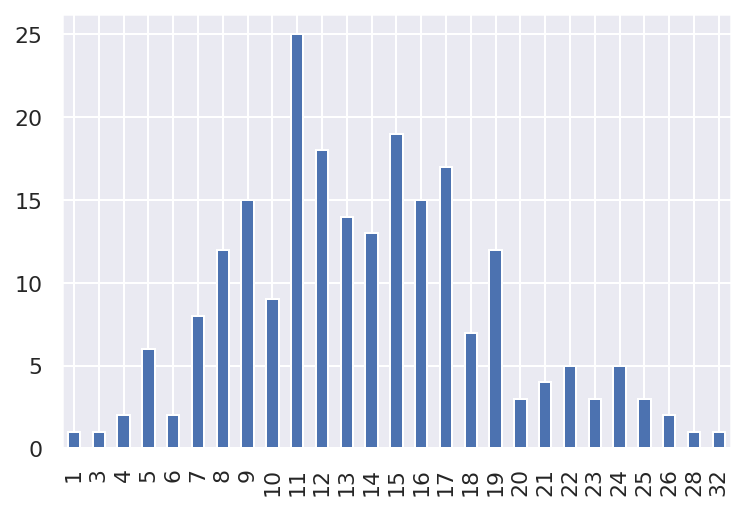

In [61]:
df_period.value_counts().sort_index().plot(kind = 'bar')

In [62]:
released_patient['released_date'].value_counts().sort_index()

2020-02-05     1
2020-02-06     1
2020-02-09     1
2020-02-10     1
2020-02-12     3
2020-02-15     2
2020-02-17     1
2020-02-18     2
2020-02-19     2
2020-02-20     2
2020-02-21     1
2020-02-24     4
2020-02-26     2
2020-02-27     3
2020-02-28     1
2020-02-29     2
2020-03-01     1
2020-03-02     3
2020-03-03     9
2020-03-04    14
2020-03-05     5
2020-03-06    10
2020-03-07     3
2020-03-08     2
2020-03-09     4
2020-03-10     7
2020-03-11    18
2020-03-12    15
2020-03-13    23
2020-03-14    23
2020-03-15     9
2020-03-16    17
2020-03-17    14
2020-03-18    15
2020-03-19     2
Name: released_date, dtype: int64

1. 완치되었지만 deceased_date가 있는 환자가 존재하여 의미를 알수 없어 일단 drop했음
2. 완치된 환자는 20대가 90명으로 제일 많으며, 그 다음은 50, 40, 30이 각각 56, 48, 48로 많았다.
3. 남성 171명, 여성 133명
4. 완치된 환자들은 주로 일반적인 환자 접촉이 80명으로 제일 많았음. 그 다음이 신천지, 해외입국자, 온천교회 순으로 많았다.
 - 일단, contact with patient의 의미를 잘 모르겠음. 그냥 patient와 직접접촉한 사람들인가? 아니면 지역사회감염인가?
5. 또 완치된 환자들은 경상북도가 87명, 서울 57명, 대구가 4명
 - 대구 완치자가 4명?? 살짝 이해가 안됨

## 지역별 환자 수

In [63]:
Patient_Info['province'].value_counts()

Gyeongsangbuk-do     1054
Gyeonggi-do           300
Seoul                 282
Chungcheongnam-do     118
Busan                 101
Gyeongsangnam-do       85
Daegu                  63
Sejong                 41
Incheon                32
Ulsan                  30
Gangwon-do             29
Chungcheongbuk-do      28
Daejeon                22
Gwangju                18
Jeollabuk-do            7
Jeollanam-do            4
Jeju-do                 4
Name: province, dtype: int64

- 대구 6587 -> 63명
- 서울 390 -> 282명
- 부산 114 -> 101명
- 경북 1285 -> 1054명
- 경기 433 -> 300명
- 경남 91 -> 85명

- 확진자 수가 제일 먼저 폭발적으로 증가했던 대구지역이 다른 지역에 비해 데이터가 아주아주아주 많이 부족함. 의미있는 데이터 분석이 충분히 되지 않을 것이라 판단. 외부 데이터가 필수적으로 필요할것같음

In [64]:
Patient_Info['infection_case'].value_counts()

contact with patient                530
etc                                 220
Guro-gu Call Center                 102
Shincheonji Church                   86
overseas inflow                      61
Onchun Church                        33
gym facility in Cheonan              30
Ministry of Oceans and Fisheries     27
Cheongdo Daenam Hospital             21
Dongan Church                        17
Eunpyeong St. Mary's Hospital        14
Seongdong-gu APT                     13
gym facility in Sejong                4
Suyeong-gu Kindergarten               3
River of Grace Community Church       1
Pilgrimage to Israel                  1
Name: infection_case, dtype: int64

# 2-2. Patient_route

In [65]:
patient_route.shape

(175, 7)

In [66]:
patient_route.head()

patient_id  global_num        date     province      city   latitude  \
0  1400000001           1  2020-01-19      Incheon   Jung-gu  37.460459   
1  1400000001           1  2020-01-20      Incheon    Seo-gu  37.478832   
2  1000000001           2  2020-01-22  Gyeonggi-do  Gimpo-si  37.562143   
3  1000000001           2  2020-01-23        Seoul   Jung-gu  37.567454   
4  2000000001           3  2020-01-20      Incheon   Jung-gu  37.460459   

    longitude  
0  126.440680  
1  126.668558  
2  126.801884  
3  127.005627  
4  126.440680

In [67]:
patient_route.isnull().sum()

patient_id    0
global_num    0
date          0
province      0
city          0
latitude      0
longitude     0
dtype: int64

In [68]:
# PatientRoute.csv 활용
# 확진자별 이동경로
import plotly.express as px
fig = px.line_geo(patient_route, lat = 'latitude', lon = 'longitude', scope= 'asia', color = 'patient_id')
fig.show()

### 31번 확진자까지만 담긴 데이터 파일이다 보니 데이터가 한참 모자라다. 외부 데이터를 가져와서 시각화를 해야 확진자 전체 동선 파악이 가능하다.

# 3. Time Series

# 3-1. Time


data

- date : 01-20
- time: 16시
- test: 검사자 수
- negative: 결과 검사 음성
- confirmed: 확진자
- released: 완치자
- deceased: 사망자

In [69]:
time.head()

date  time  test  negative  confirmed  released  deceased
0  2020-01-20    16     1         0          1         0         0
1  2020-01-21    16     1         0          1         0         0
2  2020-01-22    16     4         3          1         0         0
3  2020-01-23    16    22        21          1         0         0
4  2020-01-24    16    27        25          2         0         0

In [70]:
time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [71]:
# time.csv 활용
# 일간 확진자, 사망자, 격리해제자

x_time = time['date']
y_confirm = time['confirmed']
y_release = time['released']
y_decease = time['deceased']
import plotly.offline as pyo
import plotly.graph_objs as go
trace1 = go.Bar(x = x_time, y = y_confirm, name = 'confirmed')
trace2 = go.Scatter(x = x_time, y = y_decease, mode = 'lines',name = 'deceased')
trace3 = go.Scatter(x = x_time, y = y_release, mode = 'lines+markers',name = 'released')
data = [trace1, trace2, trace3]
pyo.iplot(data)

### 시간이 지날수록 사망자 수에 비해 격리해제자가 많이 증가함을 확인할 수 있다.

In [72]:
date=time.loc[0]['date']
print(date)
date[5:7]+date[8:]

2020-01-20


'0120'

In [73]:
#def date_to_int(date):
#    return int(date[5:7]+date[8:])
#time['date']=time['date'].apply(date_to_int)
#time.head()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


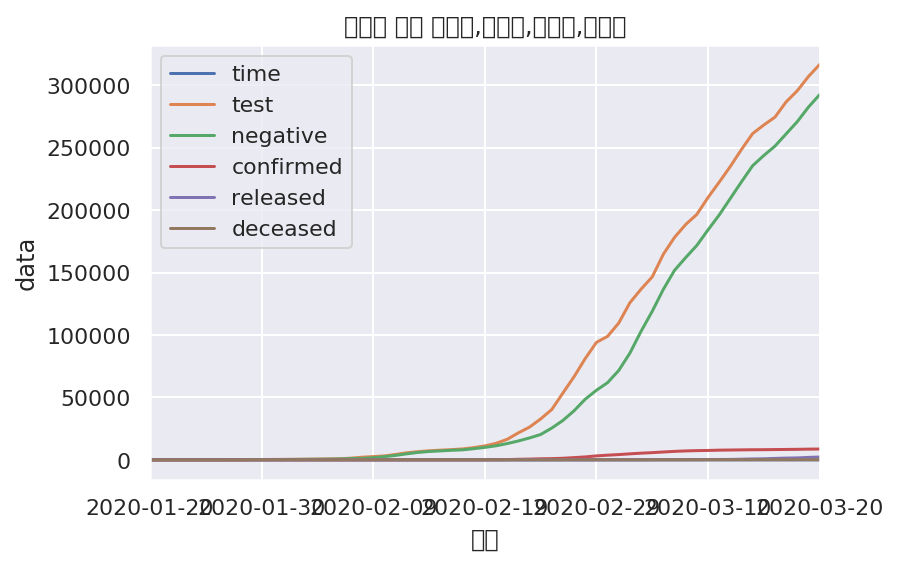

In [74]:
#시간에 따라 시각화
time_01=time.set_index('date')
time_01.plot()
plt.title('시간에 따른 검사자,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

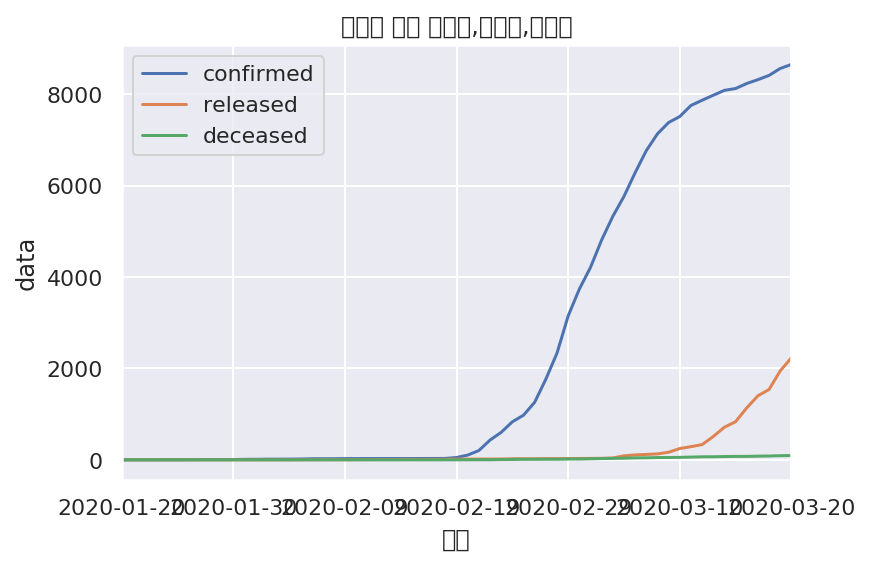

In [75]:
#숫자가 매우큰 test,negative를 제거해줬다.
time_02=time_01.drop(['time','test','negative'],axis=1)
time_02.plot()
plt.title('시간에 따른 확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

In [76]:
def int_month_day(df, col):
    for i in df.index:
        val = df.loc[i, col]
        val = re.sub('[-]', '/', val)# 특수문자 제거 , 정수화
        val = val[-4:]
        df.loc[i, col] = val

In [77]:
int_month_day(time, 'date')

In [78]:
del time['time']

In [79]:
def day_count4(df, col, new_name):
    l = list()
    for i in df.index:
        if i==0:
            l.append(df.loc[i,col])
        else:
            l.append(df.loc[i, col] - df.loc[i-1, col])
    df[new_name] = l

In [80]:
day_count4(time, 'test', 'day_test')
day_count4(time, 'negative', 'day_negative')
day_count4(time, 'confirmed', 'day_confirmed')
day_count4(time, 'released', 'day_released')
day_count4(time, 'deceased', 'day_deceased')

In [81]:
Time = time.loc[:, ['date', 'test','negative','confirmed', 'released', 'deceased']]

In [82]:
display(Time)

date    test  negative  confirmed  released  deceased
0   1/20       1         0          1         0         0
1   1/21       1         0          1         0         0
2   1/22       4         3          1         0         0
3   1/23      22        21          1         0         0
4   1/24      27        25          2         0         0
..   ...     ...       ...        ...       ...       ...
56  3/16  274504    251297       8236      1137        75
57  3/17  286716    261105       8320      1401        81
58  3/18  295647    270888       8413      1540        84
59  3/19  307024    282555       8565      1947        91
60  3/20  316664    292487       8652      2233        94

[61 rows x 6 columns]

#### 이로써 날짜를 간단하게 나타내고,

#### 각 날의 테스트 한 사람수, 음성판정 수, 확진자 수, 퇴원자 수, 사망자 수를 나타내었다.

In [83]:
Time['total'] = Time['negative'] + Time['confirmed'] + Time['released'] + Time['deceased']

# 얼추 보았을 때, 테스트를 한 사람의 수와 나머지들의 합이 논리적으로는 같아야 하지만, 

# 일단 내 생각에는 test하는 사람의 수가 너무 많아지면서 결과 도출을 하는데에 많은 시간이 걸린다는 것을 유추

# 그렇다면, 급증하는 그 시간부터 어떤 불안요소가 존재하지 않을까? 라고 생각

In [84]:
Time['gap'] = Time['test'] - Time['total']

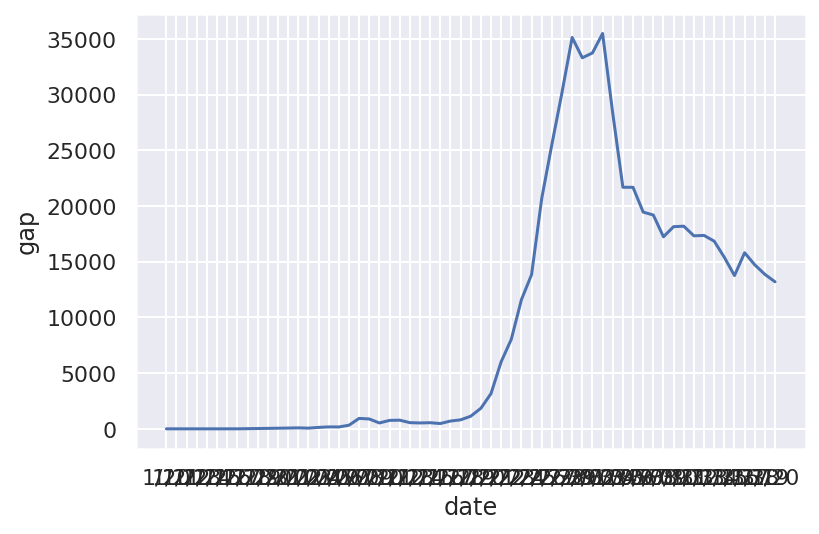

In [85]:
sns.lineplot(x = 'date', y = 'gap', data = Time)

[Text(0.5, 0, 'Total deceased'), Text(0.5, 1.0, 'Total Deceased')]

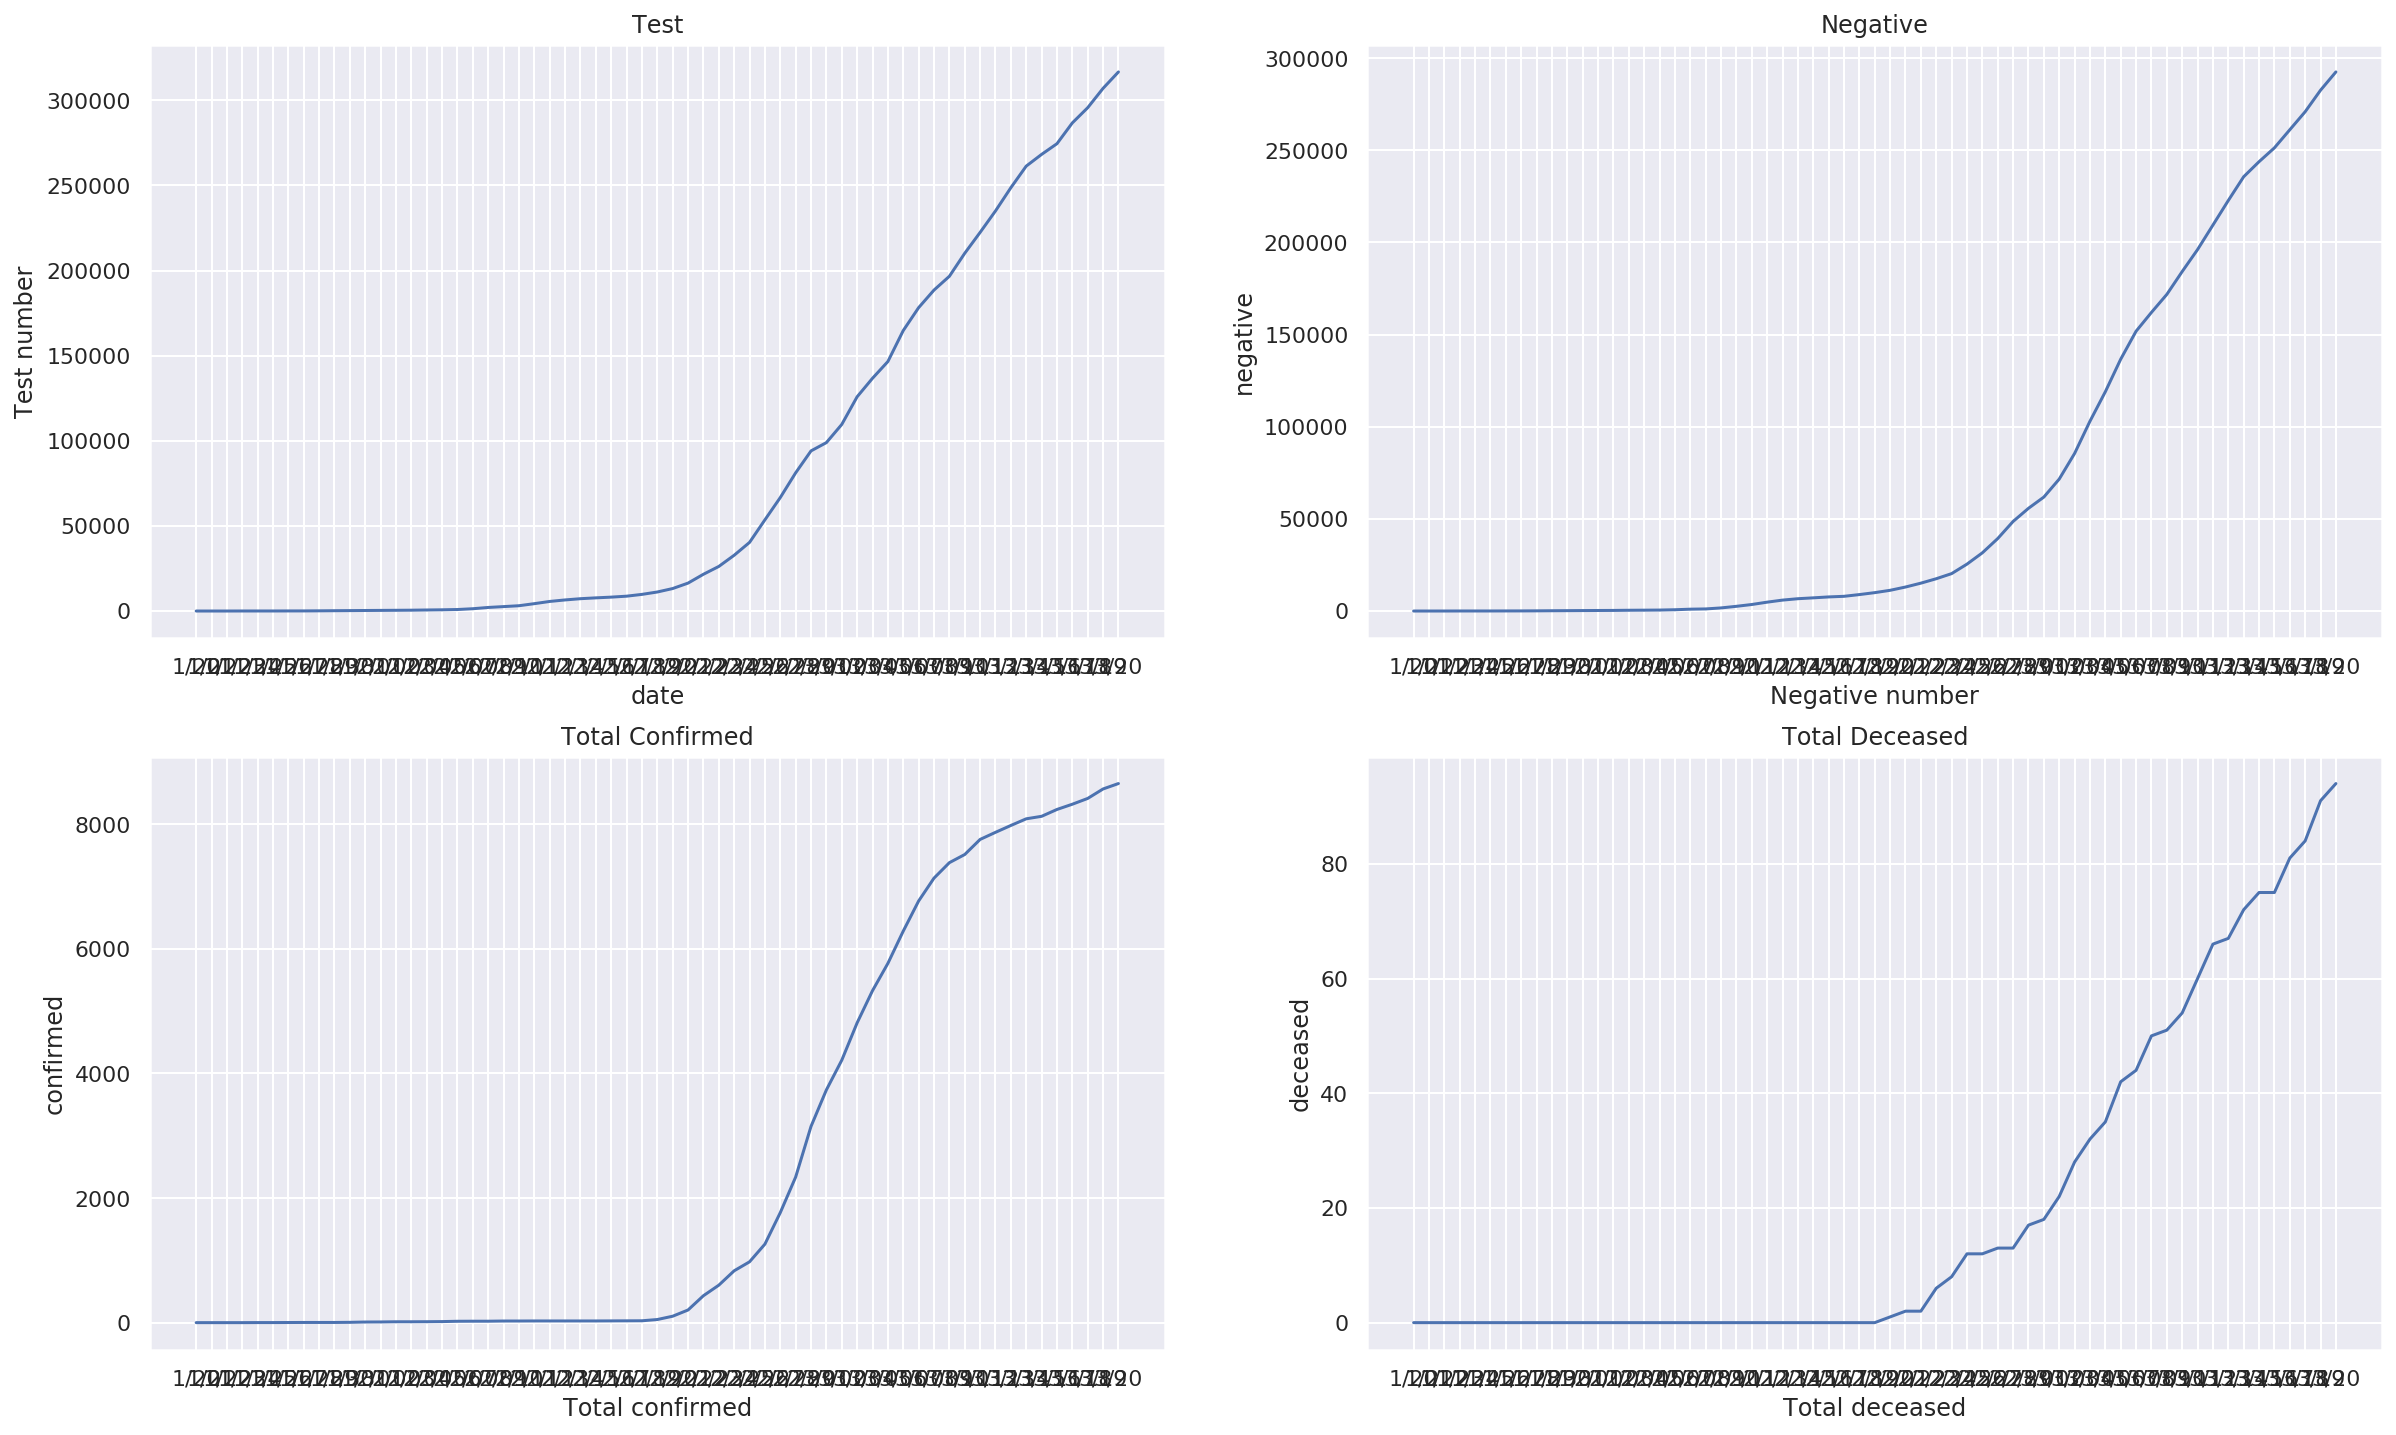

In [86]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,12)

sns.lineplot(data=Time, x="date", y="test", ax=ax1)
sns.lineplot(data=Time, x="date", y="negative", ax=ax2)
sns.lineplot(data=Time, x="date", y="confirmed", ax=ax3)
sns.lineplot(data=Time, x="date", y="deceased", ax=ax4)


ax1.set(ylabel='Test number',title="Test")
ax2.set(xlabel='Negative number',title="Negative")
ax3.set(xlabel='Total confirmed', title="Total Confirmed")
ax4.set(xlabel='Total deceased', title="Total Deceased")

In [87]:
Time_1 = Time[Time['date']>='3/03']

In [88]:
Time_1.reset_index()

index  date    test  negative  confirmed  released  deceased   total  \
0      43  3/03  125851     85484       4812        34        28   90358   
1      44  3/04  136707    102965       5328        41        32  108366   
2      45  3/05  146541    118965       5766        88        35  124854   
3      46  3/06  164740    136624       6284       108        42  143058   
4      47  3/07  178189    151802       6767       118        44  158731   
5      48  3/08  188518    162008       7134       130        50  169322   
6      49  3/09  196618    171778       7382       166        51  179377   
7      50  3/10  210144    184179       7513       247        54  191993   
8      51  3/11  222395    196100       7755       288        60  204203   
9      52  3/12  234998    209402       7869       333        66  217670   
10     53  3/13  248647    222728       7979       510        67  231284   
11     54  3/14  261335    235615       8086       714        72  244487   
12     55  3/15  268212    243778       8126       834        75  252813   
13     56  3/16  274504    251297       8236      1137        75  260745   
14     57  3/17  286716    261105       8320      1401        81  270907   
15     58  3/18  295647    270888       8413      1540        84  280925   
16     59  3/19  307024    282555       8565      1947        91  293158   
17     60  3/20  316664    292487       8652      2233        94  303466   

      gap  
0   35493  
1   28341  
2   21687  
3   21682  
4   19458  
5   19196  
6   17241  
7   18151  
8   18192  
9   17328  
10  17363  
11  16848  
12  15399  
13  13759  
14  15809  
15  14722  
16  13866  
17  13198

#### 일단 3월 3일부터 3월 20일까지의 Time 데이터와 TimeGender 데이터를 합쳤다.

# 3-2. TimeAge

data
- date: 3월 2일부터 데이터가 있다.
- time: Time 0시
- age: 세대별로 나누었다. 0's~80's
- confirmed:누적 확진자 수
- deceased:누적 사망자 수

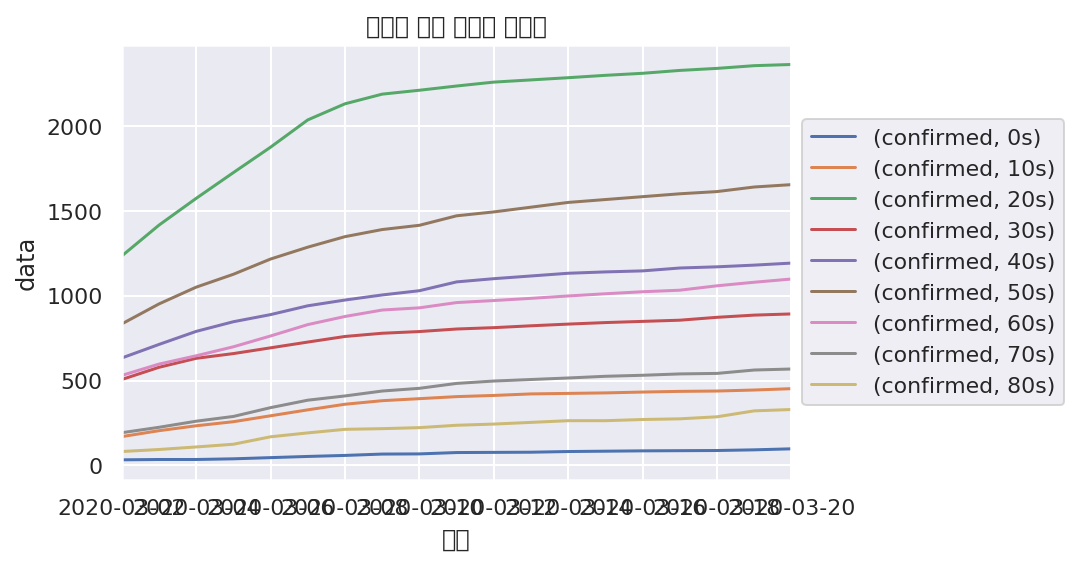

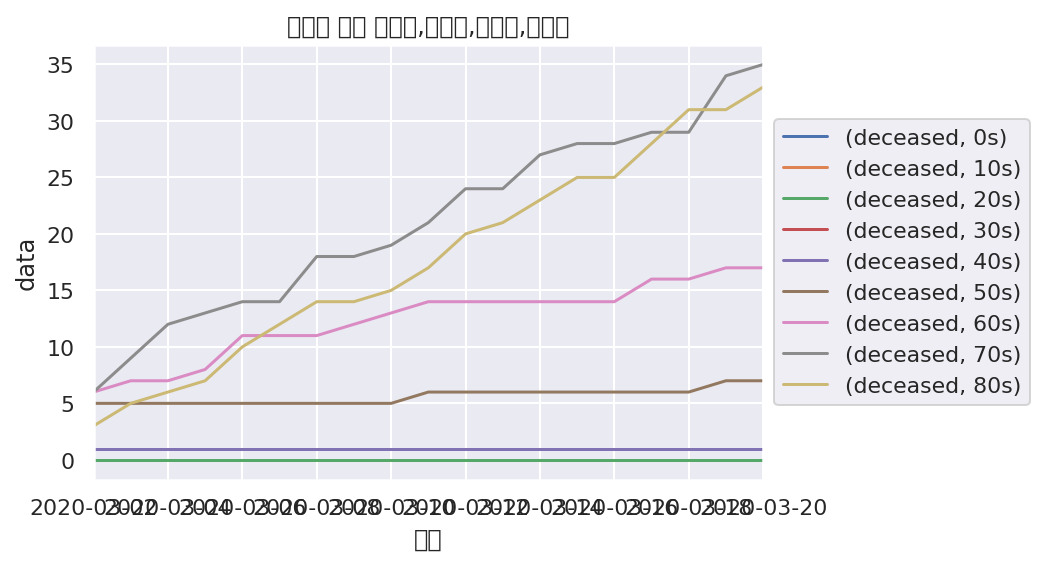

In [92]:
#time_age_01=time_age.set_index(['date','age'])[:9].drop('time',axis=1)
#time_age_02=time_age.set_index(['date','age'])[9:18].drop('time',axis=1)
time_age_confirmed=time_age.drop(['time','deceased'],axis=1).pivot('date','age')

time_age_deceased=time_age.drop(['time','confirmed'],axis=1).pivot('date','age')
# 확진자만 보자
time_age_confirmed.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('시간에 따른 세대별 확진자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

#사망자만 보자
time_age_deceased.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('시간에 따른 세대별,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

- 확진자는 20대가 매우 많다. 20대만 급격하게 감소하는 구간이 있따.궁금한점은 20대와 비슷한 연령대면 10대,30대라 비슷 할줄 알았는데 20대 다음으로 50대,40대,60대 순으로 많아 신기했다.아마 20대의 부모세대가 50대,60대라 그런건지 50대가 가장 활발한 사회활동을 하지만 면역력이 약한건지 이런 저런 생각을 해봐야겠다.

- 사망자는 70대,80대가 확진자도 별로 없는데 압도적인 모습 사망자는 나이순이다. 나이가 많으면 면역력이 약하고 지병이 있을 확률이 높아 그런듯 하다.

# 3-3. TimeGender


data

- date: 3월 2일부터 데이터가 있다.
- time: Time 0시
- gender: 성별로 나누었다. male,female
- confirmed:누적 확진자 수
- deceased:누적 사망자 수

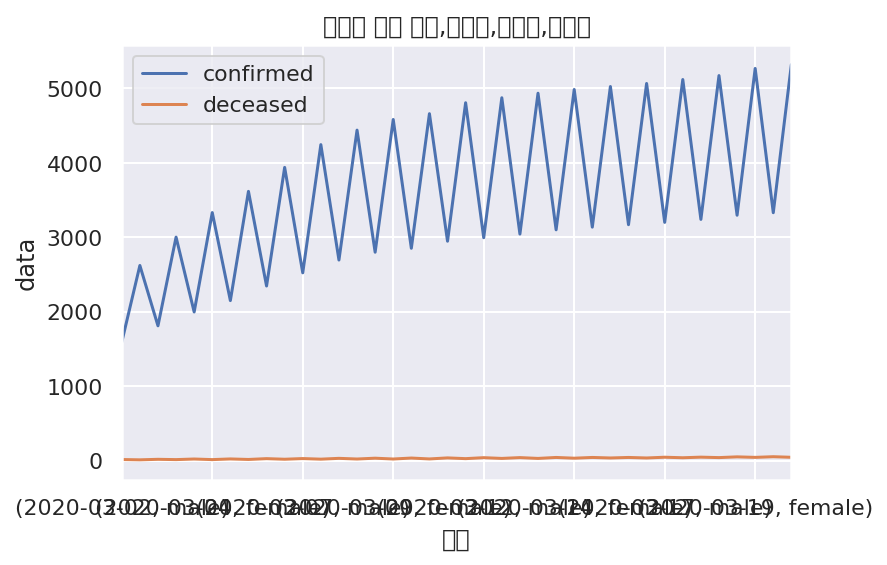

In [93]:
time_gender_01=time_gender.set_index(['date','sex']).drop('time',axis=1)
time_gender_01
time_gender_01.plot()
plt.title('시간에 따른 성별,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

In [94]:
# 남자만
def drop_female(sex):
    if sex=='female':
        return None
    else:
        return sex
time_gender_male=time_gender[:]
time_gender_male['sex']=time_gender_male['sex'].apply(drop_female)
time_gender_male.dropna(axis=0,inplace=True)
time_gender_male.drop(['time','sex'],axis=1,inplace=True)

In [95]:
time_gender

date  time   sex  confirmed  deceased
0   2020-03-02     0  male       1591        13
1   2020-03-02     0  None       2621         9
2   2020-03-03     0  male       1810        16
3   2020-03-03     0  None       3002        12
4   2020-03-04     0  male       1996        20
5   2020-03-04     0  None       3332        12
6   2020-03-05     0  male       2149        21
7   2020-03-05     0  None       3617        14
8   2020-03-06     0  male       2345        25
9   2020-03-06     0  None       3939        17
10  2020-03-07     0  male       2522        26
11  2020-03-07     0  None       4245        18
12  2020-03-08     0  male       2694        29
13  2020-03-08     0  None       4440        20
14  2020-03-09     0  male       2799        31
15  2020-03-09     0  None       4583        20
16  2020-03-10     0  male       2852        33
17  2020-03-10     0  None       4661        21
18  2020-03-11     0  male       2947        35
19  2020-03-11     0  None       4808        25
20  2020-03-12     0  male       2994        38
21  2020-03-12     0  None       4875        28
22  2020-03-13     0  male       3043        39
23  2020-03-13     0  None       4936        28
24  2020-03-14     0  male       3100        41
25  2020-03-14     0  None       4986        31
26  2020-03-15     0  male       3136        41
27  2020-03-15     0  None       5026        34
28  2020-03-16     0  male       3169        41
29  2020-03-16     0  None       5067        34
30  2020-03-17     0  male       3200        44
31  2020-03-17     0  None       5120        37
32  2020-03-18     0  male       3240        45
33  2020-03-18     0  None       5173        39
34  2020-03-19     0  male       3296        49
35  2020-03-19     0  None       5269        42
36  2020-03-20     0  male       3330        51
37  2020-03-20     0  None       5322        43

In [96]:
#여자만
time_gender = pd.read_csv(path+'TimeGender.csv')
def drop_male(sex):
    if sex=='male':
        return None
    else:
        return sex
time_gender_female=time_gender[:]
time_gender_female['sex']=time_gender['sex'].apply(drop_male)
time_gender_female.dropna(axis=0,inplace=True)
time_gender_female.drop(['time','sex'],axis=1,inplace=True)

Text(0, 0.5, 'data')

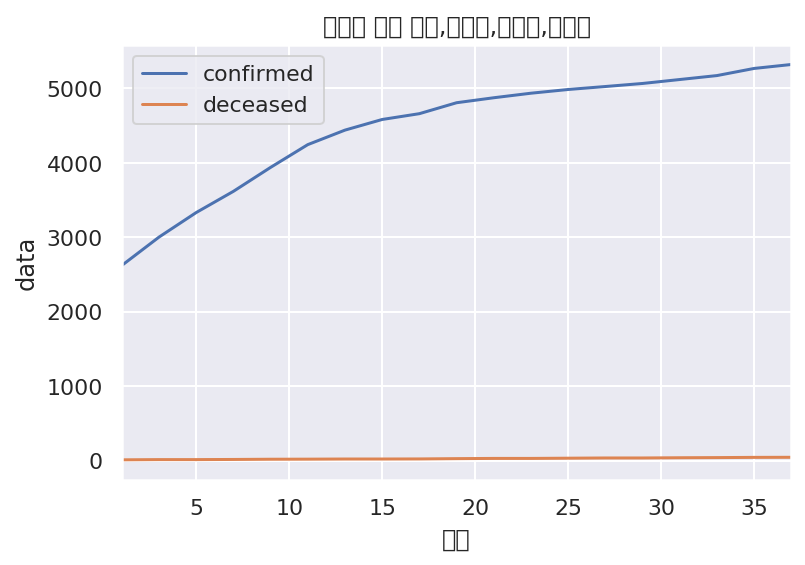

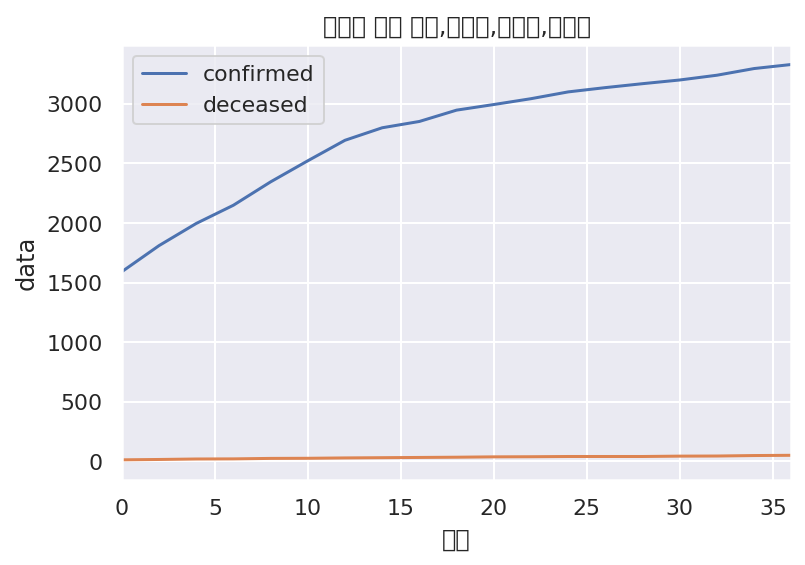

In [97]:
time_gender_female.plot()
plt.title('시간에 따른 여자,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
time_gender_male.plot()
plt.title('시간에 따른 남자,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')

#### 남자와 여자의 증가 추세는 비슷한 그래프 모양이다. 확진자에 비해 사망자에 현저히 적어 사망자수가 잘 보이지않는다.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


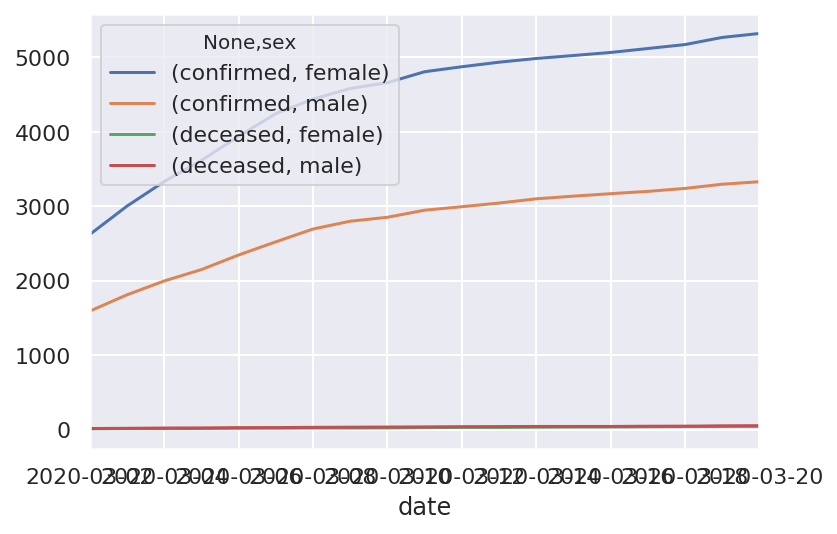

In [98]:
#남자 여자 둘다
time_gender = pd.read_csv(path+'TimeGender.csv')
a=time_gender.drop('time',axis=1).pivot('date','sex')
a.plot()

#### 데이터를 보면 여자가 확진자 수가 1~2천명 가량 많지만 사망자 수는 남자가 더 많다. 코로나 바이러스가 남자에게 더 치명적인건지, 남자 확진자가 노인이 더 많아서 그런건지 아니면 다른 이유가 있는지 알아봐야겠다.

In [194]:
TimeMale = time_gender[time_gender['sex']=='male']
TimeFemale = time_gender[time_gender['sex']=='female']

- TimeMale => TimeGender에서 남자의 자료

- TimeFemale => TimeGender에서 여자의 자료

- 일단 TimeGender.csv 만 보았을때에는 모든 데이터들의 날짜가 2020-03 안에 포함이 되어 있으므로,

- 내가 이것을 알고만 있다면 굳이 여러군데에 쓸 필요가 없다.

## 따라서 loc을 이용하여 날짜만 나타내어 주는 int_day라는 함수를 작성하였다.

In [100]:
def int_day(df, col):
    for i in df.index:
        val = df.loc[i, col]
        val = int(re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', val))# 특수문자 제거 , 정수화
        val = val%100
        df.loc[i, col] = val

In [101]:
int_day(TimeMale, 'date')
int_day(TimeFemale, 'date')
int_day(time_gender, 'date')

[Text(0.5, 0, 'Deceased'), Text(0.5, 1.0, 'Female Deceased')]

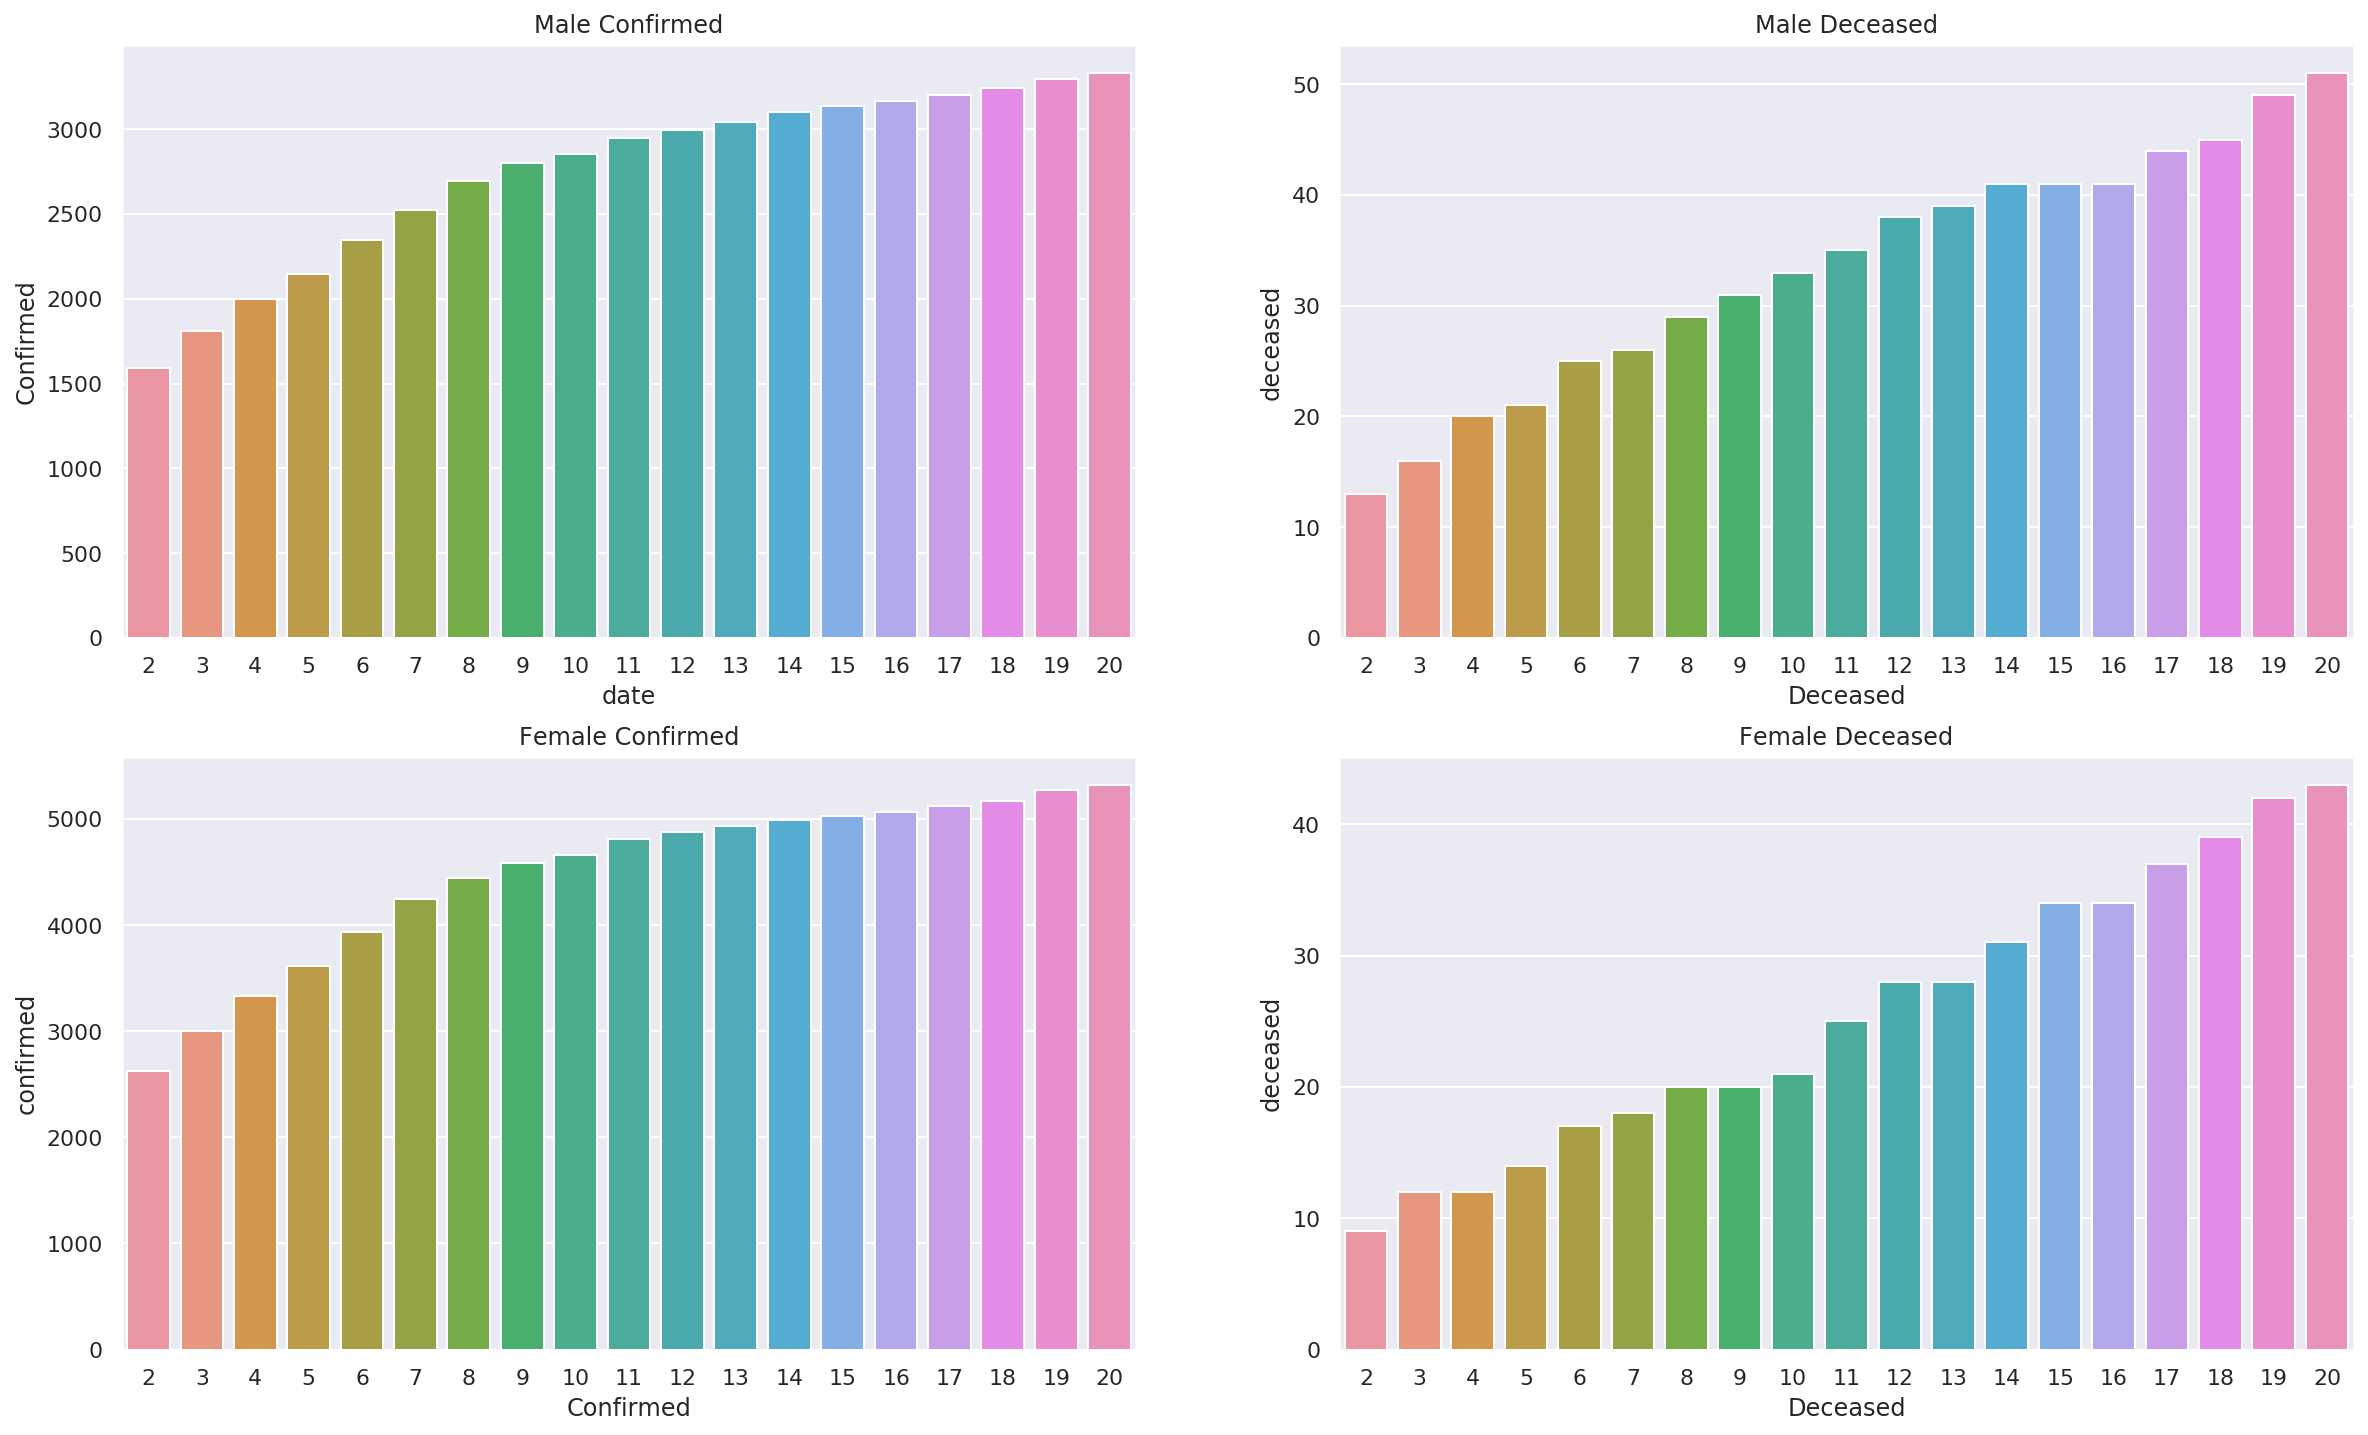

In [102]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,12)

sns.barplot(data=TimeMale, x="date", y="confirmed", ax=ax1)
sns.barplot(data=TimeMale, x="date", y="deceased", ax=ax2)
sns.barplot(data=TimeFemale, x="date", y="confirmed", ax=ax3)
sns.barplot(data=TimeFemale, x="date", y="deceased", ax=ax4)


ax1.set(ylabel='Confirmed',title="Male Confirmed")
ax2.set(xlabel='Deceased',title="Male Deceased")
ax3.set(xlabel='Confirmed', title="Female Confirmed")
ax4.set(xlabel='Deceased', title="Female Deceased")

- 남자의 확진자, 사망자수

- 여자의 확진자, 사망자수

- 누적값의 그래프

In [103]:
import pandas as pd
time_gender = pd.read_csv(path+'TimeGender.csv')
male = time_gender[time_gender['sex'] =='male']
x_val = male['date']
y_val = male['confirmed']
z_val = male['deceased']
import plotly.offline as pyo
import plotly.graph_objs as go
trace1 = go.Bar(x = x_val, y = y_val, name = 'confirmed')
trace2 = go.Scatter(x = x_val, y = z_val, mode = 'lines',name = 'deceased' )
data = [trace1, trace2]
pyo.iplot(data)


#### 일단 남자의 확진자수는 막대그래프로 나타내었고, 남자의 사망자수를 선그래프로 나타내었다.

#### 하지만, 워낙 둘의 수치적인 차이가 많이 나서 별다른 의미를 아직 알 수 없었다.

#### 그래서 female은 하지 않았다. 만약 하고 싶다면, 바로 위의 코드에서 male대신 female로 바꾸면 된다.

In [104]:

def day_count_gender(df, col, new_name):
    l = list()
    for i in df.index:
        if (i==0) or (i==1):
            l.append(df.loc[i,col])
        else:
            l.append(df.loc[i, col] - df.loc[i-2, col])
    df[new_name] = l


#### 이 day_count_gender라는 함수는 위의 자료들이 거의 대부분 누적값의 그래프를 갖고 있기 때문에

#### 당일의 확진자수, 사망자수 등의 당일 수치를 찾아내기 위한 함수를 만들었다.

In [105]:
day_count_gender(TimeMale, 'confirmed', 'day_confirmed')
day_count_gender(TimeFemale, 'confirmed', 'day_confirmed')
day_count_gender(TimeMale, 'deceased', 'day_deceased')
day_count_gender(TimeFemale, 'deceased', 'day_deceased')


In [106]:
TimeMale = TimeMale.drop([0])
TimeFemale = TimeFemale.drop([1])

In [107]:
TimeMale.reset_index()
TimeFemale.reset_index()

index  date  time     sex  confirmed  deceased  day_confirmed  \
0       3     3     0  female       3002        12            381   
1       5     4     0  female       3332        12            330   
2       7     5     0  female       3617        14            285   
3       9     6     0  female       3939        17            322   
4      11     7     0  female       4245        18            306   
5      13     8     0  female       4440        20            195   
6      15     9     0  female       4583        20            143   
7      17    10     0  female       4661        21             78   
8      19    11     0  female       4808        25            147   
9      21    12     0  female       4875        28             67   
10     23    13     0  female       4936        28             61   
11     25    14     0  female       4986        31             50   
12     27    15     0  female       5026        34             40   
13     29    16     0  female       5067        34             41   
14     31    17     0  female       5120        37             53   
15     33    18     0  female       5173        39             53   
16     35    19     0  female       5269        42             96   
17     37    20     0  female       5322        43             53   

    day_deceased  
0              3  
1              0  
2              2  
3              3  
4              1  
5              2  
6              0  
7              1  
8              4  
9              3  
10             0  
11             3  
12             3  
13             0  
14             3  
15             2  
16             3  
17             1


#### 데이터 프레임에서 데이터들을 뽑아 이전에는 인덱스가 홀수, 짝수로 나뉘어 있었으나,

#### reset_index()함수를 통해서 다시 인덱스를 정리해주었다.

In [108]:

x_val = TimeMale['date']
y_val = TimeMale['confirmed']
z_val = TimeMale['deceased']


trace1 = go.Bar(x = x_val, y = y_val, name = 'confirmed')
trace2 = go.Scatter(x = x_val, y = z_val, mode = 'lines',name = 'deceased' )
data = [trace1, trace2]
pyo.iplot(data)

In [109]:
x_val = TimeFemale['date']
y_val = TimeFemale['confirmed']
z_val = TimeFemale['deceased']


trace1 = go.Bar(x = x_val, y = y_val, name = 'confirmed')
trace2 = go.Scatter(x = x_val, y = z_val, mode = 'lines',name = 'deceased' )
data = [trace1, trace2]
pyo.iplot(data)

In [189]:
def March(df, col):
    for i in df.index:
        val = df.loc[i, col]
        val = re.sub('[-]', '', val)# 특수문자 제거 , 정수화
        val = int(val[-2:])
        df.loc[i, col] = val


In [190]:
March(Time_1, 'date')

TypeError: cannot use a string pattern on a bytes-like object

In [191]:
Time_2 = pd.merge(Time_1, TimeMale, how='outer', on='date')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [192]:
Time_2.rename(columns={'date': 'March'},inplace=True)
Time_2.rename(columns={'confirmed_x': 'total_confirmed'},inplace=True)
Time_2.rename(columns={'deceased_x': 'total_deceased'},inplace=True)
Time_2.rename(columns={'confirmed_y': 'male_confirmed'},inplace=True)
Time_2.rename(columns={'deceased_y': 'male_deceased'},inplace=True)
Time_2.rename(columns={'day_confirmed': 'male_day_confirmed'},inplace=True)
Time_2.rename(columns={'day_deceased': 'male_day_deceased'},inplace=True)
Time_2.rename(columns={'ratio': 'male_ratio'},inplace=True)
Time_2.rename(columns={'day_ratio': 'male_day_ratio'},inplace=True)

NameError: name 'Time_2' is not defined

In [ ]:
Time_2.rename(columns={'released': 'total_released'},inplace=True)

In [ ]:
display(Time_2)

In [ ]:
TimeFemale.rename(columns={'date': 'March'},inplace=True)

In [ ]:
Time_3 = pd.merge(Time_2, TimeFemale, how='outer', on='March')

In [ ]:
Time_3.columns.tolist()

In [ ]:
Time_3.rename(columns={'confirmed': 'female_confirmed'},inplace=True)
Time_3.rename(columns={'deceased': 'female_deceased'},inplace=True)
Time_3.rename(columns={'day_confirmed': 'female_day_confirmed'},inplace=True)
Time_3.rename(columns={'day_deceased': 'female_day_deceased'},inplace=True)
Time_3.rename(columns={'ratio': 'female_ratio'},inplace=True)
Time_3.rename(columns={'day_ratio': 'female_day_ratio'},inplace=True)

In [ ]:
time = Time_3.loc[:, ['March', 'test','negative','total_confirmed', 'male_confirmed', 'female_confirmed', 'total_deceased', 'male_deceased', 'female_deceased']]

In [ ]:
Time_3.rename(columns={'released': 'total_released'},inplace=True)

In [ ]:
display(Time_3)

#### 당일 확진자와 사망자로 했으나, 마찬가지였다.,

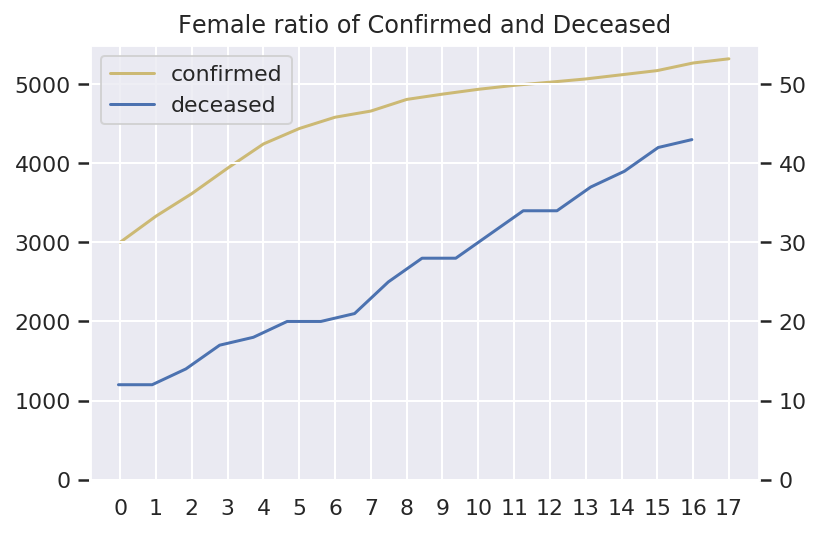

In [110]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeFemale['date']))

line1 = ax1.plot(x, TimeFemale['confirmed'], color = 'y', label = 'confirmed')
line2 = ax2.plot(x,  TimeFemale['deceased'], color = 'b', label = 'deceased')


plt.xticks(np.arange(0, 20))

ax1.set_ylim(0, 5500)
ax2.set_ylim(0, 55)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('Female ratio of Confirmed and Deceased')


plt.show()

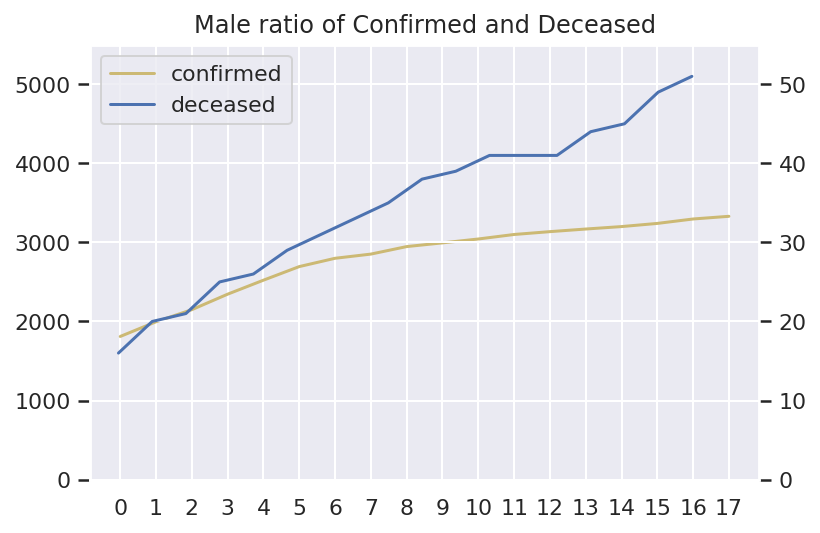

In [111]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeMale['date']))

line1 = ax1.plot(x, TimeMale['confirmed'], color = 'y', label = 'confirmed')
line2 = ax2.plot(x,  TimeMale['deceased'], color = 'b', label = 'deceased')


plt.xticks(np.arange(0, 20))

ax1.set_ylim(0, 5500)
ax2.set_ylim(0, 55)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('Male ratio of Confirmed and Deceased')

plt.show()

#### 노란선은 왼쪽 축을 기준으로 수치를 나타낸 것이고,

#### 파란 선은 오른쪽 축을 기준으로 수치를 나타낸 것이다.

#### 수치는 다르지만, 일정한 비율로 만들어 비율을 확인하는데 사용했다.m

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


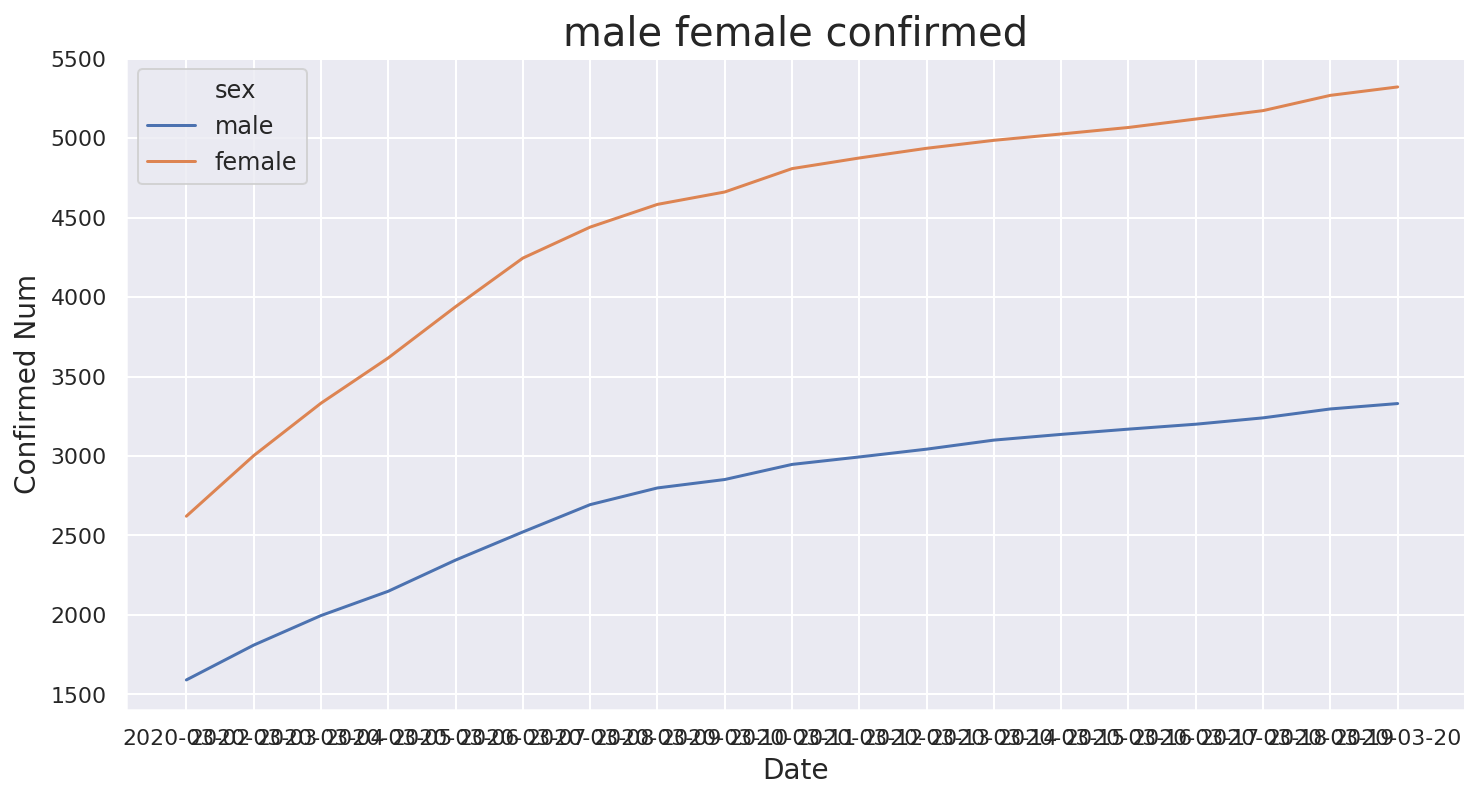

In [112]:
plt.figure(figsize = (12, 6))

ax = sns.lineplot(x='date', 

                  y='confirmed', 

                  hue='sex',

                  data=time_gender)
plt.xticks(np.arange(0,20))

plt.title('male female confirmed', fontsize=20)

plt.ylabel('Confirmed Num', fontsize=14)

plt.xlabel('Date', fontsize=14)

plt.legend(fontsize=12, loc='best')



plt.show()

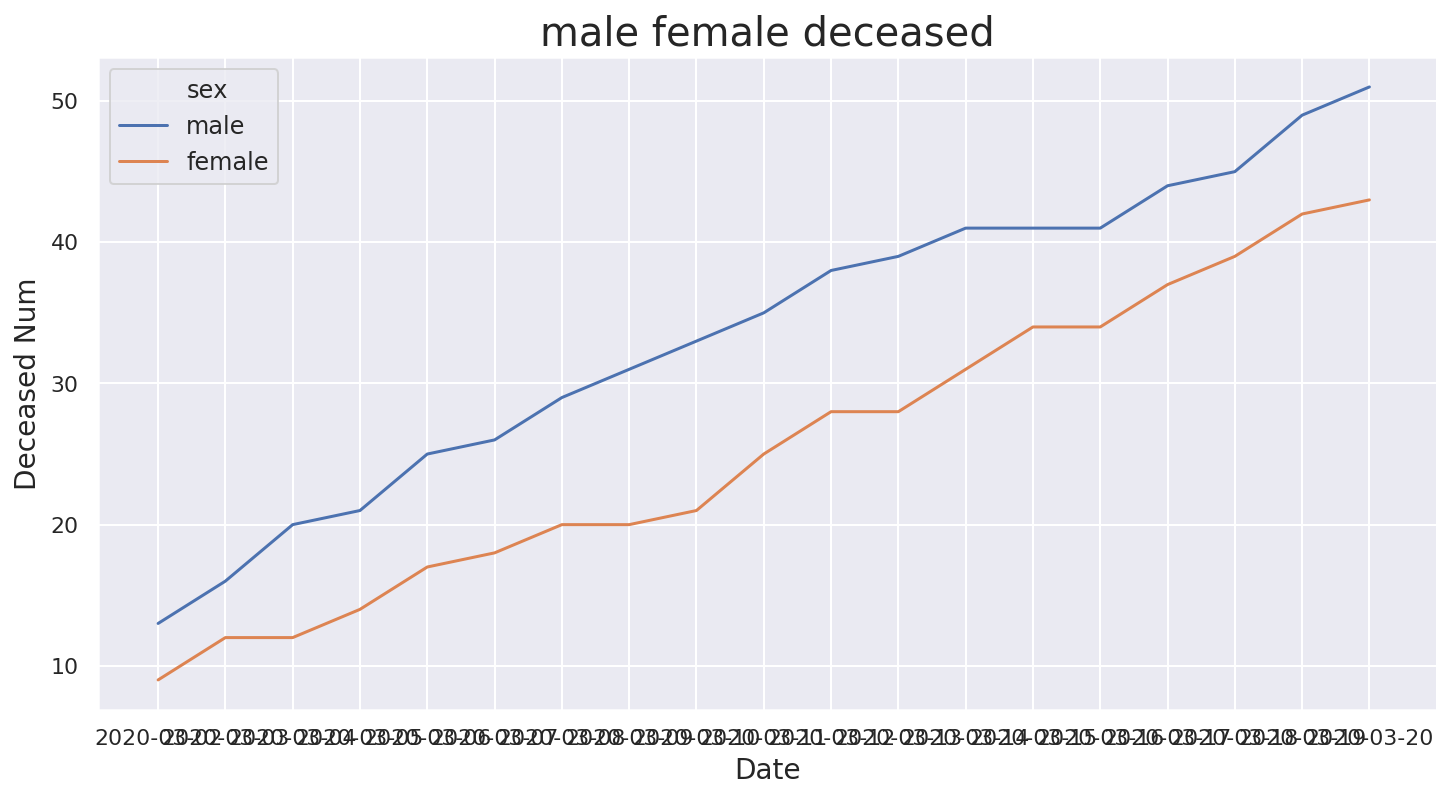

In [113]:
plt.figure(figsize = (12, 6))

ax = sns.lineplot(x='date', 

                  y='deceased', 

                  hue='sex',

                  data=time_gender)


plt.xticks(np.arange(0,20))

plt.title('male female deceased', fontsize=20)

plt.ylabel('Deceased Num', fontsize=14)

plt.xlabel('Date', fontsize=14)

plt.legend(fontsize=12, loc='best')



plt.show()

#### 남녀의 확진자수와 남녀의 사망자수를 비교하였다.

#### 확진자 수는 여성이 더 많이 나타나고 있지만, 사망자 수는 오히려 남성이 더 많이 나타내는 경향을 보였다.

In [114]:
TimeMale['ratio'] = (TimeMale['deceased'] / TimeMale['confirmed']) * 10000
TimeFemale['ratio'] = TimeFemale['deceased'] / TimeFemale['confirmed'] * 10000
TimeMale['day_ratio'] = TimeMale['day_deceased'] / TimeMale['day_confirmed'] * 10000
TimeFemale['day_ratio'] = TimeFemale['day_deceased'] / TimeFemale['day_confirmed'] * 10000

#### 앞의 그래프를 보고, 남녀별 사망자수/확진자수를 나타내었다.

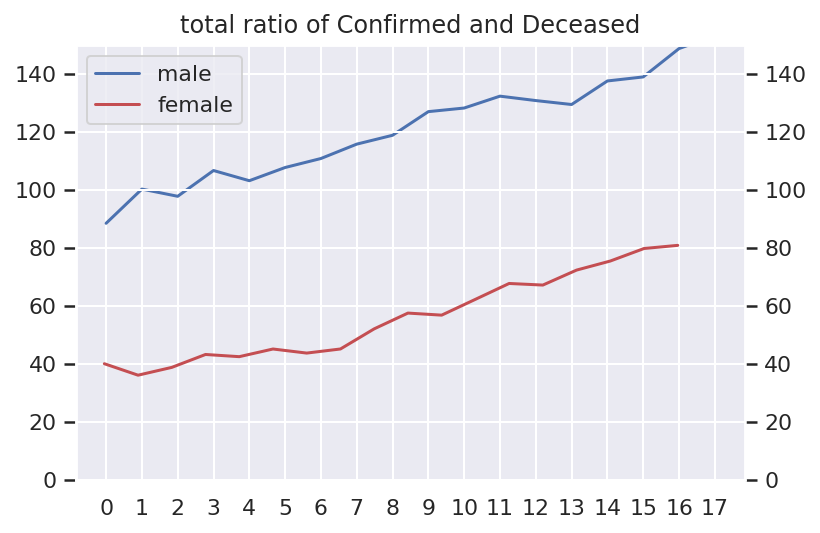

In [115]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeFemale['date']))

line1 = ax1.plot(x, TimeMale['ratio'], color = 'b', label = 'male')
line2 = ax2.plot(x,  TimeFemale['ratio'], color = 'r', label = 'female')

ax1.set_ylim(0, 150)
ax2.set_ylim(0,150)
plt.xticks(np.arange(0, 20))


lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('total ratio of Confirmed and Deceased')


plt.show()

#### 좌우 축의 범위는 같은 것이니 따로 신경 쓸 필요 없다.

#### 일단 확실히 남자의 치사율(사망자수 / 확진자 수)이 높은 것을 알 수 있다.

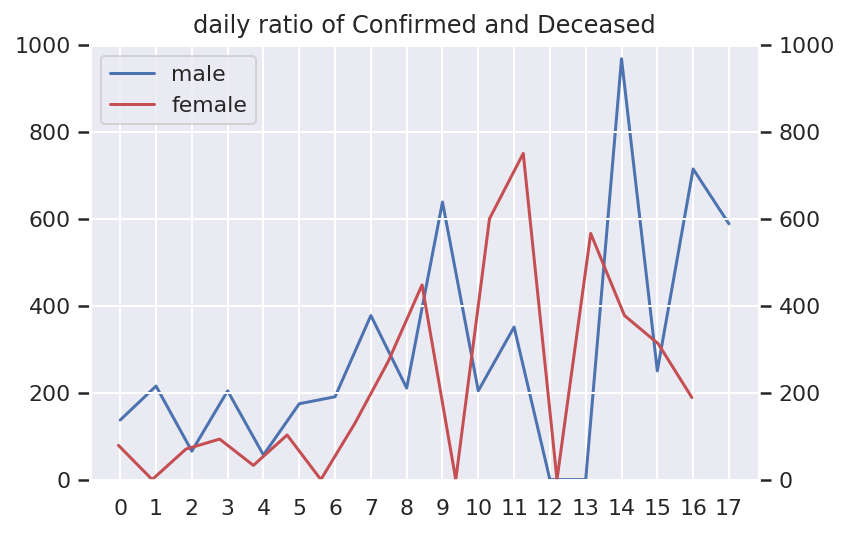

In [116]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeFemale['date']))

line1 = ax1.plot(x, TimeMale['day_ratio'], color = 'b', label = 'male')
line2 = ax2.plot(x,  TimeFemale['day_ratio'], color = 'r', label = 'female')


ax1.set_ylim(0,1000)
ax2.set_ylim(0, 1000)

plt.xticks(np.arange(0, 20))


lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('daily ratio of Confirmed and Deceased')


plt.show()

#### 당일에 나온 값은 사망자 수가 수치가 너무 낮아 조금씩 변화가 있더라도 그래프가 너무 많이 요동치는 모습을 보였다.

# 3-4. TimeProvince

data

- date: 3월 2일부터 데이터가 있다.
- time: Time 0시
- province: 지역별로 나누었다. 특별시,광역시,도 기준
- confirmed:누적 확진자 수
- released:누적 완치자
- deceased:누적 사망자 수

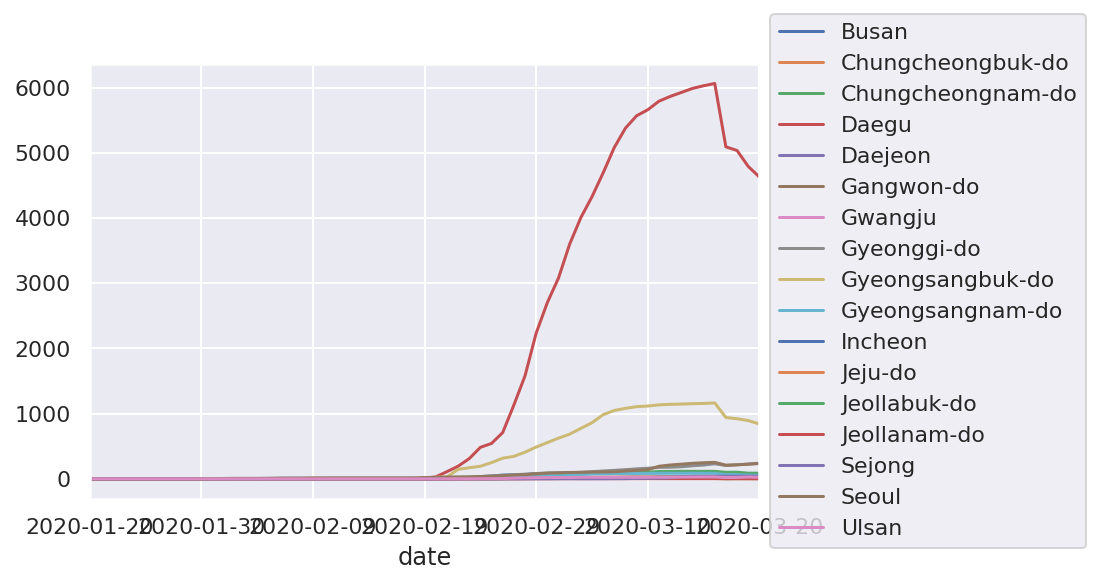

In [117]:
a=time_province.drop('time',axis=1).pivot('date','province')['confirmed']
a.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 대구가 매우 압도적, 그다음이 경상북도가 많은데 나머지느 잘보이지도 않고 알아보기도 힘들기도 해 일단은 확진자 수가 많은 서울,대구를 제외한 나머지 광역시들은 인접한 도에 합쳤다.

In [118]:
time_province = pd.read_csv(path+'TimeProvince.csv')
def convert_province(province):
    if province =='Busan' or province=='Ulsan':
        return 'Gyeongsangnam-do'
    elif province=='Daejeon' or province =='Sejong':
        return 'Chungcheongnam-do'
    elif province=='Incheon':
        return 'Gyeonggi-do'
    elif province=='Gwangju':
        return 'Jeollanam-do'
    else:
        return province
time_province['province']=time_province['province'].apply(convert_province)
time_province.drop('time',axis=1,inplace=True)
time_province

date          province  confirmed  released  deceased
0     2020-01-20             Seoul          0         0         0
1     2020-01-20  Gyeongsangnam-do          0         0         0
2     2020-01-20             Daegu          0         0         0
3     2020-01-20       Gyeonggi-do          1         0         0
4     2020-01-20      Jeollanam-do          0         0         0
...          ...               ...        ...       ...       ...
1032  2020-03-20      Jeollabuk-do          3         7         0
1033  2020-03-20      Jeollanam-do          2         3         0
1034  2020-03-20  Gyeongsangbuk-do        841       340        22
1035  2020-03-20  Gyeongsangnam-do         54        33         0
1036  2020-03-20           Jeju-do          2         2         0

[1037 rows x 5 columns]

In [119]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)

confirmed                                                 \
province   Chungcheongbuk-do Chungcheongnam-do Daegu Gangwon-do Gyeonggi-do   
date                                                                          
2020-01-20                 0                 0     0          0           1   
2020-01-21                 0                 0     0          0           1   
2020-01-22                 0                 0     0          0           1   
2020-01-23                 0                 0     0          0           1   
2020-01-24                 0                 0     0          0           2   
...                      ...               ...   ...        ...         ...   
2020-03-16                31               177  6066         29         261   
2020-03-17                26               158  5094         20         230   
2020-03-18                27               161  5038         21         242   
2020-03-19                28               146  4794         20         254   
2020-03-20                27               145  4631         19         269   

                                                                   \
province   Gyeongsangbuk-do Gyeongsangnam-do Jeju-do Jeollabuk-do   
date                                                                
2020-01-20                0                0       0            0   
2020-01-21                0                0       0            0   
2020-01-22                0                0       0            0   
2020-01-23                0                0       0            0   
2020-01-24                0                0       0            0   
...                     ...              ...     ...          ...   
2020-03-16             1164              220       4            7   
2020-03-17              941              136       2            3   
2020-03-18              922              132       2            4   
2020-03-19              894              132       2            5   
2020-03-20              841              126       2            3   

                         ...          released                               \
province   Jeollanam-do  ... Chungcheongnam-do Daegu Gangwon-do Gyeonggi-do   
date                     ...                                                  
2020-01-20            0  ...                 0     0          0           0   
2020-01-21            0  ...                 0     0          0           0   
2020-01-22            0  ...                 0     0          0           0   
2020-01-23            0  ...                 0     0          0           0   
2020-01-24            0  ...                 0     0          0           0   
...                 ...  ...               ...   ...        ...         ...   
2020-03-16           20  ...                16   734          7          52   
2020-03-17           12  ...                19   947          8          60   
2020-03-18           14  ...                20  1048          8          64   
2020-03-19           12  ...                35  1382          9          70   
2020-03-20           10  ...                37  1577         10          73   

                                                                   \
province   Gyeongsangbuk-do Gyeongsangnam-do Jeju-do Jeollabuk-do   
date                                                                
2020-01-20                0                0       0            0   
2020-01-21                0                0       0            0   
2020-01-22                0                0       0            0   
2020-01-23                0                0       0            0   
2020-01-24                0                0       0            0   
...                     ...              ...     ...          ...   
2020-03-16              178               80       2            4   
2020-03-17              209               84       2            4   
2020-03-18              235               90       2            5   
2020-03-19

#### 만든 데이터로 다시 시각화

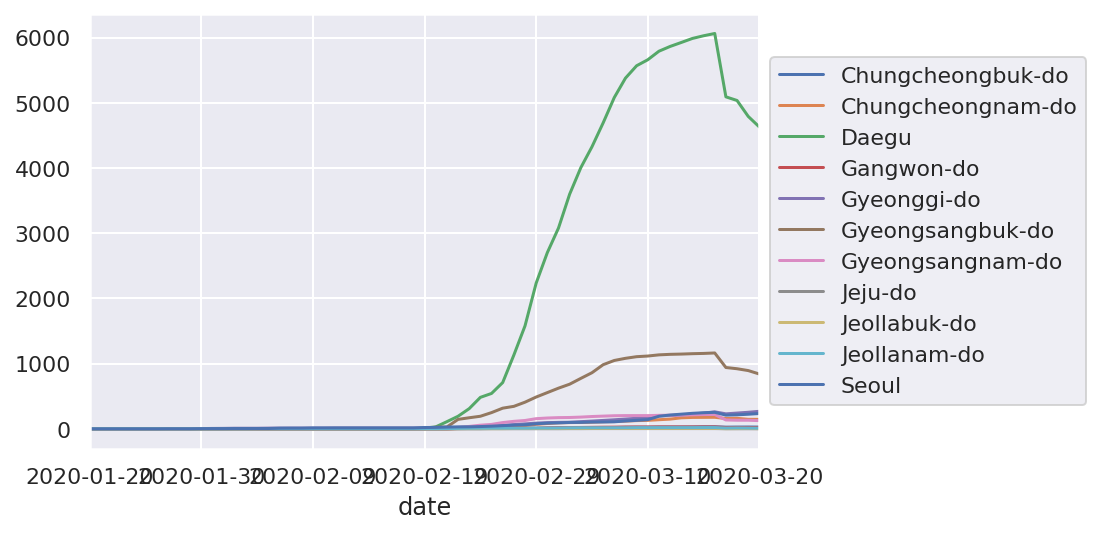

In [120]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['confirmed'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 합쳐도 대구가 매우 압도적이라 대구를 제외 해보았다.

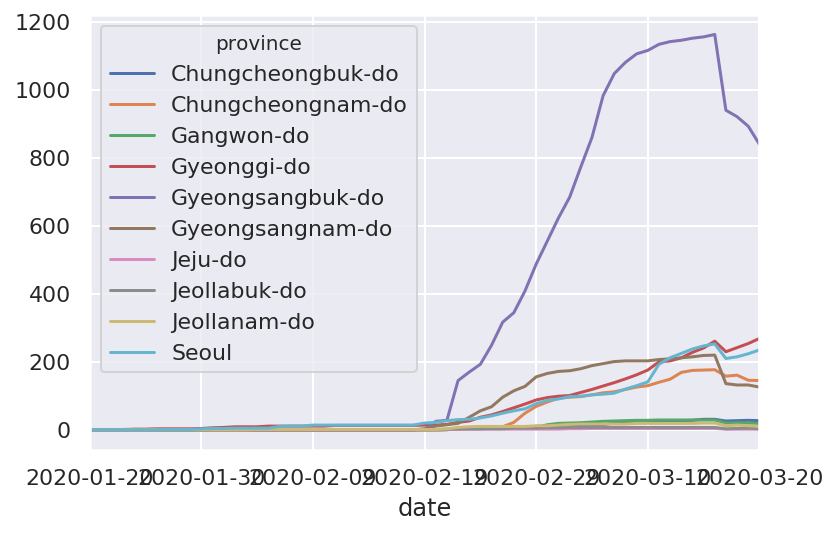

In [121]:
#대구 제외
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['confirmed'].drop('Daegu',axis=1).plot()

#### 대구를 제외하면 경상북도가 압도적 신기한점은 대구와 그래프 모양이 거의 일치 한다는 점이다. 아마 바로 옆이라 영향이 있을거라 생각이 들었다.
- 이제 아래 쪽 데이터를 보기위해 경상북도도 제외했다.

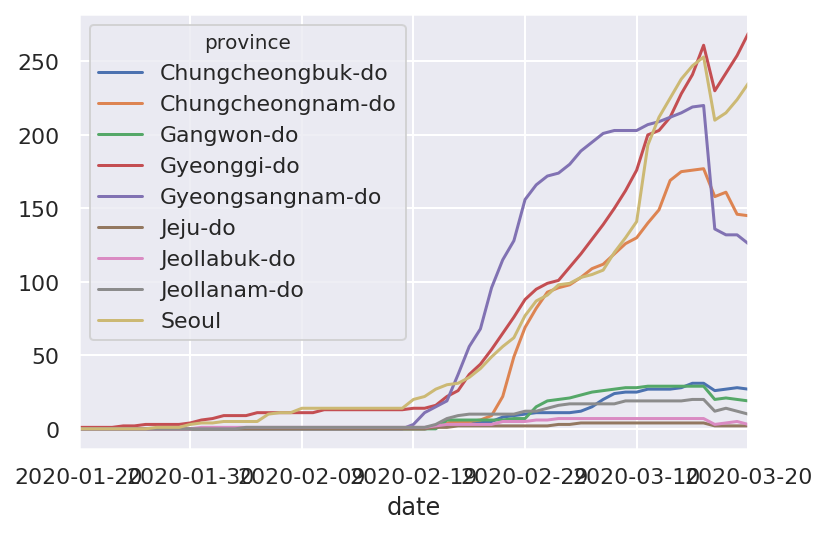

In [122]:
#대구 경상북도 제외
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['confirmed'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()

#### 경기도의 증가추세가 대구와 경상북도의 확진자 수가 급증한 2월12일의 2일쯤 후부터 급증하기 시작했다. 경상남도의 그래프 모양은 경상북도,대구와 비슷한모습 경기도는 서울과 비슷한모습 강원도 전라남도 충청북도 전라북도 제주도 비슷한모습 충청남도는 경남과 경기도를 섞은듯한 느낌이다.

- 다음은 사망자를 보았다.

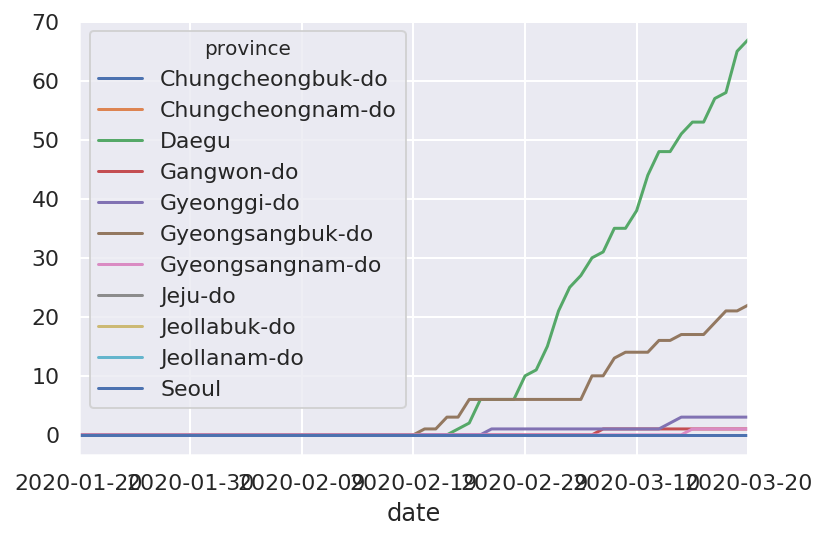

In [123]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['deceased'].plot()

#### 역시나 확진자가 많은 대구와 경상북도가 압도적인 모습
- 아까와 같이 대구와 경북을 없애주자

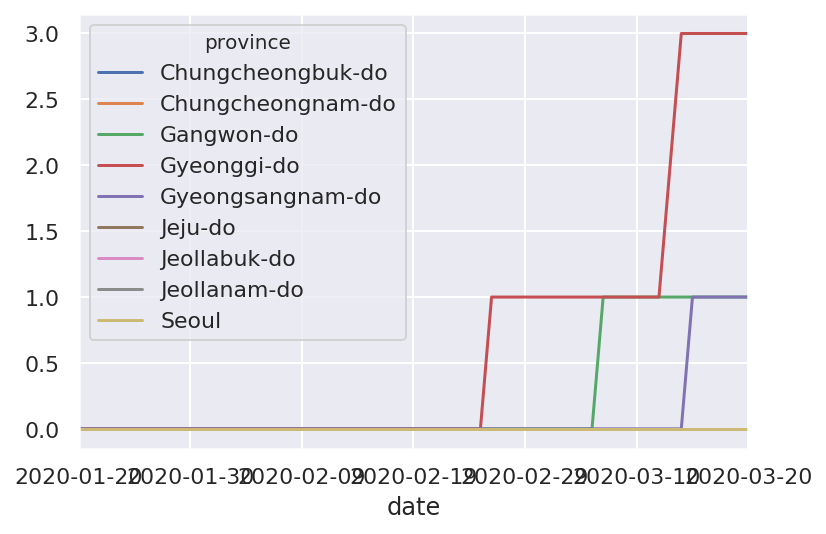

In [124]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['deceased'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()

#### 사망자수가 워낙 적어 의미가 없어보인다.
- 완치자수를 보자 이번엔 바로 대구와 경북은 제외했다.

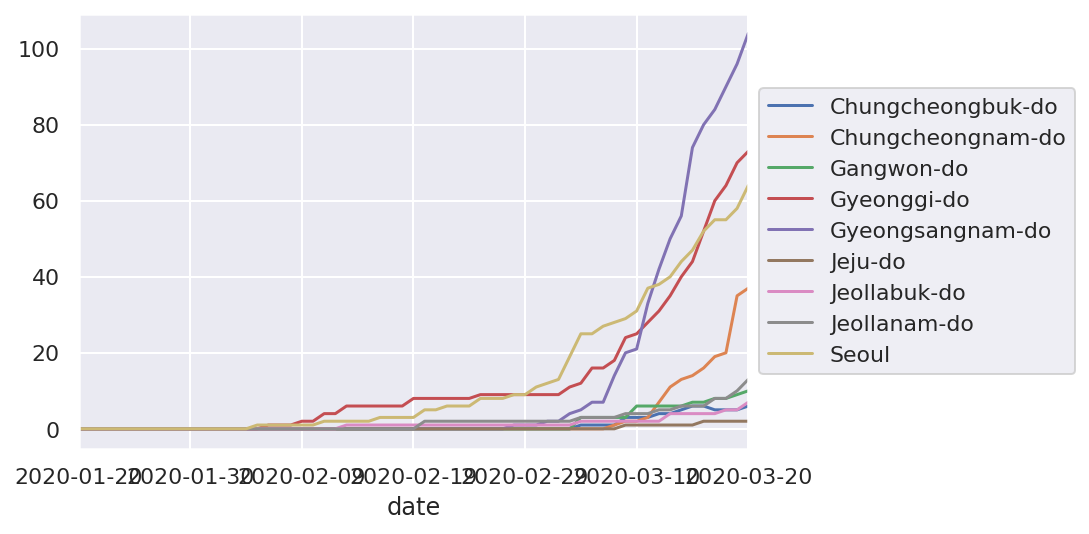

In [125]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['released'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 의외로 경상남도가 가장 완치자가 많은 모습 나머지는 확진자 수와 비슷한데 확진자 수 그래프와는 달리 완치자 수 그래프는 모야이 비슷비슷하다

In [126]:
time_province = pd.read_csv(path+'TimeProvince.csv')
pd.pivot_table(time_province,index='date',columns='province')['confirmed']

province    Busan  Chungcheongbuk-do  Chungcheongnam-do  Daegu  Daejeon  \
date                                                                      
2020-01-20      0                  0                  0      0        0   
2020-01-21      0                  0                  0      0        0   
2020-01-22      0                  0                  0      0        0   
2020-01-23      0                  0                  0      0        0   
2020-01-24      0                  0                  0      0        0   
...           ...                ...                ...    ...      ...   
2020-03-16    107                 31                115   6066       22   
2020-03-17     52                 26                100   5094       18   
2020-03-18     48                 27                102   5038       18   
2020-03-19     48                 28                 87   4794       18   
2020-03-20     47                 27                 87   4631       17   

province    Gangwon-do  Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
date                                                             
2020-01-20           0        0            0                 0   
2020-01-21           0        0            0                 0   
2020-01-22           0        0            0                 0   
2020-01-23           0        0            0                 0   
2020-01-24           0        0            1                 0   
...                ...      ...          ...               ...   
2020-03-16          29       16          231              1164   
2020-03-17          20       10          204               941   
2020-03-18          21       11          215               922   
2020-03-19          20       10          228               894   
2020-03-20          19        8          240               841   

province    Gyeongsangnam-do  Incheon  Jeju-do  Jeollabuk-do  Jeollanam-do  \
date                                                                         
2020-01-20                 0        1        0             0             0   
2020-01-21                 0        1        0             0             0   
2020-01-22                 0        1        0             0             0   
2020-01-23                 0        1        0             0             0   
2020-01-24                 0        1        0             0             0   
...                      ...      ...      ...           ...           ...   
2020-03-16                85       30        4             7             4   
2020-03-17                64       26        2             3             2   
2020-03-18                63       27        2             4             3   
2020-03-19                57       26        2             5             2   
2020-03-20                54       29        2             3             2   

province    Sejong  Seoul  Ulsan  
date                              
2020-01-20       0      0      0  
2020-01-21       0      0      0  
2020-01-22       0      0      0  
2020-01-23       0      0      0  
2020-01-24       0      0      0  
...            ...    ...    ...  
2020-03-16      40    253     28  
2020-03-17      40    210     20  
2020-03-18      41    215     21  
2020-03-19      41    224     27  
2020-03-20      41    235     25  

[61 rows x 17 columns]

#### 각 지역 확진자 수 끼리의 연관성을 알아보자

In [127]:
pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()

province              Busan  Chungcheongbuk-do  Chungcheongnam-do     Daegu  \
province                                                                      
Busan              1.000000           0.857431           0.918315  0.916211   
Chungcheongbuk-do  0.857431           1.000000           0.960482  0.975313   
Chungcheongnam-do  0.918315           0.960482           1.000000  0.994138   
Daegu              0.916211           0.975313           0.994138  1.000000   
Daejeon            0.948248           0.960769           0.982741  0.982679   
Gangwon-do         0.942243           0.948866           0.980948  0.988116   
Gwangju            0.966780           0.894779           0.909707  0.924318   
Gyeonggi-do        0.834352           0.987752           0.948674  0.959361   
Gyeongsangbuk-do   0.941709           0.969502           0.985491  0.995098   
Gyeongsangnam-do   0.982701           0.926833           0.967656  0.968158   
Incheon            0.705639           0.937726           0.874365  0.883557   
Jeju-do            0.969375           0.874432           0.906967  0.924018   
Jeollabuk-do       0.978093           0.835773           0.899351  0.898649   
Jeollanam-do       0.963565           0.844789           0.937803  0.922685   
Sejong             0.476850           0.810301           0.693158  0.707865   
Seoul              0.814529           0.977675           0.933796  0.942676   
Ulsan              0.944259           0.948849           0.984007  0.979648   

province            Daejeon  Gangwon-do   Gwangju  Gyeonggi-do  \
province                                                         
Busan              0.948248    0.942243  0.966780     0.834352   
Chungcheongbuk-do  0.960769    0.948866  0.894779     0.987752   
Chungcheongnam-do  0.982741    0.980948  0.909707     0.948674   
Daegu              0.982679    0.988116  0.924318     0.959361   
Daejeon            1.000000    0.973283  0.945822     0.954028   
Gangwon-do         0.973283    1.000000  0.951761     0.925647   
Gwangju            0.945822    0.951761  1.000000     0.875441   
Gyeonggi-do        0.954028    0.925647  0.875441     1.000000   
Gyeongsangbuk-do   0.987404    0.992844  0.953275     0.950305   
Gyeongsangnam-do   0.986101    0.975610  0.969058     0.908200   
Incheon            0.862831    0.836092  0.761445     0.952987   
Jeju-do            0.934210    0.956976  0.984582     0.843182   
Jeollabuk-do       0.929489    0.933387  0.966111     0.815093   
Jeollanam-do       0.932542    0.952505  0.927827     0.825718   
Sejong             0.693410    0.637262  0.562717     0.849398   
Seoul              0.935658    0.909843  0.860698     0.988820   
Ulsan              0.992542    0.969955  0.928063     0.946463   

province           Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  \
province                                                                    
Busan                      0.941709          0.982701  0.705639  0.969375   
Chungcheongbuk-do          0.969502          0.926833  0.937726  0.874432   
Chungcheongnam-do          0.985491          0.967656  0.874365  0.906967   
Daegu                      0.995098          0.968158  0.883557  0.924018   
Daejeon                    0.987404          0.986101  0.862831  0.934210   
Gangwon-do                 0.992844          0.975610  0.836092  0.956976   
Gwangju                    0.953275          0.969058  0.761445  0.984582   
Gyeonggi-do                0.950305          0.908200  0.952987  0.843182   
Gyeongsangbuk-do           1.000000          0.982939  0.860195  0.952342   
Gyeongsangnam-do           0.982939          1.000000  0.791602  0.967413   
Incheon                    0.860195          0.791602  1.000000  0.722885   
Jeju-do                    0.952342          0.967413  0.722885  1.000000   
Jeollabuk-do               0.925105          0.963939  0.674559  0.964901   
Jeollanam-do               0.934057          0.960595  0.703493  0.934818   
Sejong     

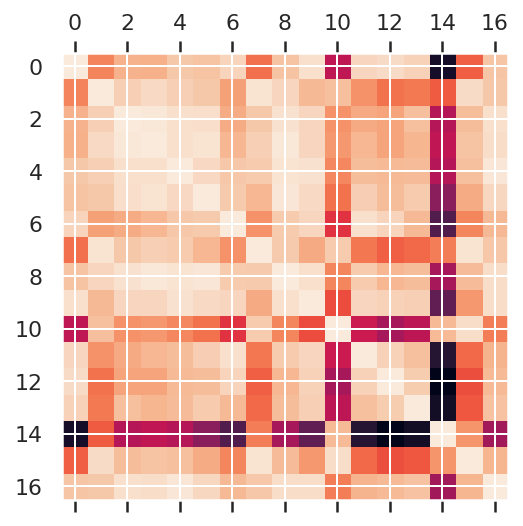

In [128]:
plt.matshow(pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr())

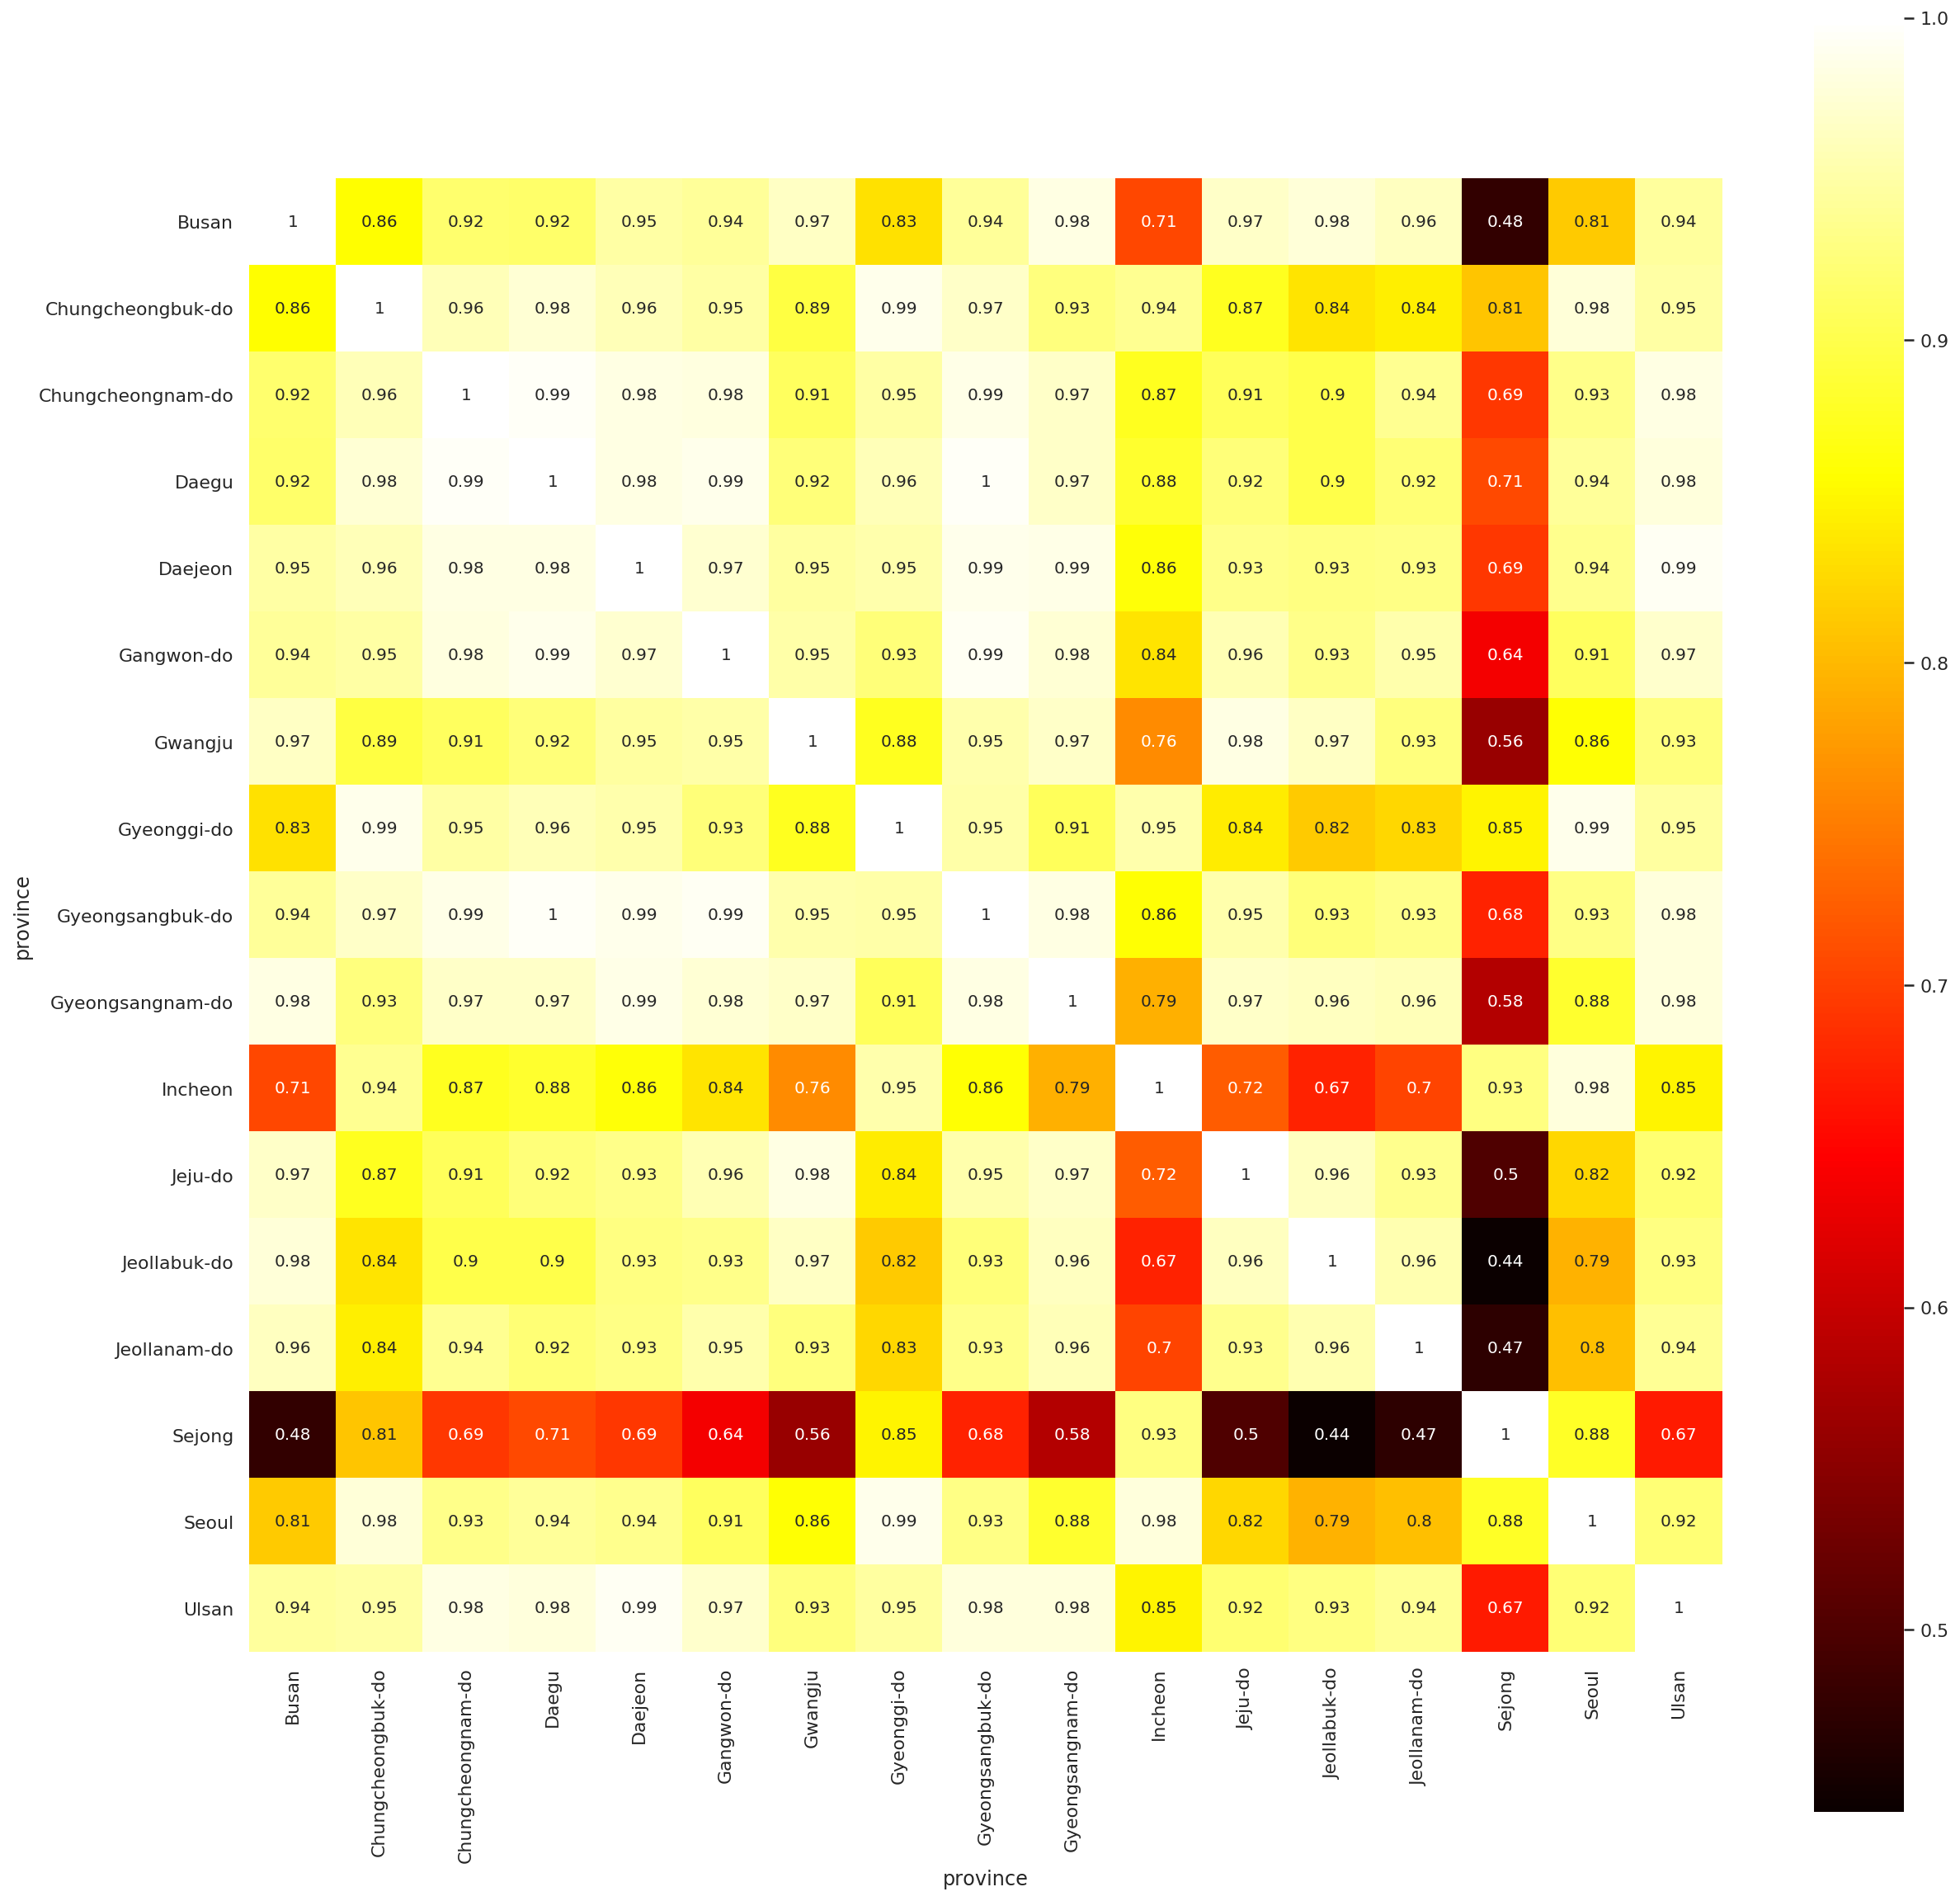

In [129]:
corr=pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr,cbar=True,annot=True,
                     annot_kws={'size':10},square=True,cmap='hot')


#### 색이 옅을수록 연관성이 깊고 색이 진할수록 연관성이 없다는 뜻이다. 생각보다 다들 연관성이 엄청 높은 모습 세종시와 그나마 인천시만이 연관성이 많이 없다. 세종시는 인구가 적어 그런가 싶기도 하다. 이 정보를 각 지역간 교통량? 밀접함 으로 이용할 수 있을까? 일단은 데이터가 너무 정리가 안되어있어 힘들것 같다.

- 묶은 지역으로도 해보자

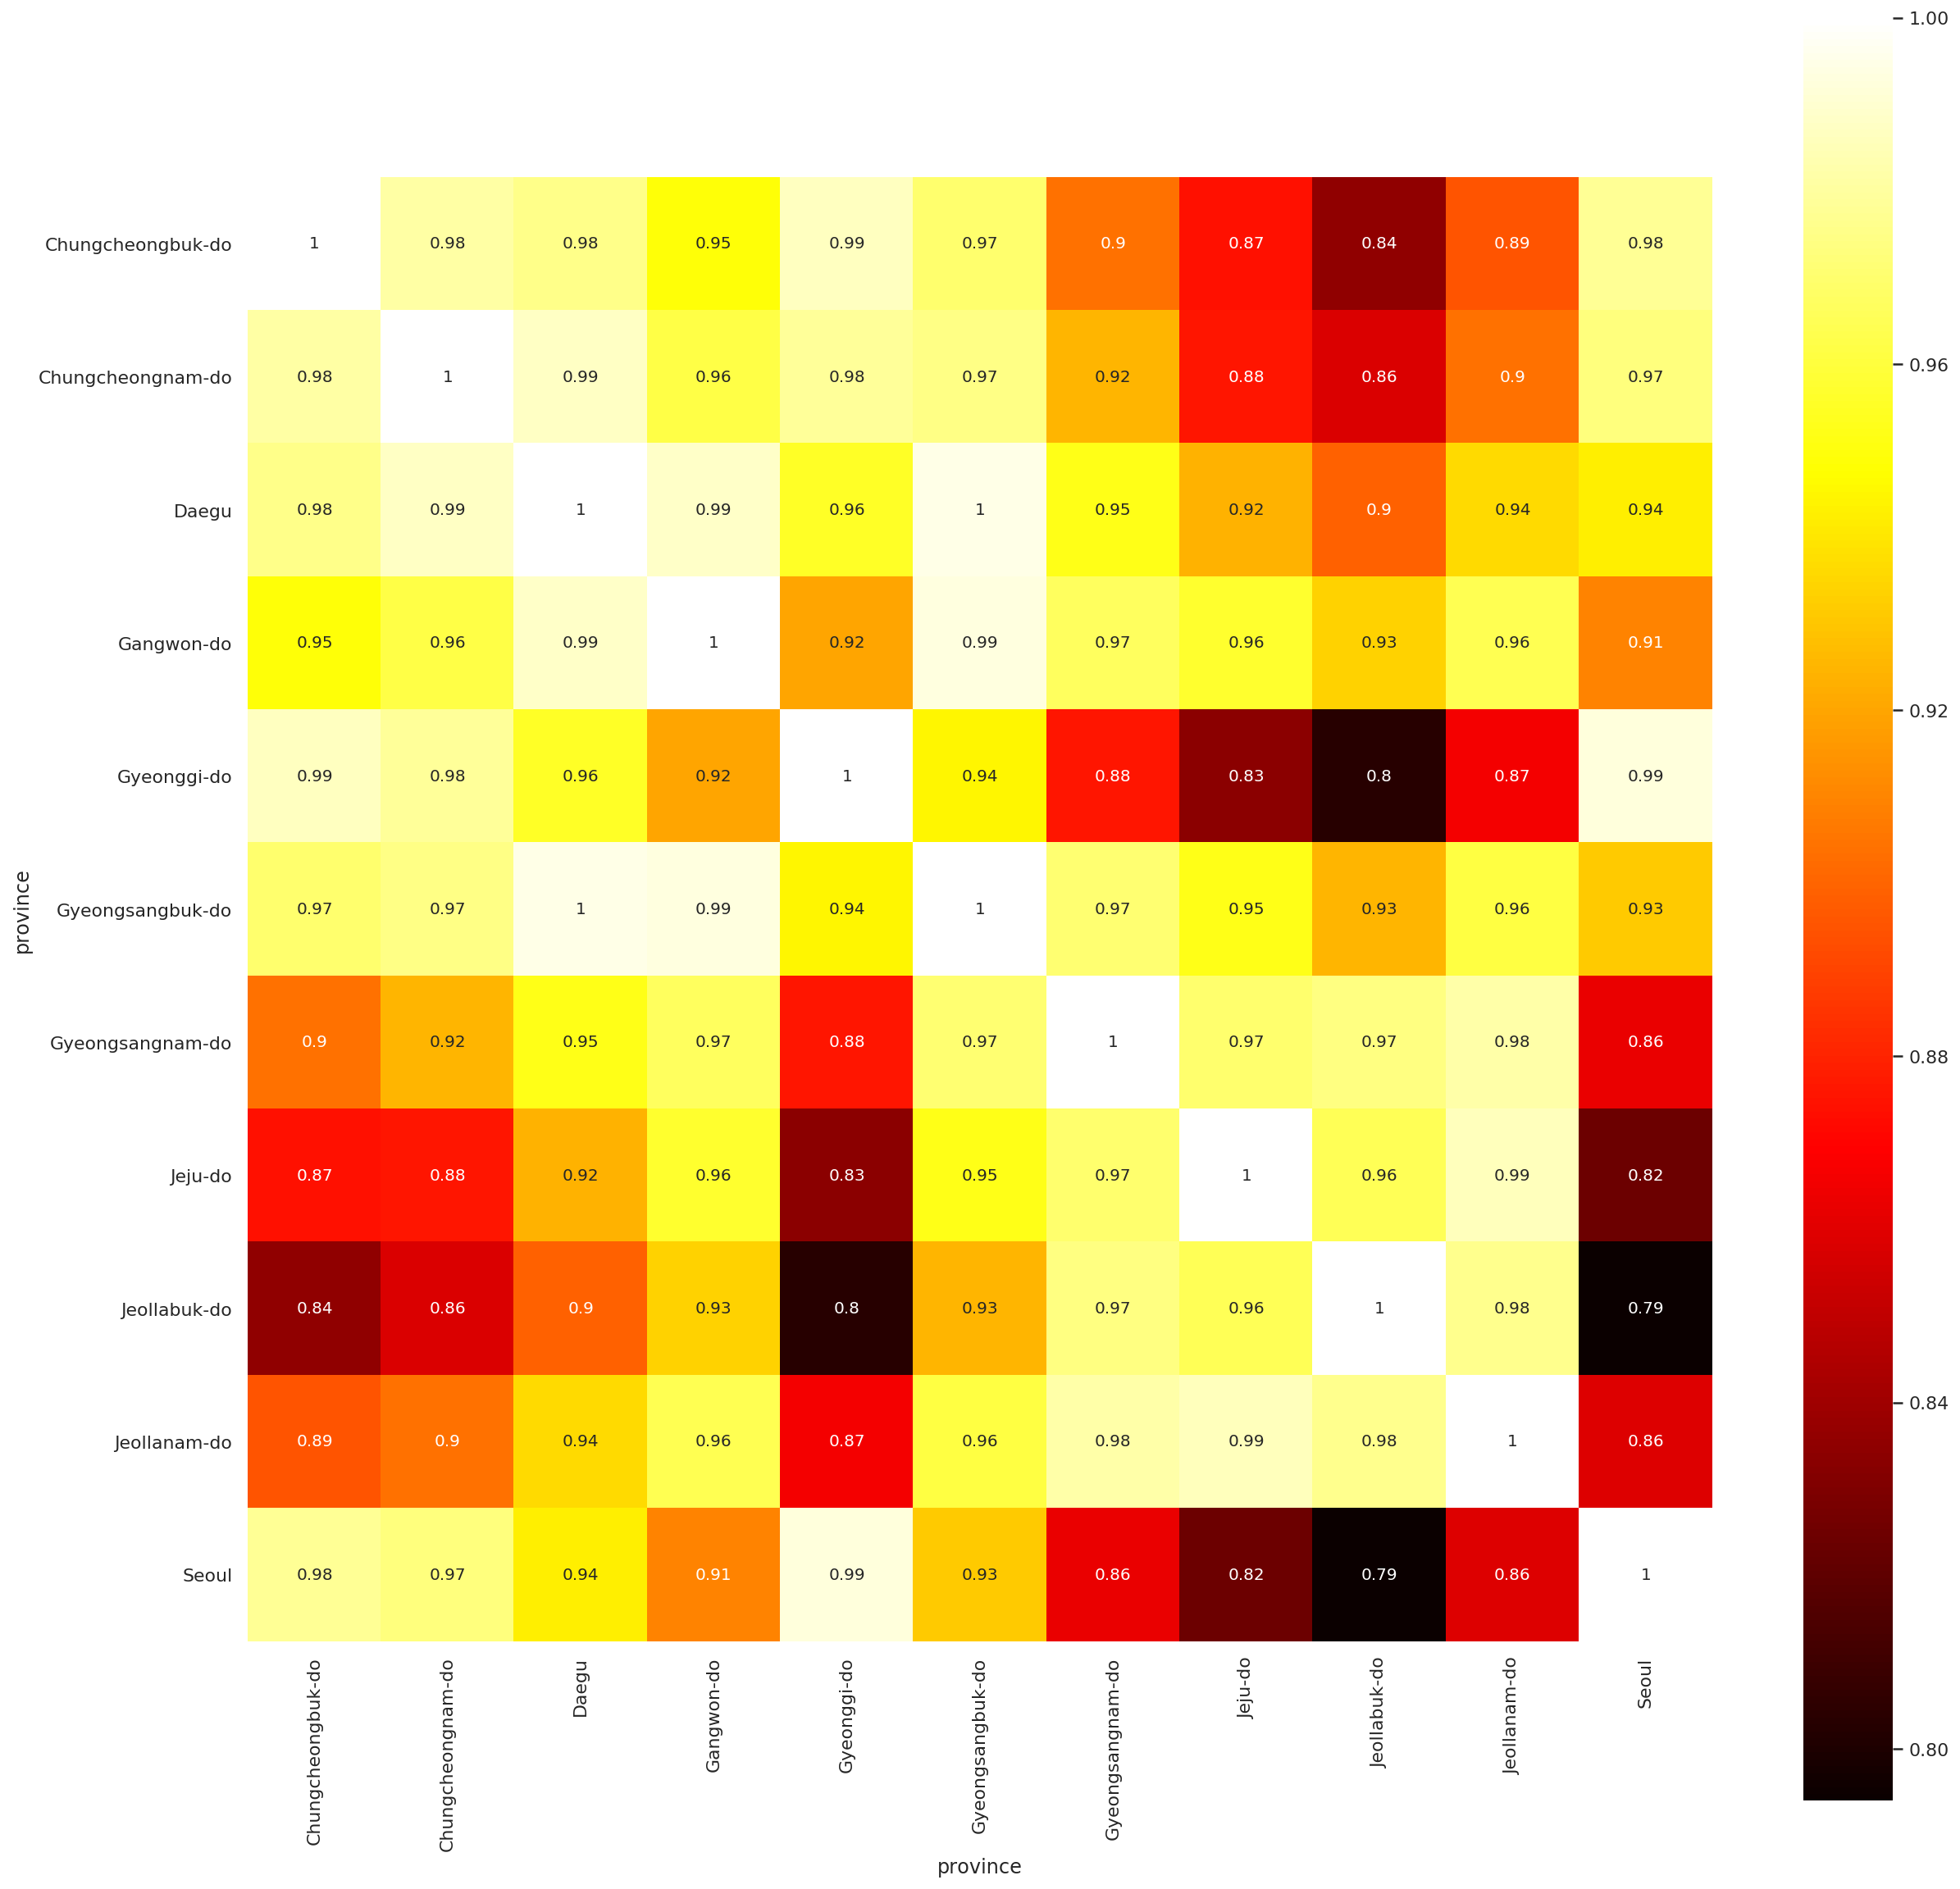

In [130]:
time_province['province']=time_province['province'].apply(convert_province)
#time_province.drop('time',axis=1,inplace=True)
corr=pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr,cbar=True,annot=True,
                     annot_kws={'size':10},square=True,cmap='hot')


#### 여기서는 전라북도가 타지여고가 연관이 적은 모습 의외인 것은 강원도,대구 가 모든지역과 연관이 높다는 점? 혹시 단순한 확진자 수가 아닌 비율로 따져 보면 달라질까 해 각도시별 인구수를 가져왔다.

In [131]:
time_province = pd.read_csv(path+'TimeProvince.csv')
a=10**4
num_citizen={'Seoul':977*a,'Busan':352*a,'Chungcheongbuk-do':157*a,'Chungcheongnam-do':206*a
            ,'Daegu':246*a,'Daejeon':153*a,'Gangwon-do':156*a,'Gwangju':150*a
            ,'Gyeonggi-do':1353*a,'Gyeongsangbuk-do':270*a,'Gyeongsangnam-do':344*a,'Incheon':292*a
            ,'Jeju-do':60*a,'Jeollabuk-do':187*a,'Jeollanam-do':190*a,'Sejong':27*a
            ,'Ulsan':116*a}
def con(a):
    return num_citizen[a]
time_province['num_of_citizen']=time_province['province'].apply(con)
time_province['ratio_of_confirmed']=time_province['confirmed']/time_province['num_of_citizen']
time_province.drop('time',axis=1,inplace=True)
time_province[['ratio_of_confirmed']]

ratio_of_confirmed
0           0.000000e+00
1           0.000000e+00
2           0.000000e+00
3           3.424658e-07
4           0.000000e+00
...                  ...
1032        1.604278e-06
1033        1.052632e-06
1034        3.114815e-04
1035        1.569767e-05
1036        3.333333e-06

[1037 rows x 1 columns]

In [132]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed']

province       Busan  Chungcheongbuk-do  Chungcheongnam-do     Daegu  \
date                                                                   
2020-01-20  0.000000           0.000000           0.000000  0.000000   
2020-01-21  0.000000           0.000000           0.000000  0.000000   
2020-01-22  0.000000           0.000000           0.000000  0.000000   
2020-01-23  0.000000           0.000000           0.000000  0.000000   
2020-01-24  0.000000           0.000000           0.000000  0.000000   
...              ...                ...                ...       ...   
2020-03-16  0.000030           0.000020           0.000056  0.002466   
2020-03-17  0.000015           0.000017           0.000049  0.002071   
2020-03-18  0.000014           0.000017           0.000050  0.002048   
2020-03-19  0.000014           0.000018           0.000042  0.001949   
2020-03-20  0.000013           0.000017           0.000042  0.001883   

province     Daejeon  Gangwon-do   Gwangju   Gyeonggi-do  Gyeongsangbuk-do  \
date                                                                         
2020-01-20  0.000000    0.000000  0.000000  0.000000e+00          0.000000   
2020-01-21  0.000000    0.000000  0.000000  0.000000e+00          0.000000   
2020-01-22  0.000000    0.000000  0.000000  0.000000e+00          0.000000   
2020-01-23  0.000000    0.000000  0.000000  0.000000e+00          0.000000   
2020-01-24  0.000000    0.000000  0.000000  7.390983e-08          0.000000   
...              ...         ...       ...           ...               ...   
2020-03-16  0.000014    0.000019  0.000011  1.707317e-05          0.000431   
2020-03-17  0.000012    0.000013  0.000007  1.507761e-05          0.000349   
2020-03-18  0.000012    0.000013  0.000007  1.589061e-05          0.000341   
2020-03-19  0.000012    0.000013  0.000007  1.685144e-05          0.000331   
2020-03-20  0.000011    0.000012  0.000005  1.773836e-05          0.000311   

province    Gyeongsangnam-do       Incheon   Jeju-do  Jeollabuk-do  \
date                                                                 
2020-01-20          0.000000  3.424658e-07  0.000000      0.000000   
2020-01-21          0.000000  3.424658e-07  0.000000      0.000000   
2020-01-22          0.000000  3.424658e-07  0.000000      0.000000   
2020-01-23          0.000000  3.424658e-07  0.000000      0.000000   
2020-01-24          0.000000  3.424658e-07  0.000000      0.000000   
...                      ...           ...       ...           ...   
2020-03-16          0.000025  1.027397e-05  0.000007      0.000004   
2020-03-17          0.000019  8.904110e-06  0.000003      0.000002   
2020-03-18          0.000018  9.246575e-06  0.000003      0.000002   
2020-03-19          0.000017  8.904110e-06  0.000003      0.000003   
2020-03-20          0.000016  9.931507e-06  0.000003      0.000002   

province    Jeollanam-do    Sejong     Seoul     Ulsan  
date                                                    
2020-01-20      0.000000  0.000000  0.000000  0.000000  
2020-01-21      0.000000  0.000000  0.000000  0.000000  
2020-01-22      0.000000  0.000000  0.000000  0.000000  
2020-01-23      0.000000  0.000000  0.000000  0.000000  
2020-01-24      0.000000  0.000000  0.000000  0.000000  
...                  ...       ...       ...       ...  
2020-03-16      0.000002  0.000148  0.000026  0.000024  
2020-03-17      0.000001  0.000148  0.000021  0.000017  
2020-03-18      0.000002  0.000152  0.000022  0.000018  
2020-03-19      0.000001  0.000152  0.000023  0.000023  
2020-03-20      0.000001  0.000152  0.000024  0.000022  

[61 rows x 17 columns]

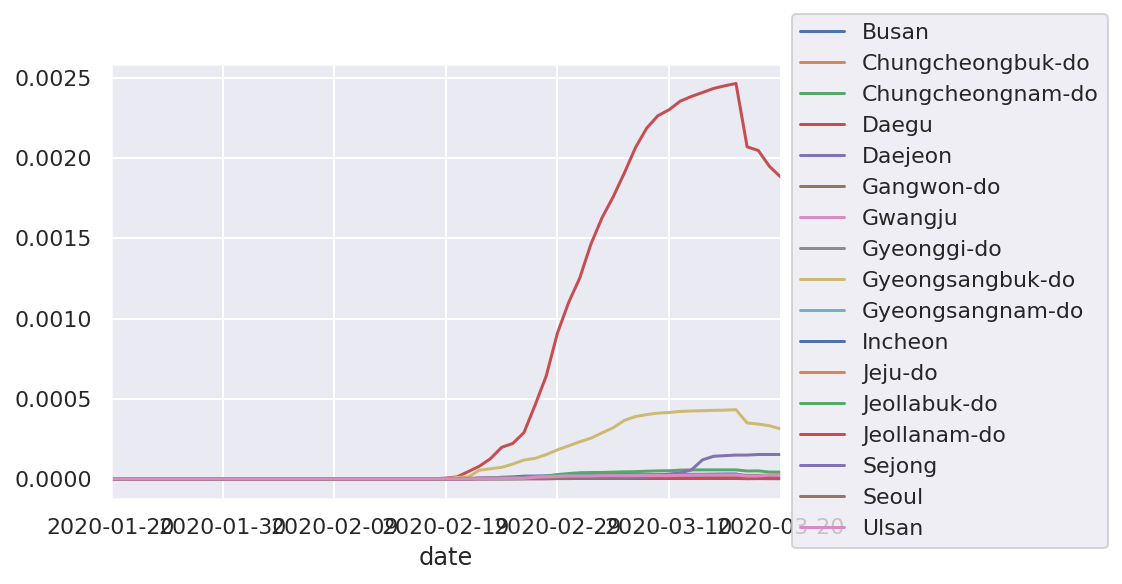

In [133]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 비율로 따져도 크게 달라지는 건 없지만 눈에 띄는건 세종시가 상당히 높아진점이다.

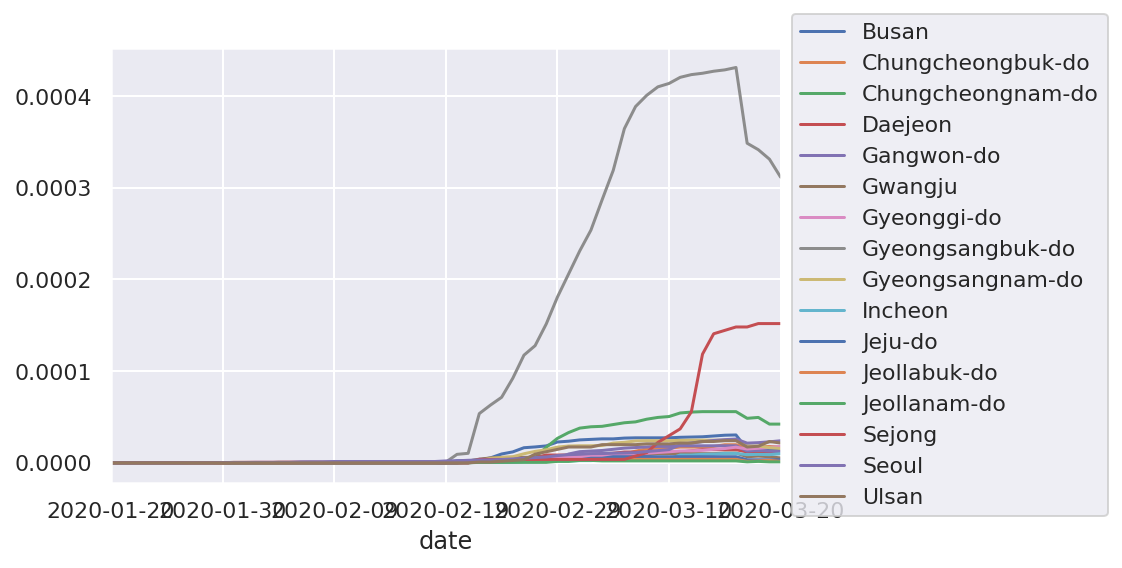

In [134]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].drop('Daegu',axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

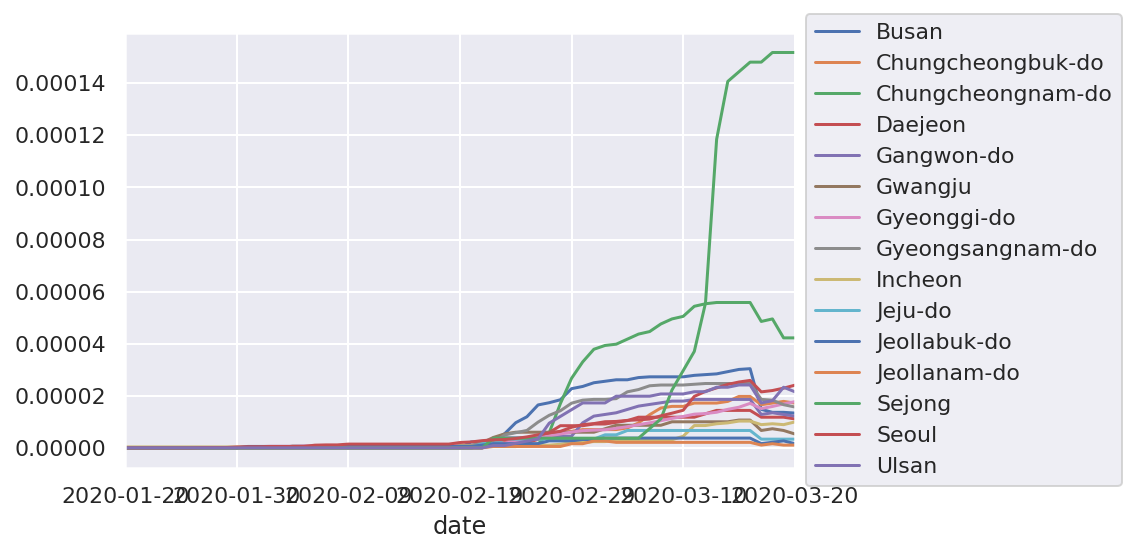

In [135]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 세종시와 충남이 가장 높은 모습 서울과 경기도는 인구수에 비하면 확진자가 적은 편이였다.

In [136]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].corr()

province              Busan  Chungcheongbuk-do  Chungcheongnam-do     Daegu  \
province                                                                      
Busan              1.000000           0.857431           0.918315  0.916211   
Chungcheongbuk-do  0.857431           1.000000           0.960482  0.975313   
Chungcheongnam-do  0.918315           0.960482           1.000000  0.994138   
Daegu              0.916211           0.975313           0.994138  1.000000   
Daejeon            0.948248           0.960769           0.982741  0.982679   
Gangwon-do         0.942243           0.948866           0.980948  0.988116   
Gwangju            0.966780           0.894779           0.909707  0.924318   
Gyeonggi-do        0.834352           0.987752           0.948674  0.959361   
Gyeongsangbuk-do   0.941709           0.969502           0.985491  0.995098   
Gyeongsangnam-do   0.982701           0.926833           0.967656  0.968158   
Incheon            0.705639           0.937726           0.874365  0.883557   
Jeju-do            0.969375           0.874432           0.906967  0.924018   
Jeollabuk-do       0.978093           0.835773           0.899351  0.898649   
Jeollanam-do       0.963565           0.844789           0.937803  0.922685   
Sejong             0.476850           0.810301           0.693158  0.707865   
Seoul              0.814529           0.977675           0.933796  0.942676   
Ulsan              0.944259           0.948849           0.984007  0.979648   

province            Daejeon  Gangwon-do   Gwangju  Gyeonggi-do  \
province                                                         
Busan              0.948248    0.942243  0.966780     0.834352   
Chungcheongbuk-do  0.960769    0.948866  0.894779     0.987752   
Chungcheongnam-do  0.982741    0.980948  0.909707     0.948674   
Daegu              0.982679    0.988116  0.924318     0.959361   
Daejeon            1.000000    0.973283  0.945822     0.954028   
Gangwon-do         0.973283    1.000000  0.951761     0.925647   
Gwangju            0.945822    0.951761  1.000000     0.875441   
Gyeonggi-do        0.954028    0.925647  0.875441     1.000000   
Gyeongsangbuk-do   0.987404    0.992844  0.953275     0.950305   
Gyeongsangnam-do   0.986101    0.975610  0.969058     0.908200   
Incheon            0.862831    0.836092  0.761445     0.952987   
Jeju-do            0.934210    0.956976  0.984582     0.843182   
Jeollabuk-do       0.929489    0.933387  0.966111     0.815093   
Jeollanam-do       0.932542    0.952505  0.927827     0.825718   
Sejong             0.693410    0.637262  0.562717     0.849398   
Seoul              0.935658    0.909843  0.860698     0.988820   
Ulsan              0.992542    0.969955  0.928063     0.946463   

province           Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  \
province                                                                    
Busan                      0.941709          0.982701  0.705639  0.969375   
Chungcheongbuk-do          0.969502          0.926833  0.937726  0.874432   
Chungcheongnam-do          0.985491          0.967656  0.874365  0.906967   
Daegu                      0.995098          0.968158  0.883557  0.924018   
Daejeon                    0.987404          0.986101  0.862831  0.934210   
Gangwon-do                 0.992844          0.975610  0.836092  0.956976   
Gwangju                    0.953275          0.969058  0.761445  0.984582   
Gyeonggi-do                0.950305          0.908200  0.952987  0.843182   
Gyeongsangbuk-do           1.000000          0.982939  0.860195  0.952342   
Gyeongsangnam-do           0.982939          1.000000  0.791602  0.967413   
Incheon                    0.860195          0.791602  1.000000  0.722885   
Jeju-do                    0.952342          0.967413  0.722885  1.000000   
Jeollabuk-do               0.925105          0.963939  0.674559  0.964901   
Jeollanam-do               0.934057          0.960595  0.703493  0.934818   
Sejong     

#### 연관성을 해보았는데 수치가 confirmed와 완전 똑같이 나왔다.. 왜그런지를 모르겠다. 인구수에 비해 확진자수가 적어서 그런가 함수를 잘못 이해한건지.. 한번 알아봐야겠다.

In [137]:
pd.pivot_table(time_province,index='date',columns='province')['released'].corr()

province              Busan  Chungcheongbuk-do  Chungcheongnam-do     Daegu  \
province                                                                      
Busan              1.000000           0.965940           0.897089  0.911165   
Chungcheongbuk-do  0.965940           1.000000           0.813673  0.821044   
Chungcheongnam-do  0.897089           0.813673           1.000000  0.985812   
Daegu              0.911165           0.821044           0.985812  1.000000   
Daejeon            0.986011           0.968455           0.865895  0.872025   
Gangwon-do         0.941154           0.969812           0.831603  0.839977   
Gwangju            0.843517           0.840554           0.830467  0.833860   
Gyeonggi-do        0.965084           0.943434           0.903626  0.920508   
Gyeongsangbuk-do   0.967233           0.927406           0.959560  0.969621   
Gyeongsangnam-do   0.961554           0.938561           0.940928  0.952221   
Incheon            0.920468           0.921369           0.858658  0.858699   
Jeju-do            0.957049           0.949940           0.869287  0.895090   
Jeollabuk-do       0.913744           0.908222           0.859301  0.866298   
Jeollanam-do       0.969213           0.956672           0.927048  0.925241   
Sejong                  NaN                NaN                NaN       NaN   
Seoul              0.924577           0.949640           0.806118  0.819429   
Ulsan              0.977382           0.921213           0.949343  0.969745   

province            Daejeon  Gangwon-do   Gwangju  Gyeonggi-do  \
province                                                         
Busan              0.986011    0.941154  0.843517     0.965084   
Chungcheongbuk-do  0.968455    0.969812  0.840554     0.943434   
Chungcheongnam-do  0.865895    0.831603  0.830467     0.903626   
Daegu              0.872025    0.839977  0.833860     0.920508   
Daejeon            1.000000    0.937605  0.831836     0.944550   
Gangwon-do         0.937605    1.000000  0.886328     0.953092   
Gwangju            0.831836    0.886328  1.000000     0.931295   
Gyeonggi-do        0.944550    0.953092  0.931295     1.000000   
Gyeongsangbuk-do   0.945670    0.939118  0.893158     0.973671   
Gyeongsangnam-do   0.937646    0.955424  0.901324     0.979533   
Incheon            0.913267    0.948648  0.928891     0.966076   
Jeju-do            0.938276    0.939157  0.833037     0.956571   
Jeollabuk-do       0.915446    0.923044  0.942406     0.966596   
Jeollanam-do       0.958046    0.936621  0.848841     0.958775   
Sejong                  NaN         NaN       NaN          NaN   
Seoul              0.917637    0.971251  0.937241     0.966234   
Ulsan              0.948242    0.917666  0.863698     0.966475   

province           Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  \
province                                                                    
Busan                      0.967233          0.961554  0.920468  0.957049   
Chungcheongbuk-do          0.927406          0.938561  0.921369  0.949940   
Chungcheongnam-do          0.959560          0.940928  0.858658  0.869287   
Daegu                      0.969621          0.952221  0.858699  0.895090   
Daejeon                    0.945670          0.937646  0.913267  0.938276   
Gangwon-do                 0.939118          0.955424  0.948648  0.939157   
Gwangju                    0.893158          0.901324  0.928891  0.833037   
Gyeonggi-do                0.973671          0.979533  0.966076  0.956571   
Gyeongsangbuk-do           1.000000          0.991408  0.933037  0.945875   
Gyeongsangnam-do           0.991408          1.000000  0.941330  0.966993   
Incheon                    0.933037          0.941330  1.000000  0.904381   
Jeju-do                    0.945875          0.966993  0.904381  1.000000   
Jeollabuk-do               0.935311          0.930445  0.958450  0.877496   
Jeollanam-do               0.972797          0.974003  0.916658  0.962018   
Sejong     

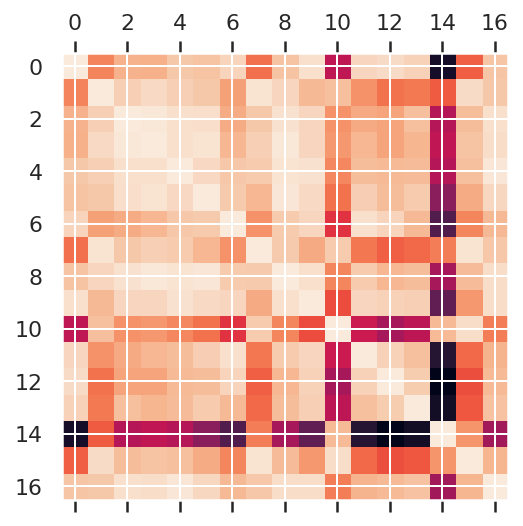

In [138]:
plt.matshow(pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].corr())

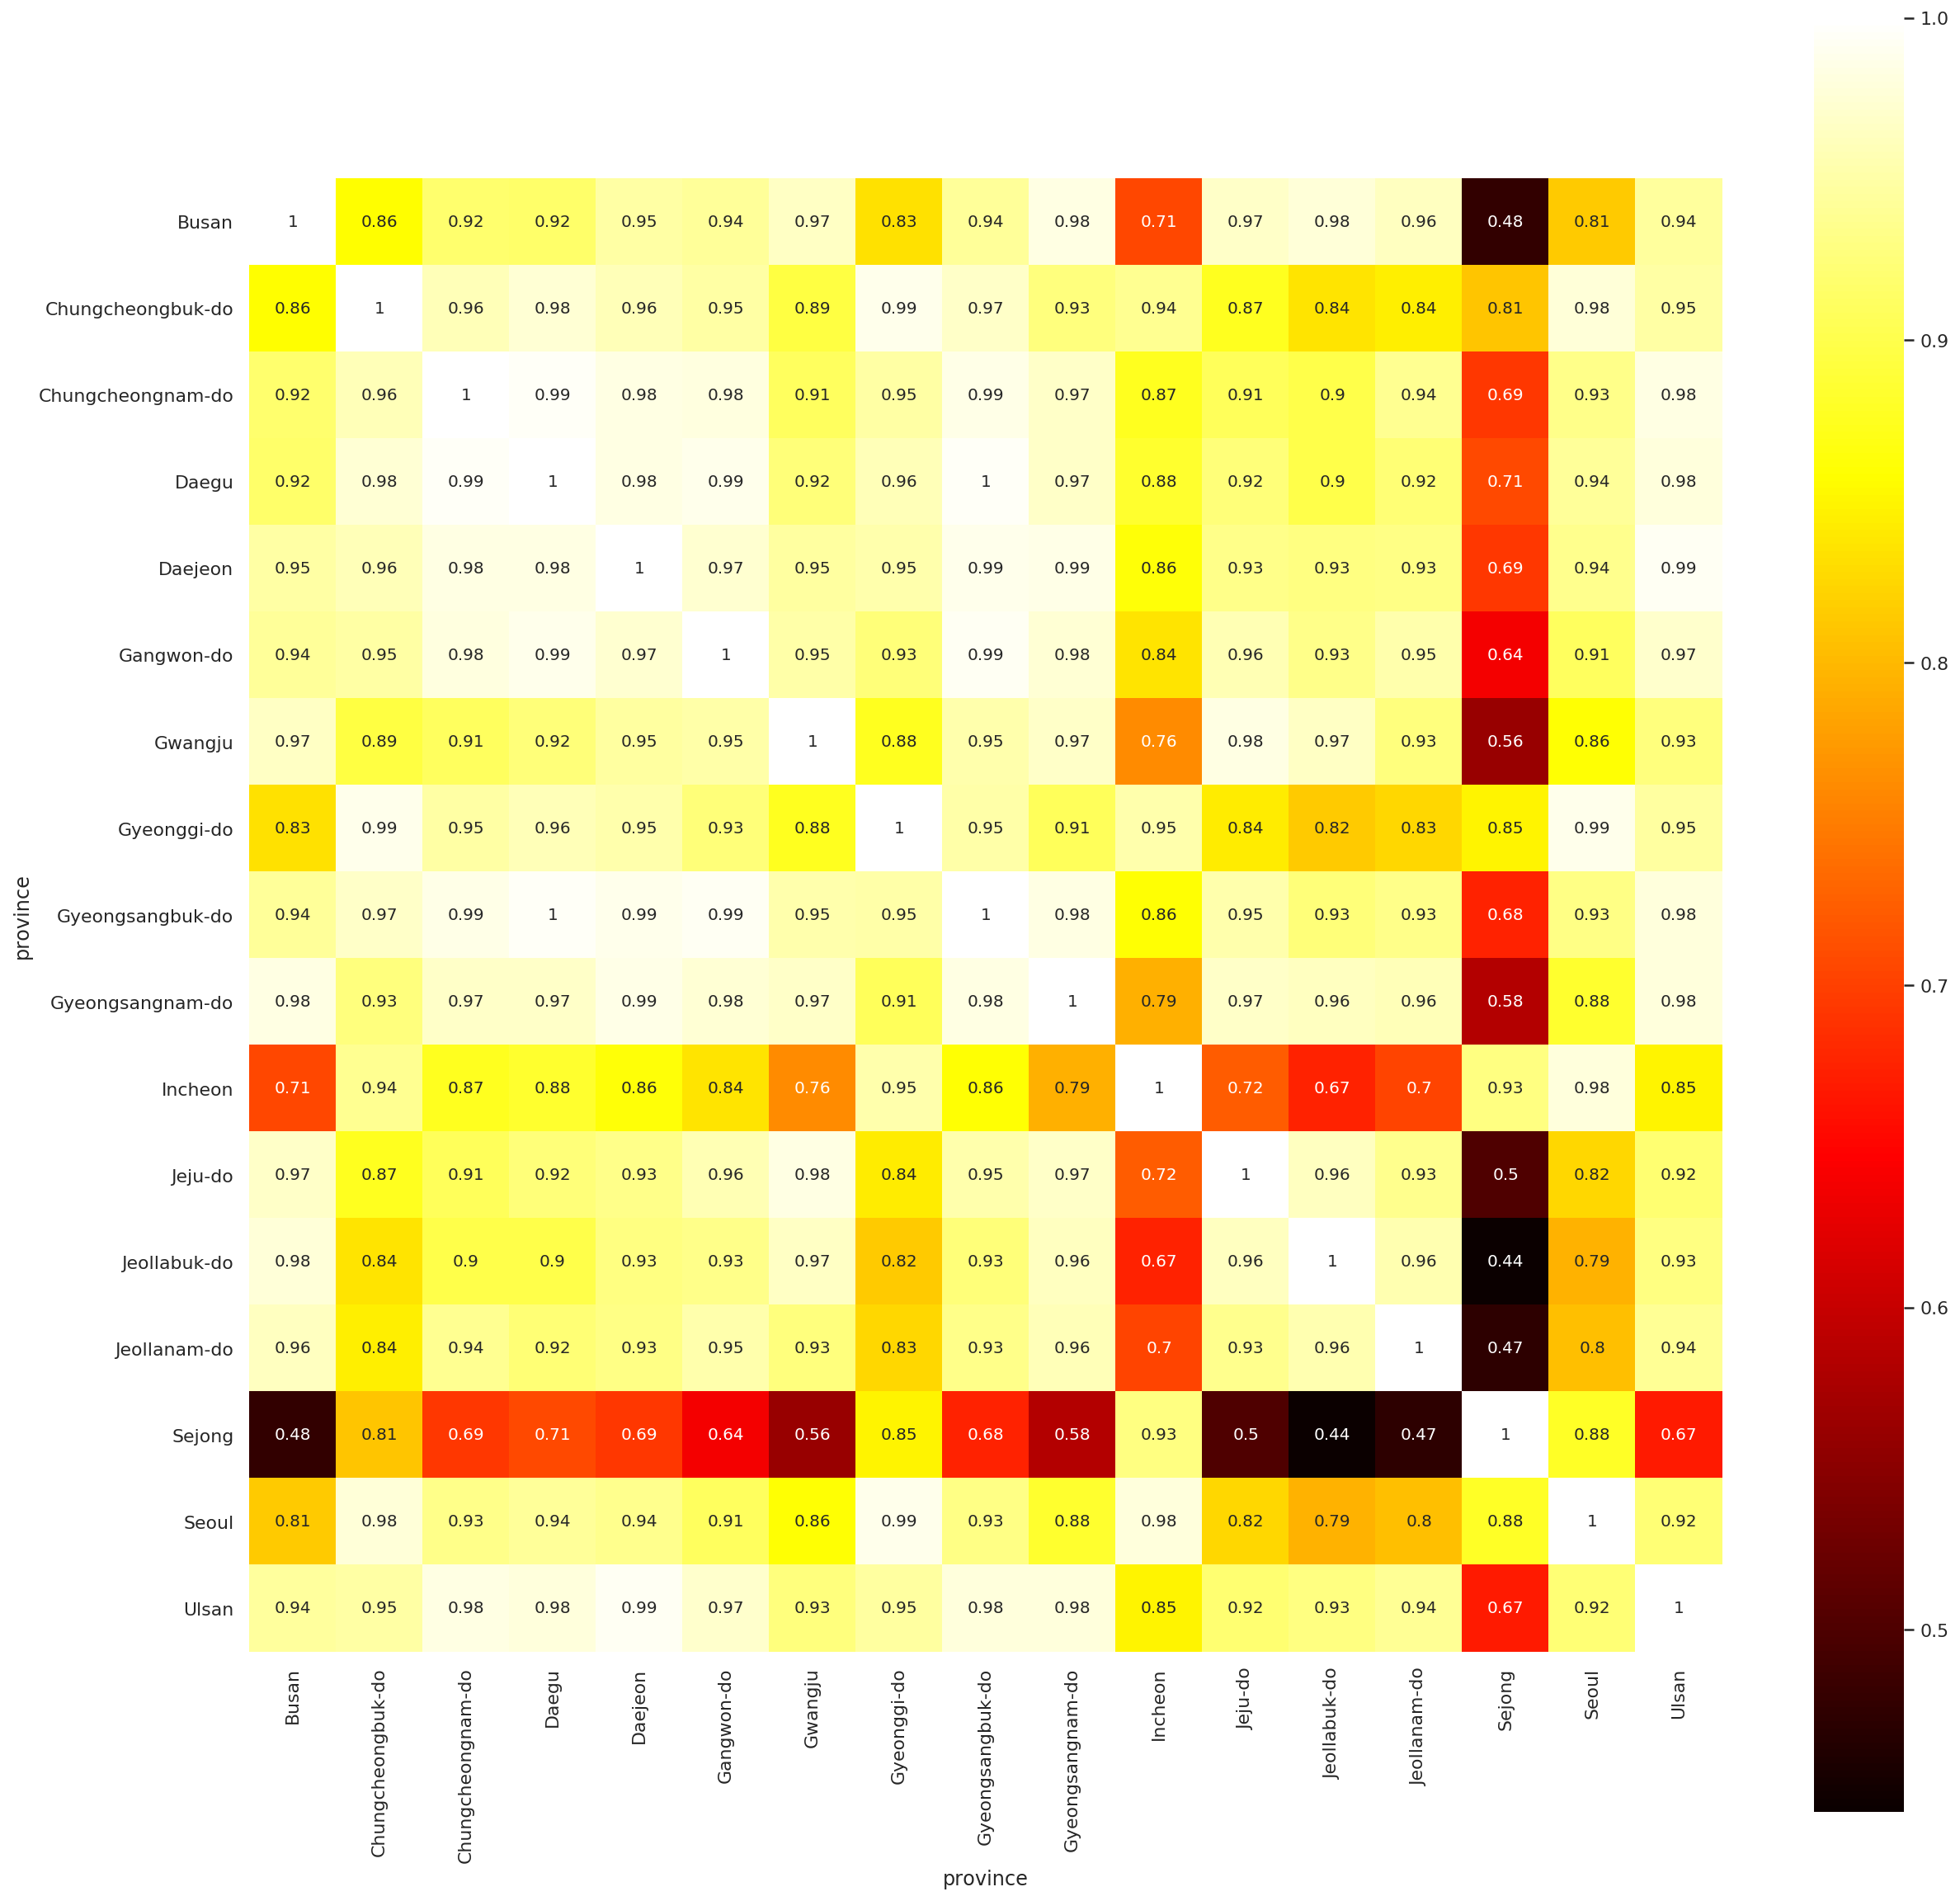

In [139]:
corr=pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr,cbar=True,annot=True,
                     annot_kws={'size':10},square=True,cmap='hot')

# 4. Additional Data

# 4-1. Region

- code: 지역 코드
- province: 특별시, 광역시, 도 까지지의 정보
- city: 시,군,구 까지의 정보
- latitude: the latitude of the visit (WGS84):위도
- longitude: the longitude of the visit (WGS84):경도:
- elementary_school_count: 지역의 초등학교 수
- kindergarten_count:지역의 유치원 수
- university_count:지역의 대학교
- academy_ratio: the ratio of academies 지역의 학원 비율?
- elderly_population_ratio:노인 인구 비율
- elderly_alone_ratio:독거노인 비율
- nursing_home_count: 지역의 요양병원 수

In [140]:
region.head()

code province         city   latitude   longitude  \
0  10000    Seoul        Seoul  37.566953  126.977977   
1  10010    Seoul   Gangnam-gu  37.518421  127.047222   
2  10020    Seoul  Gangdong-gu  37.530492  127.123837   
3  10030    Seoul   Gangbuk-gu  37.639938  127.025508   
4  10040    Seoul   Gangseo-gu  37.551166  126.849506   

   elementary_school_count  kindergarten_count  university_count  \
0                      607                 830                48   
1                       33                  38                 0   
2                       27                  32                 0   
3                       14                  21                 0   
4                       36                  56                 1   

   academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0           1.44                     15.38                  5.8   
1           4.18                     13.17                  4.3   
2           1.54                     14.55                  5.4   
3           0.67                     19.49                  8.5   
4           1.17                     14.39                  5.7   

   nursing_home_count  
0               22739  
1                3088  
2                1023  
3                 628  
4                1080

In [141]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
code                        244 non-null int64
province                    244 non-null object
city                        244 non-null object
latitude                    244 non-null float64
longitude                   244 non-null float64
elementary_school_count     244 non-null int64
kindergarten_count          244 non-null int64
university_count            244 non-null int64
academy_ratio               244 non-null float64
elderly_population_ratio    244 non-null float64
elderly_alone_ratio         244 non-null float64
nursing_home_count          244 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


## 각 지역의 초등학교, 유치원, 대학교 수 파악하기

In [142]:
region_group = region.groupby('province')

In [143]:
region_group.head()

code          province          city   latitude   longitude  \
0    10000             Seoul         Seoul  37.566953  126.977977   
1    10010             Seoul    Gangnam-gu  37.518421  127.047222   
2    10020             Seoul   Gangdong-gu  37.530492  127.123837   
3    10030             Seoul    Gangbuk-gu  37.639938  127.025508   
4    10040             Seoul    Gangseo-gu  37.551166  126.849506   
..     ...               ...           ...        ...         ...   
225  61020  Gyeongsangnam-do  Geochang-gun  35.686526  127.910021   
226  61030  Gyeongsangnam-do   Goseong-gun  34.972986  128.322246   
227  61040  Gyeongsangnam-do     Gimhae-si  35.228678  128.889352   
242  70000           Jeju-do       Jeju-do  33.488936  126.500423   
243  80000             Korea         Korea  37.566953  126.977977   

     elementary_school_count  kindergarten_count  university_count  \
0                        607                 830                48   
1                         33                  38                 0   
2                         27                  32                 0   
3                         14                  21                 0   
4                         36                  56                 1   
..                       ...                 ...               ...   
225                       17                  16                 2   
226                       19                  18                 0   
227                       58                  91                 4   
242                      113                 123                 4   
243                     6087                8837               340   

     academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0             1.44                     15.38                  5.8   
1             4.18                     13.17                  4.3   
2             1.54                     14.55                  5.4   
3             0.67                     19.49                  8.5   
4             1.17                     14.39                  5.7   
..             ...                       ...                  ...   
225           1.25                     27.01                 17.4   
226           1.30                     30.17                 18.2   
227           2.10                     10.74                  5.3   
242           1.53                     15.10                  6.4   
243           1.56                     15.67                  7.2   

     nursing_home_count  
0                 22739  
1                  3088  
2                  1023  
3                   628  
4                  1080  
..                  ...  
225                 127  
226                  89  
227                 711  
242                1245  
243               94865  

[78 rows x 12 columns]

In [144]:
region_group.groups

{'Busan': Int64Index([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
             42],
            dtype='int64'),
 'Chungcheongbuk-do': Int64Index([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144], dtype='int64'),
 'Chungcheongnam-do': Int64Index([145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
             158, 159, 160],
            dtype='int64'),
 'Daegu': Int64Index([43, 44, 45, 46, 47, 48, 49, 50, 51], dtype='int64'),
 'Daejeon': Int64Index([69, 70, 71, 72, 73, 74], dtype='int64'),
 'Gangwon-do': Int64Index([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
             127, 128, 129, 130, 131, 132],
            dtype='int64'),
 'Gwangju': Int64Index([52, 53, 54, 55, 56, 57], dtype='int64'),
 'Gyeonggi-do': Int64Index([ 82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
              95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
             108, 109, 110, 111, 112, 113],
            dtype

In [145]:
Busan = list(range(26, 43))
Chungcheongbuk = list(range(133, 145))
Chungcheongnam = list(range(145, 161))
Daegu = list(range(43, 52))
Daejeon = list(range(69, 75))
Gangwon = list(range(114, 133))
Gwangju = list(range(52, 58))
Gyeonggi = list(range(82, 114))
Gyeongsangbuk = list(range(199, 223))
Gyeongsangnam = list(range(223, 242))
Incheon = list(range(58, 69))
Jeju = [242]
Jeollabuk = list(range(161, 176))
Jeollanam = list(range(176, 199))
Korea = [243]
Sejong = [81]
Seoul = list(range(0, 26))
Ulsan = list(range(75, 81))

## 서울

In [146]:
Seoul_df = region.loc[Seoul].reset_index()

In [147]:
Seoul_df.drop(0, inplace = True)

In [148]:
Seoul_df['count_school'] = Seoul_df['elementary_school_count'] + Seoul_df['kindergarten_count'] + Seoul_df['university_count']

In [149]:
Seoul_df.head()

index   code province         city   latitude   longitude  \
1      1  10010    Seoul   Gangnam-gu  37.518421  127.047222   
2      2  10020    Seoul  Gangdong-gu  37.530492  127.123837   
3      3  10030    Seoul   Gangbuk-gu  37.639938  127.025508   
4      4  10040    Seoul   Gangseo-gu  37.551166  126.849506   
5      5  10050    Seoul    Gwanak-gu  37.478290  126.951502   

   elementary_school_count  kindergarten_count  university_count  \
1                       33                  38                 0   
2                       27                  32                 0   
3                       14                  21                 0   
4                       36                  56                 1   
5                       22                  33                 1   

   academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
1           4.18                     13.17                  4.3   
2           1.54                     14.55                  5.4   
3           0.67                     19.49                  8.5   
4           1.17                     14.39                  5.7   
5           0.89                     15.12                  4.9   

   nursing_home_count  count_school  
1                3088            71  
2                1023            59  
3                 628            35  
4                1080            93  
5                 909            56

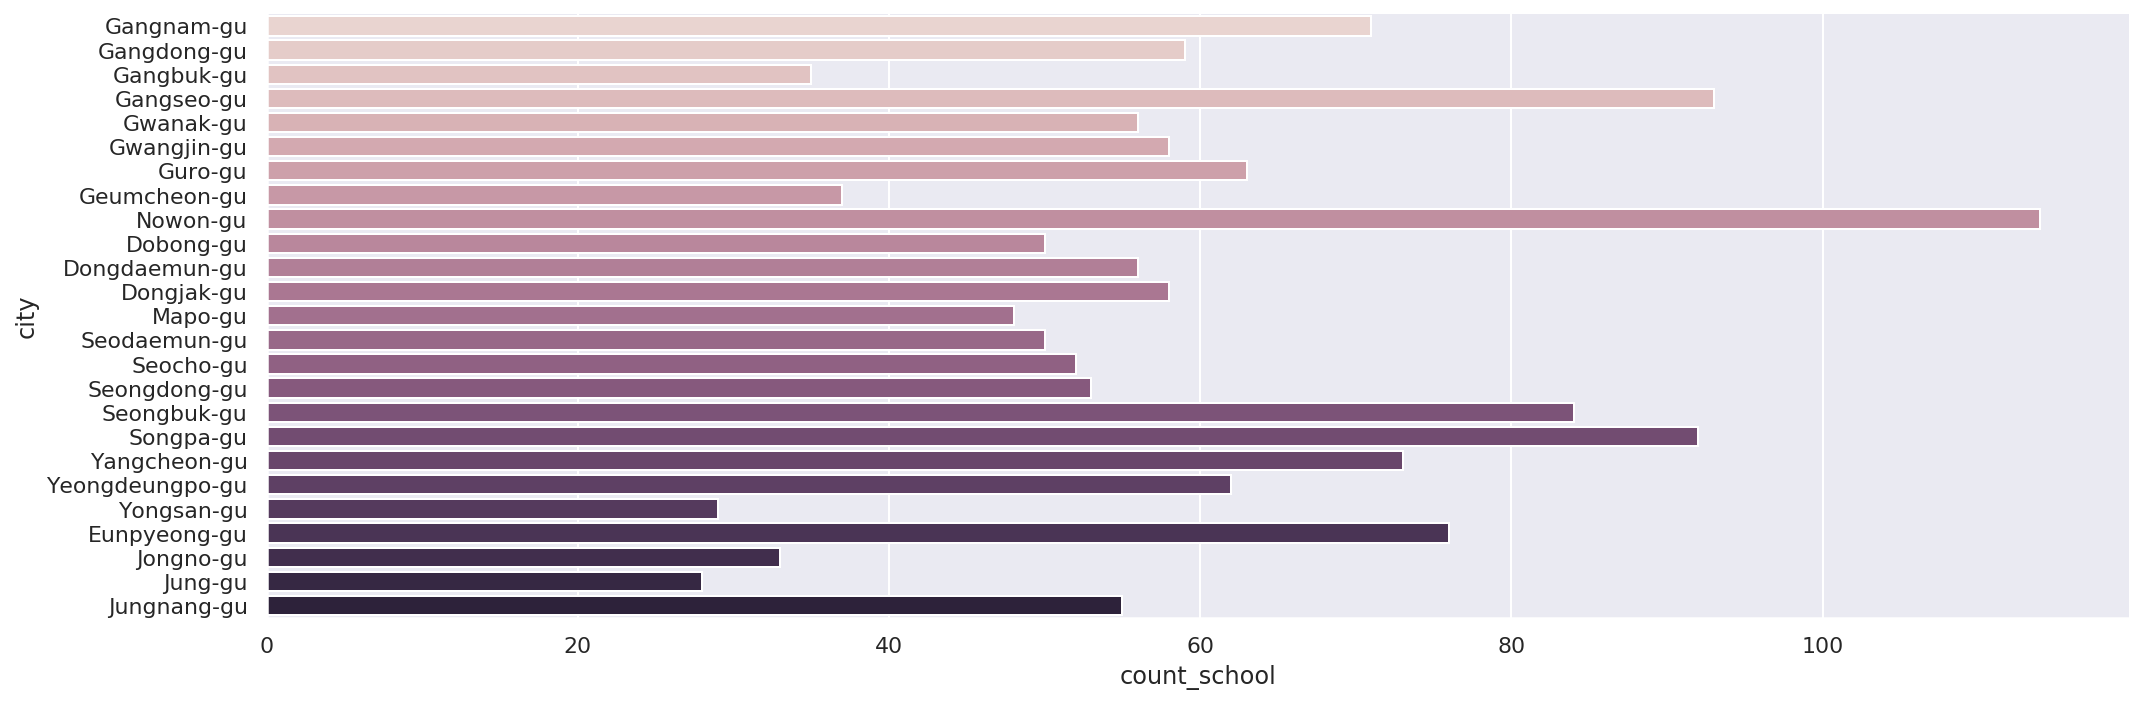

In [150]:
sns.catplot(x="count_school", y="city", palette="ch:.0", data=Seoul_df, kind="bar", aspect=3)

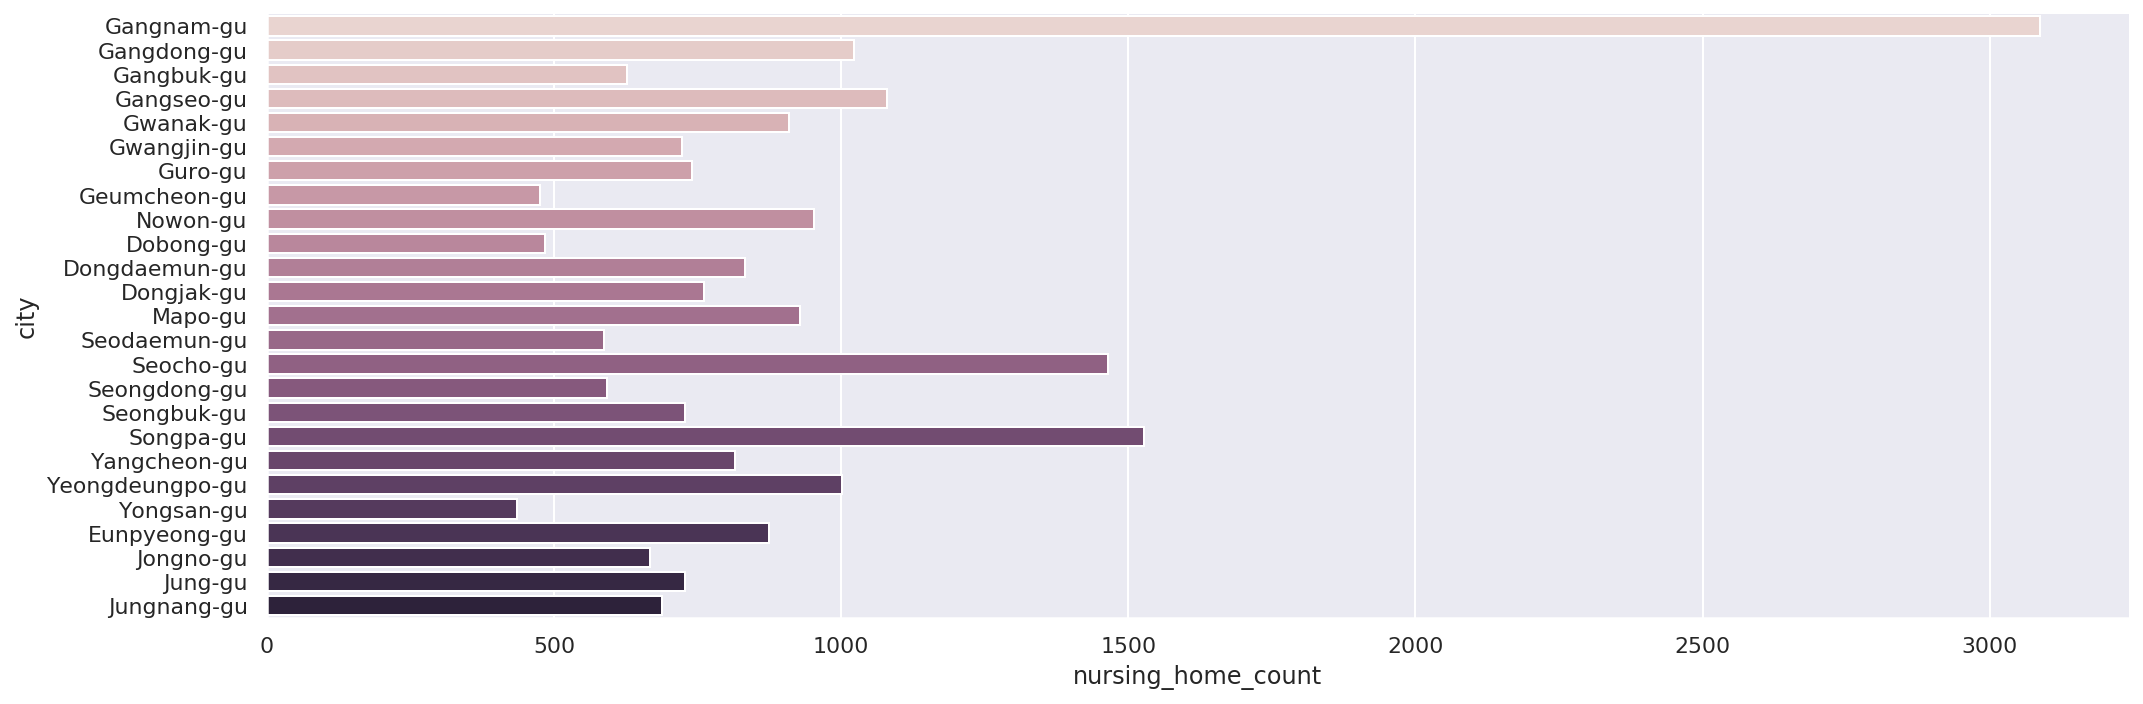

In [151]:
sns.catplot(x="nursing_home_count", y="city", palette="ch:.0", data=Seoul_df, kind="bar", aspect=3)

In [152]:
df = pd.DataFrame(data = [Seoul_df['count_school'], Seoul_df['nursing_home_count'], Seoul_df['city']])

In [153]:
df = df.T.set_index('city')

In [154]:
df

count_school nursing_home_count
city                                           
Gangnam-gu                71               3088
Gangdong-gu               59               1023
Gangbuk-gu                35                628
Gangseo-gu                93               1080
Gwanak-gu                 56                909
Gwangjin-gu               58                723
Guro-gu                   63                741
Geumcheon-gu              37                475
Nowon-gu                 114                952
Dobong-gu                 50                485
Dongdaemun-gu             56                832
Dongjak-gu                58                762
Mapo-gu                   48                929
Seodaemun-gu              50                587
Seocho-gu                 52               1465
Seongdong-gu              53                593
Seongbuk-gu               84                729
Songpa-gu                 92               1527
Yangcheon-gu              73                816
Yeongdeungpo-gu           62               1001
Yongsan-gu                29                435
Eunpyeong-gu              76                874
Jongno-gu                 33                668
Jung-gu                   28                728
Jungnang-gu               55                689

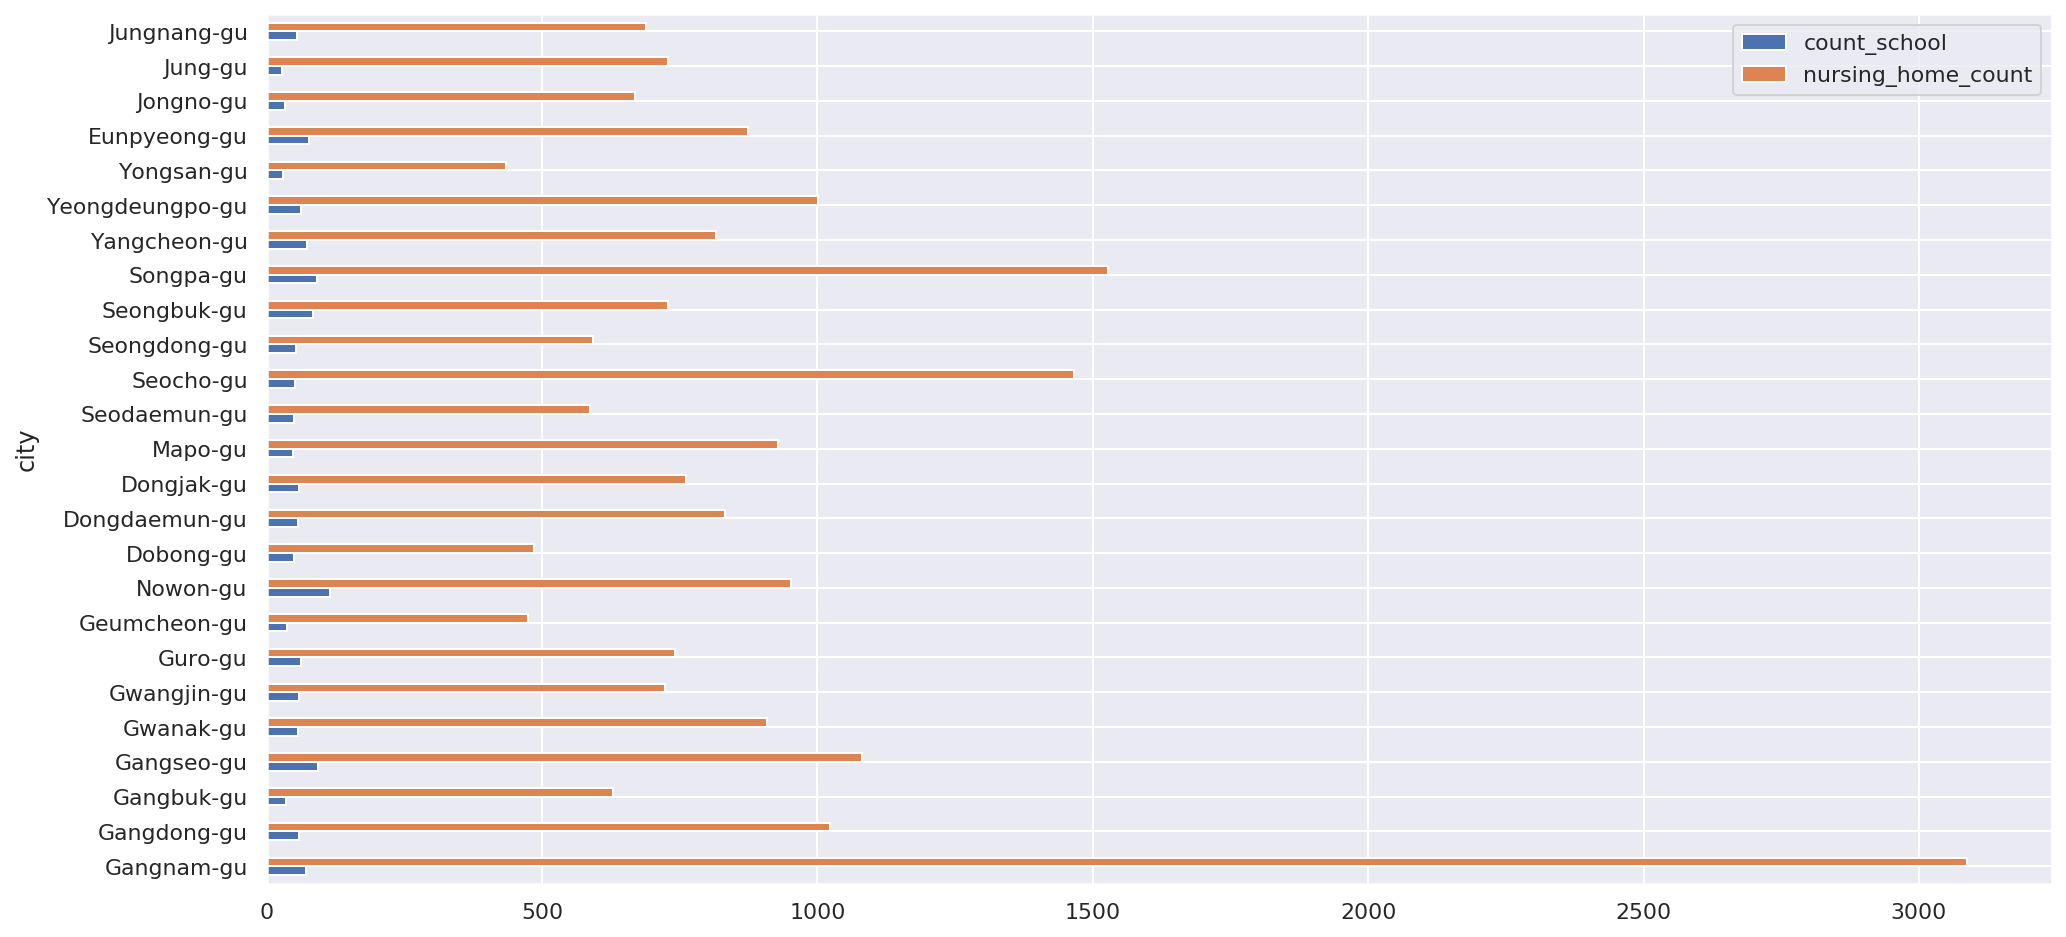

In [155]:
df.plot(kind = "barh", figsize = (16, 8))

## 함수 설정

In [156]:
def school_count_graph(province_):
    province_df = region.loc[province_].reset_index()
    if len(province_df.index) != 1:
        province_df.drop(0, inplace = True)
        
    province_df['count_school'] = province_df['elementary_school_count'] + province_df['kindergarten_count'] + province_df['university_count']
    df = pd.DataFrame(data = [province_df['count_school'], province_df['nursing_home_count'], province_df['city']])
    df = df.T.set_index('city')
    df.plot(kind = "barh", figsize = (16, 8))

## 경기도

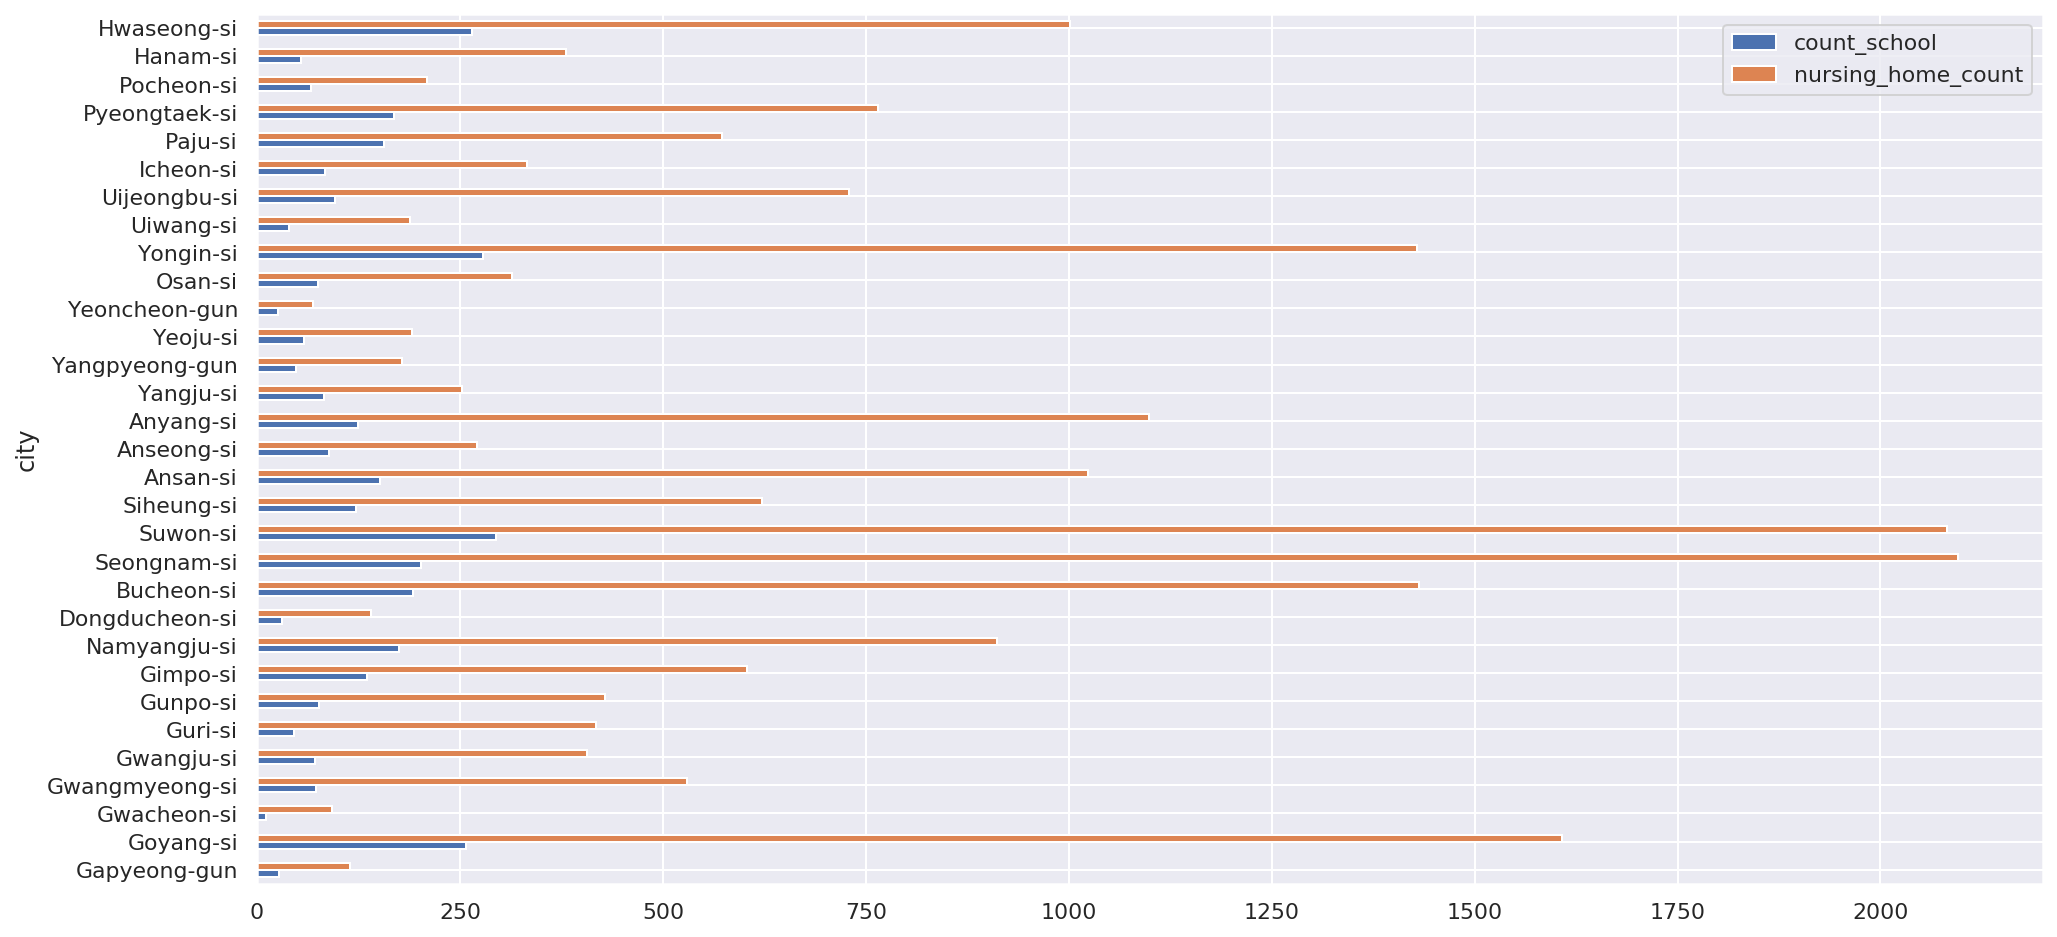

In [157]:
school_count_graph(Gyeonggi)

## 부산

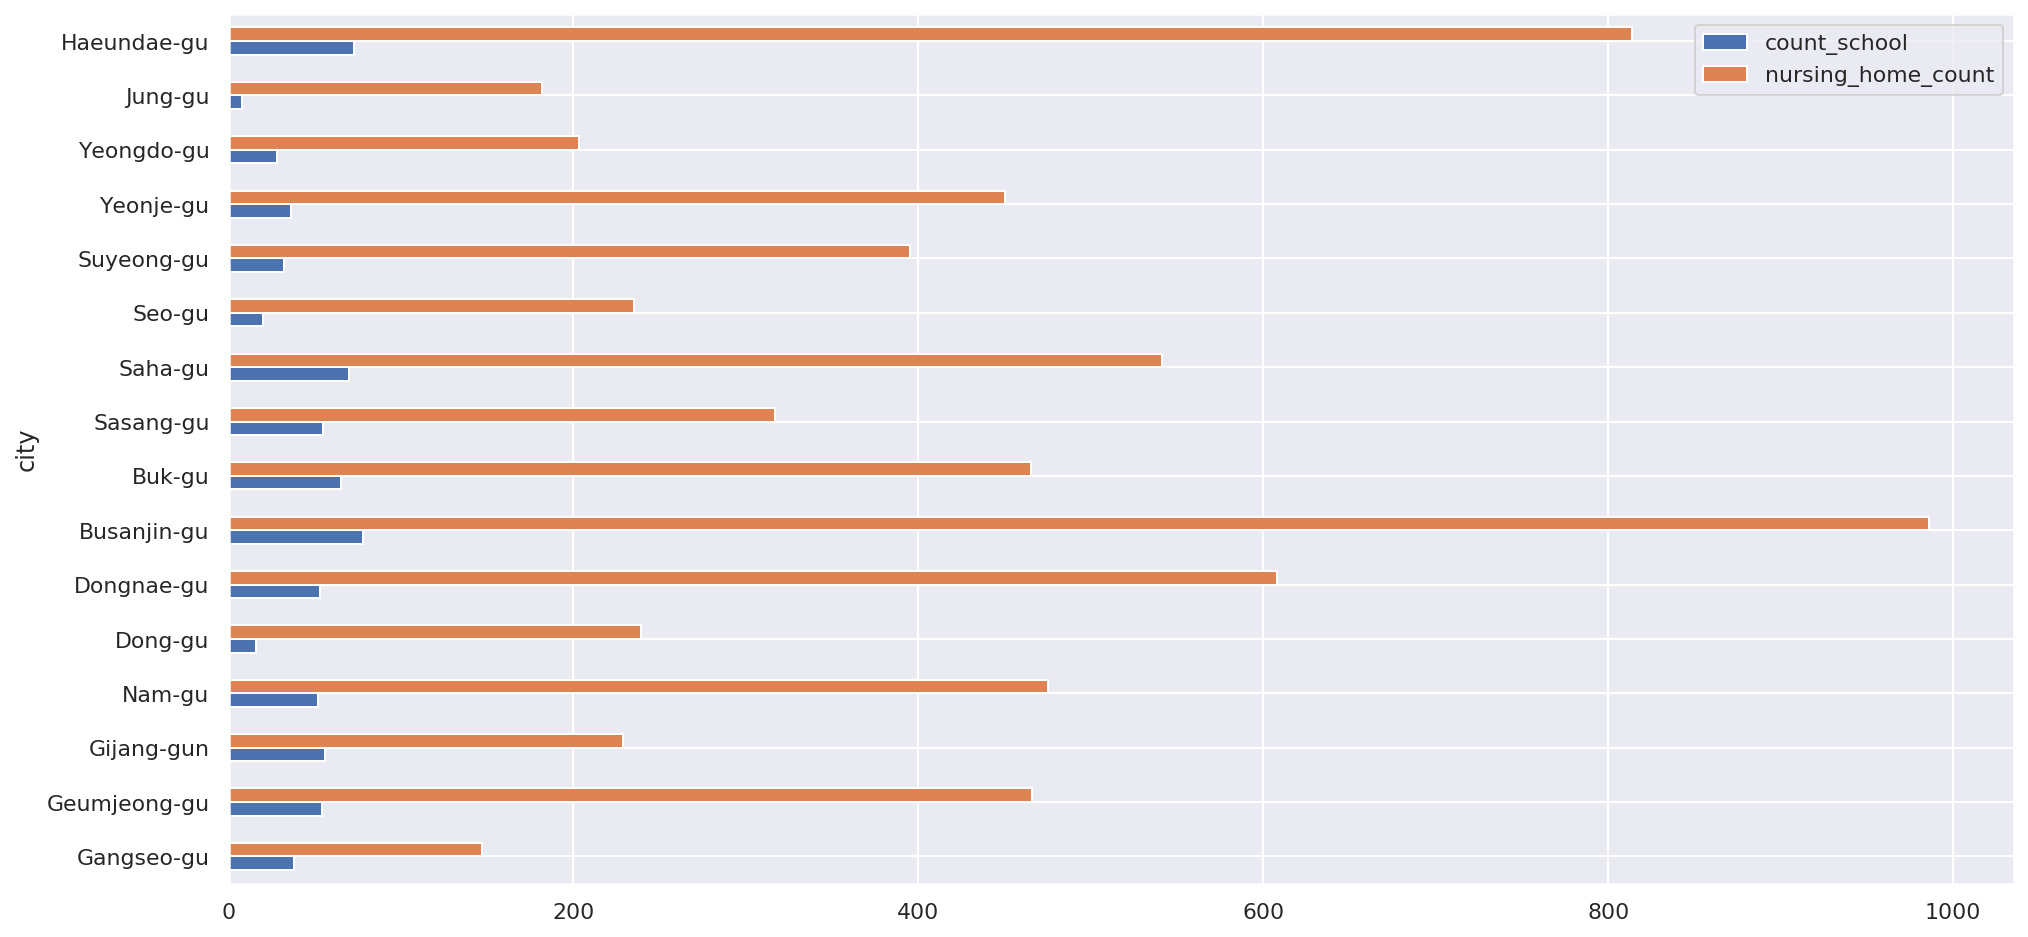

In [158]:
school_count_graph(Busan)

## 대구

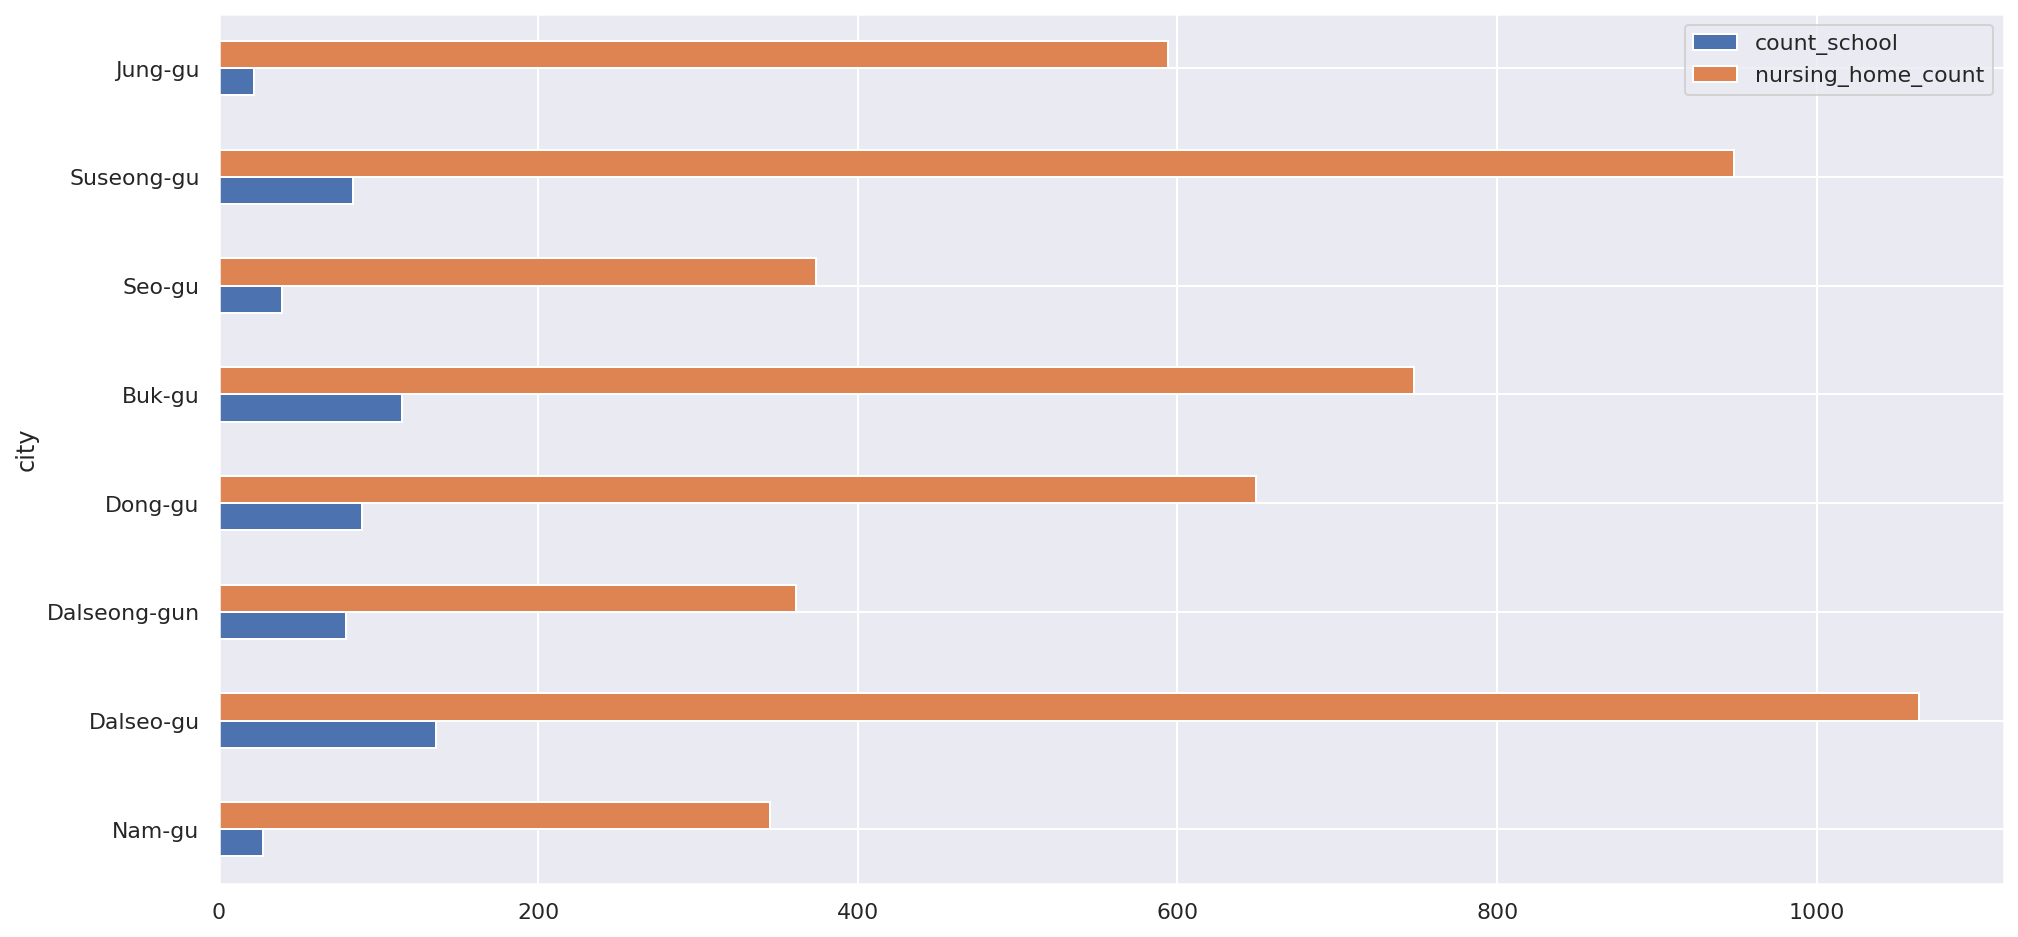

In [159]:
school_count_graph(Daegu)

## 제주

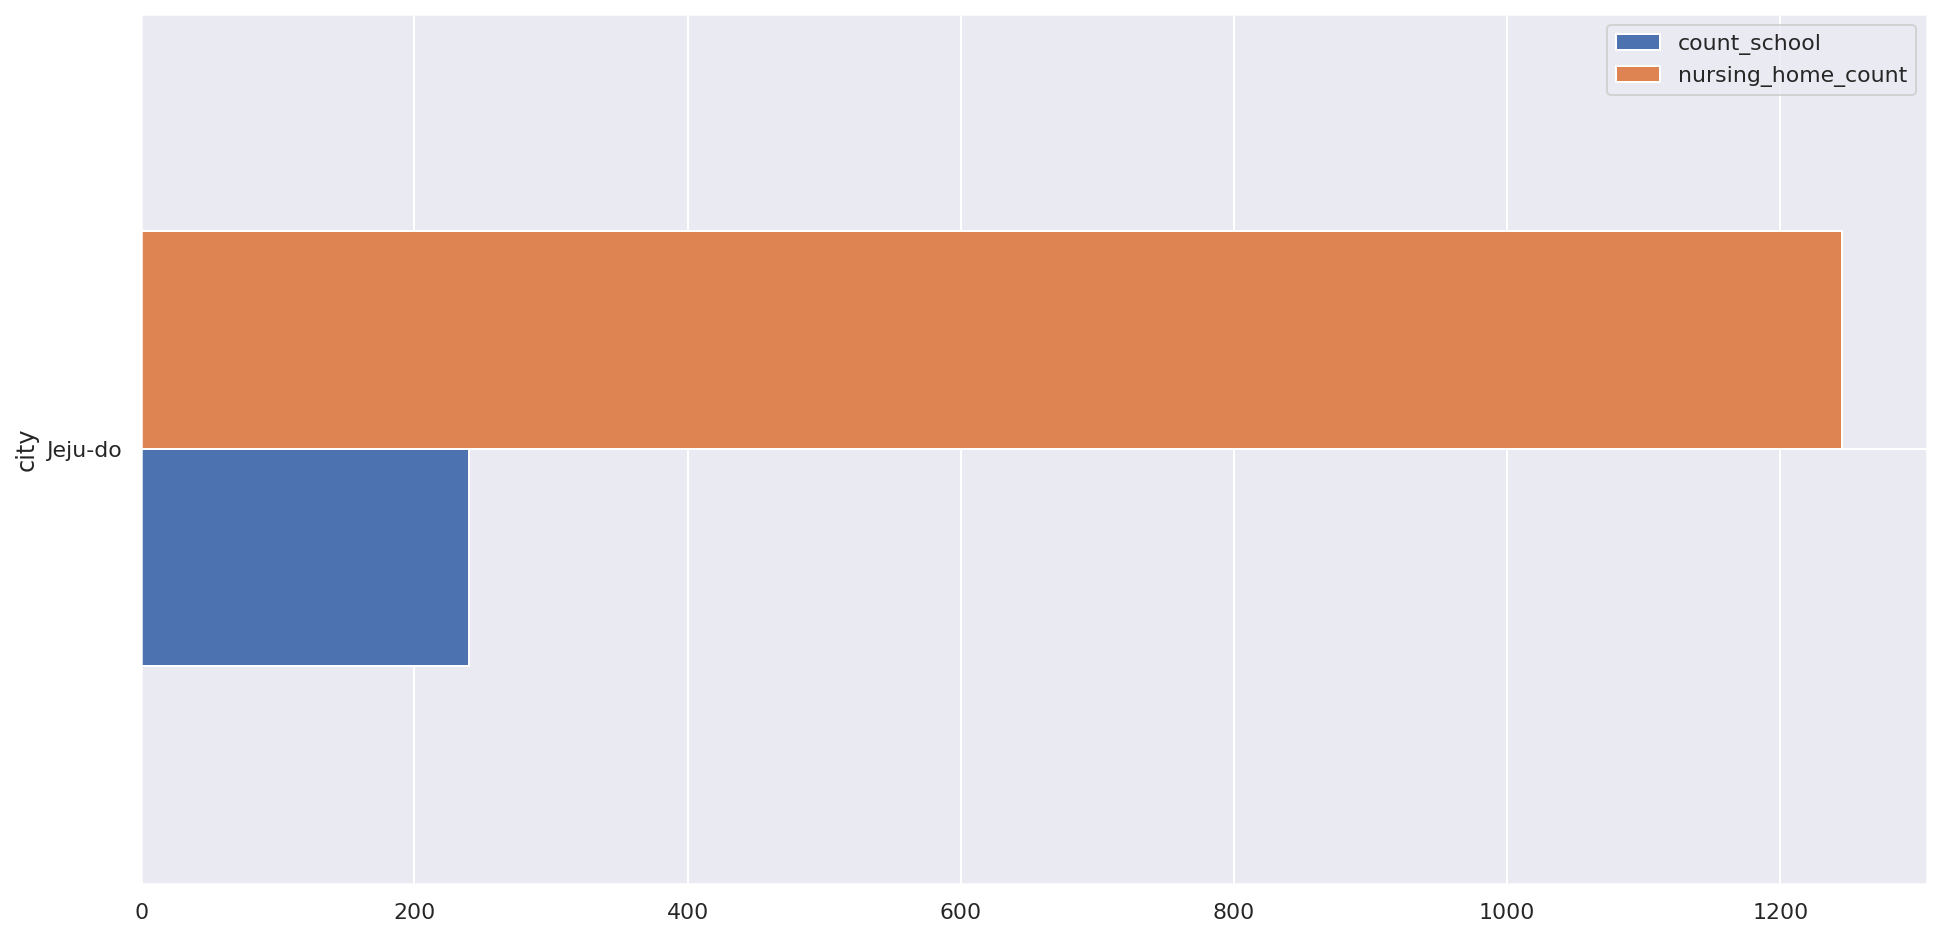

In [160]:
school_count_graph(Jeju)

#### 지역내 도시별로 학교수와 요양원 수를 비교해보려고 하니 그 수가 너무 많고 그래프가 복잡해지는 것 같음. 또한 전국적으로 그 수치를 비교해보고 싶어서 province와 city명이 같은 index만을 따로 모아서 비교해보았다.

In [161]:
province_same_city = [26, 133, 145, 43, 69, 114, 52, 82, 199, 223, 58, 242, 161, 176, 81, 0, 75]

In [162]:
province_same_city_df = region.loc[province_same_city].reset_index()
province_same_city_df

index   code           province               city   latitude   longitude  \
0      26  11000              Busan              Busan  35.179884  129.074796   
1     133  40000  Chungcheongbuk-do  Chungcheongbuk-do  36.635680  127.491384   
2     145  41000  Chungcheongnam-do  Chungcheongnam-do  36.658976  126.673318   
3      43  12000              Daegu          Daegu_all  35.872150  128.601783   
4      69  15000            Daejeon        Daejeon_all  36.350621  127.384744   
5     114  30000         Gangwon-do        Gangwon_all  37.885369  127.729868   
6      52  13000            Gwangju        Gwangju_all  35.160467  126.851392   
7      82  20000        Gyeonggi-do        Gyeonggi-do  37.275119  127.009466   
8     199  60000   Gyeongsangbuk-do   Gyeongsangbuk-do  36.576032  128.505599   
9     223  61000   Gyeongsangnam-do   Gyeongsangnam-do  35.238294  128.692397   
10     58  14000            Incheon            Incheon  37.456188  126.705920   
11    242  70000            Jeju-do            Jeju-do  33.488936  126.500423   
12    161  50000       Jeollabuk-do       Jeollabuk-do  35.820308  127.108791   
13    176  51000       Jeollanam-do       Jeollanam-do  34.816095  126.463021   
14     81  17000             Sejong             Sejong  36.480132  127.289021   
15      0  10000              Seoul              Seoul  37.566953  126.977977   
16     75  16000              Ulsan          Ulsan_all  35.539797  129.311538   

    elementary_school_count  kindergarten_count  university_count  \
0                       304                 408                22   
1                       259                 328                17   
2                       409                 499                21   
3                       229                 355                11   
4                       148                 260                15   
5                       349                 368                18   
6                       155                 312                17   
7                      1277                2237                61   
8                       471                 707                33   
9                       501                 686                21   
10                      250                 403                 7   
11                      113                 123                 4   
12                      419                 519                19   
13                      429                 542                19   
14                       48                  60                 3   
15                      607                 830                48   
16                      119                 200                 4   

    academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0            1.40                     18.41                  8.6   
1            1.39                     17.28                  8.5   
2            1.38                     18.40                  8.9   
3            1.62                     15.78                  7.5   
4            1.49                     13.65                  5.8   
5            1.42                     19.89                  9.8   
6            2.38                     13.57                  6.4   
7            1.60                     12.63                  5.2   
8            1.33                     20.85                 11.1   
9            1.78                     16.51                  9.1   
10           1.27                     13.20                  5.8   
11           1.53                     15.10                  6.4   
12           2.12                     20.60                 10.9   
13           1.45                     22.81                 13.5   
14           1.78                      9.48                  3.8   
15           1.44                     15.38                  5.8   
16           2.21                     11.76                  5.2   

    nursing_home_count  
0                 6752  
1                 2769  
2 

In [163]:
province_same_city_df['school_count'] = province_same_city_df['elementary_school_count'] + province_same_city_df['kindergarten_count'] + province_same_city_df['university_count']

In [164]:
korea_school_nursing_home = pd.DataFrame({'city':province_same_city_df['city'], 'school_count':province_same_city_df['school_count'], 'nursing_home_count':province_same_city_df['nursing_home_count']})
korea_school_nursing_home

city  school_count  nursing_home_count
0               Busan           734                6752
1   Chungcheongbuk-do           604                2769
2   Chungcheongnam-do           929                3641
3           Daegu_all           595                5083
4         Daejeon_all           423                2984
5         Gangwon_all           735                2519
6         Gwangju_all           484                2852
7         Gyeonggi-do          3575               20491
8    Gyeongsangbuk-do          1211                4474
9    Gyeongsangnam-do          1208                5364
10            Incheon           660                4497
11            Jeju-do           240                1245
12       Jeollabuk-do           957                3774
13       Jeollanam-do           990                3389
14             Sejong           111                 491
15              Seoul          1485               22739
16          Ulsan_all           323                1801

In [165]:
korea_school_nursing_home = korea_school_nursing_home.set_index('city')

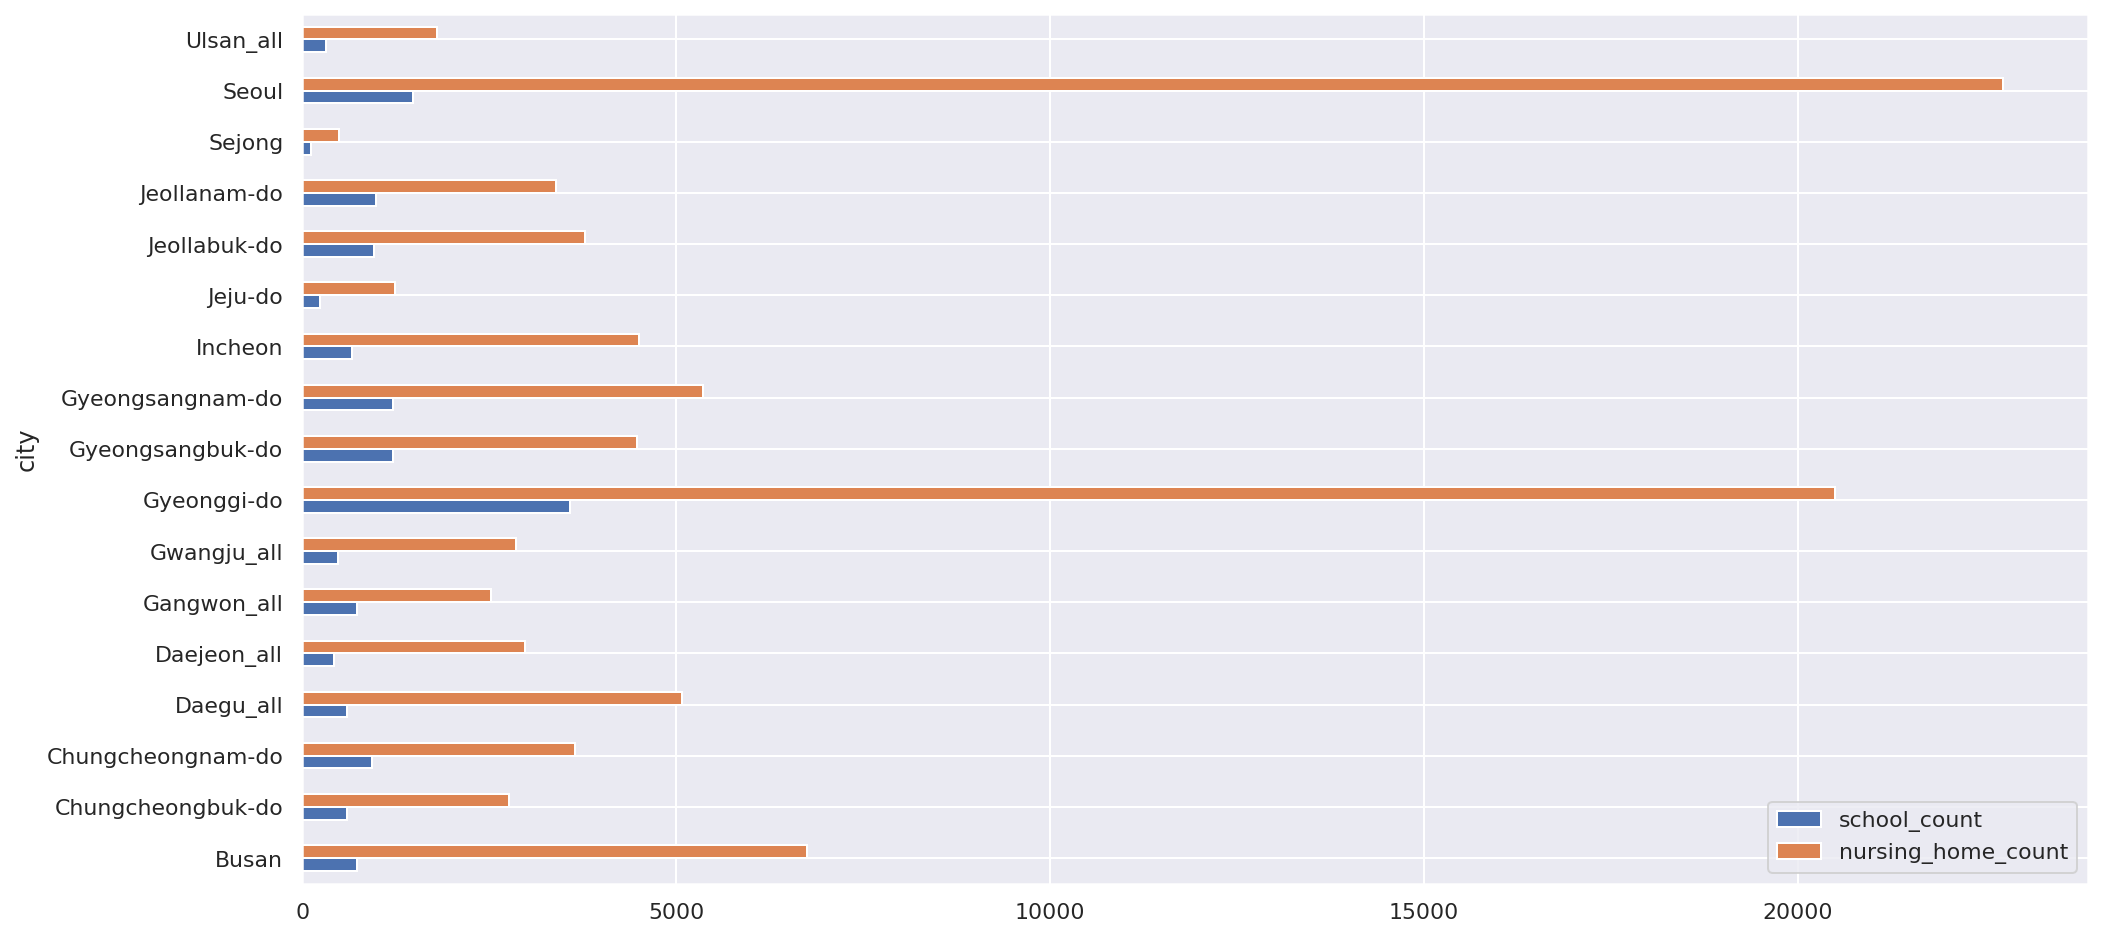

In [166]:
korea_school_nursing_home.plot(kind = "barh", figsize = (16, 8))

In [167]:

region.drop(['code','latitude','longitude'],axis=1,inplace=True)
#region=region.loc[[0,26,43,52,58,69,75,81,82,114,133,147,161,176,199,223,242]]
a=list(set(time_province['province'].values))
def con_city(city):
    if '_all' in city:
        if city=='Gangwon_all':
            return (city[:len(city)-4]+'-do')
        else:
            return (city[:len(city)-4])
    else:
        return (city)
region['city']=region['city'].apply(con_city)
#region['city']=region['city'].apply(convert_province)
region=region.set_index('city').loc[a]

In [168]:
region.drop('province',axis=1,inplace=True)

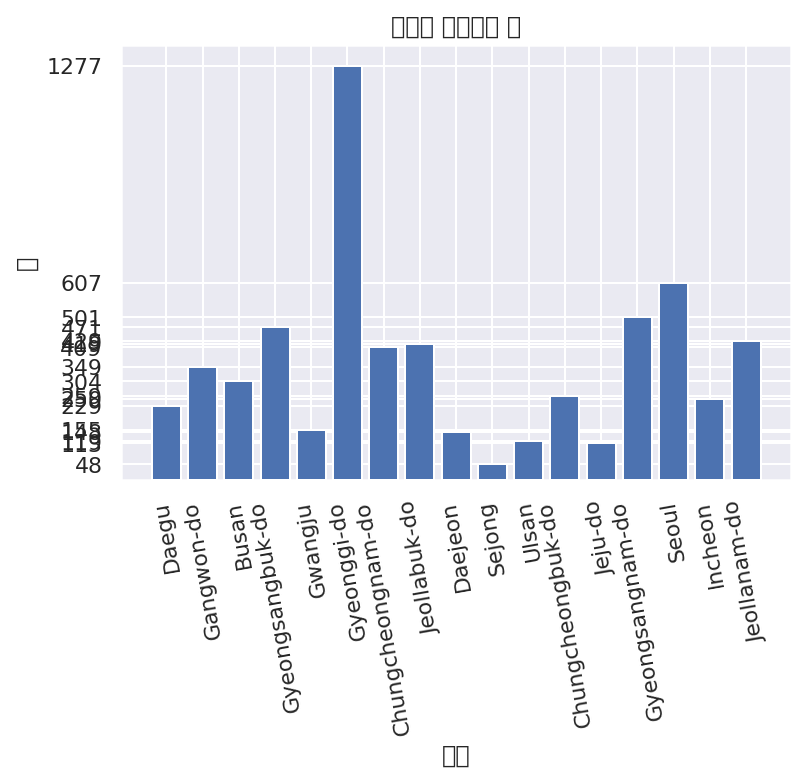

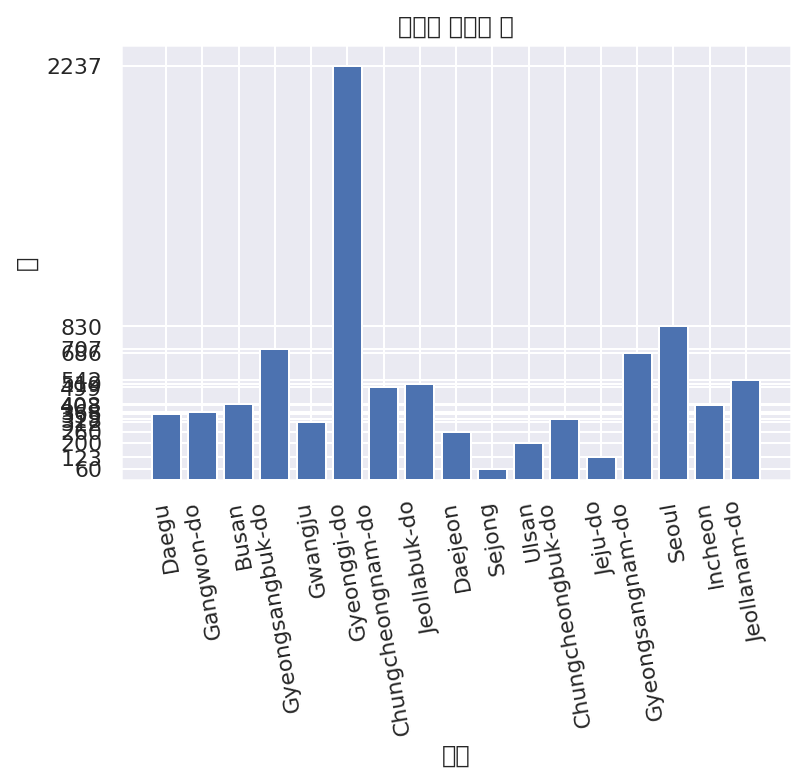

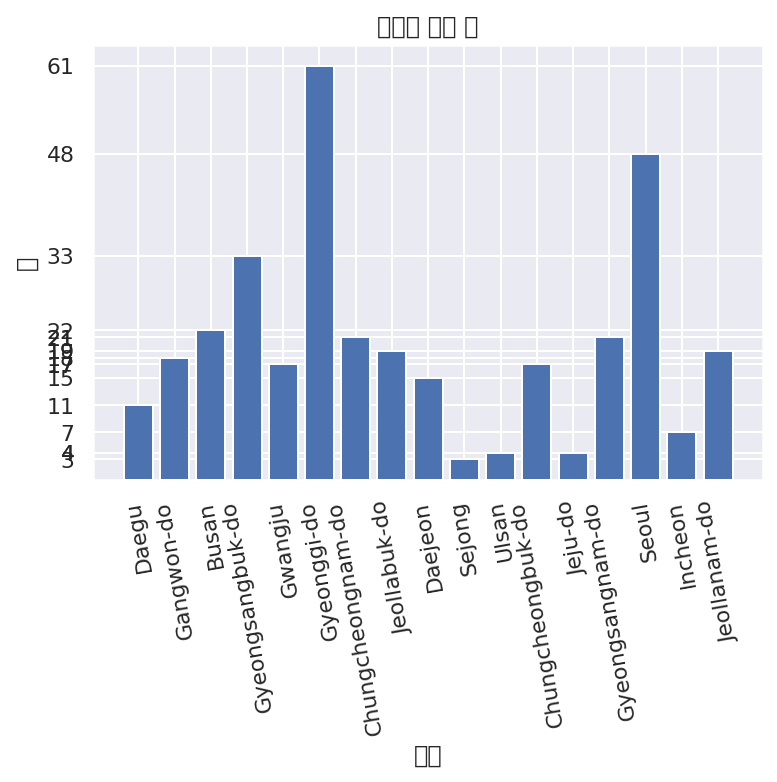

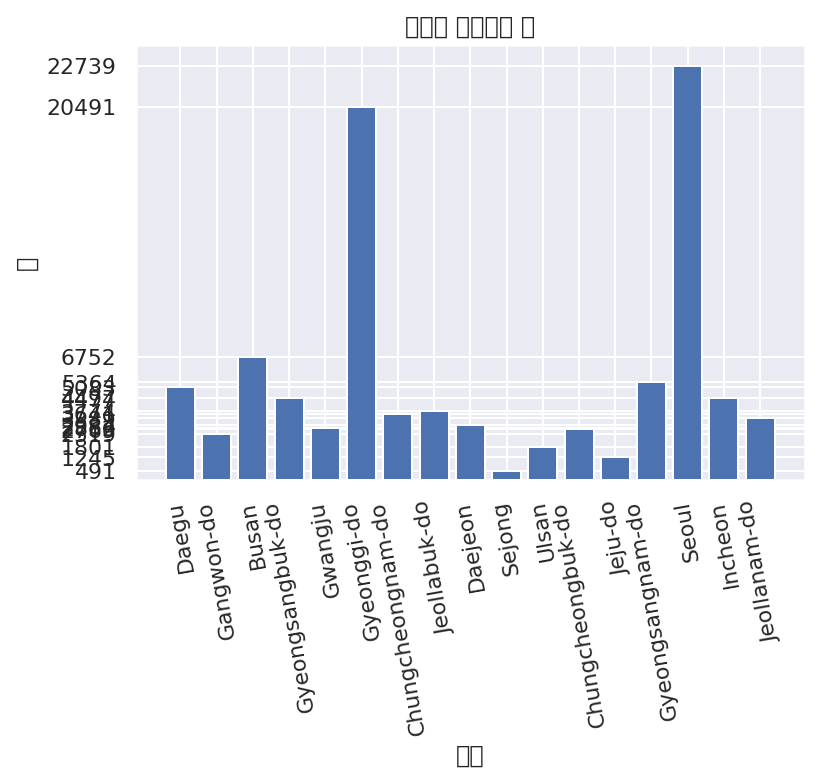

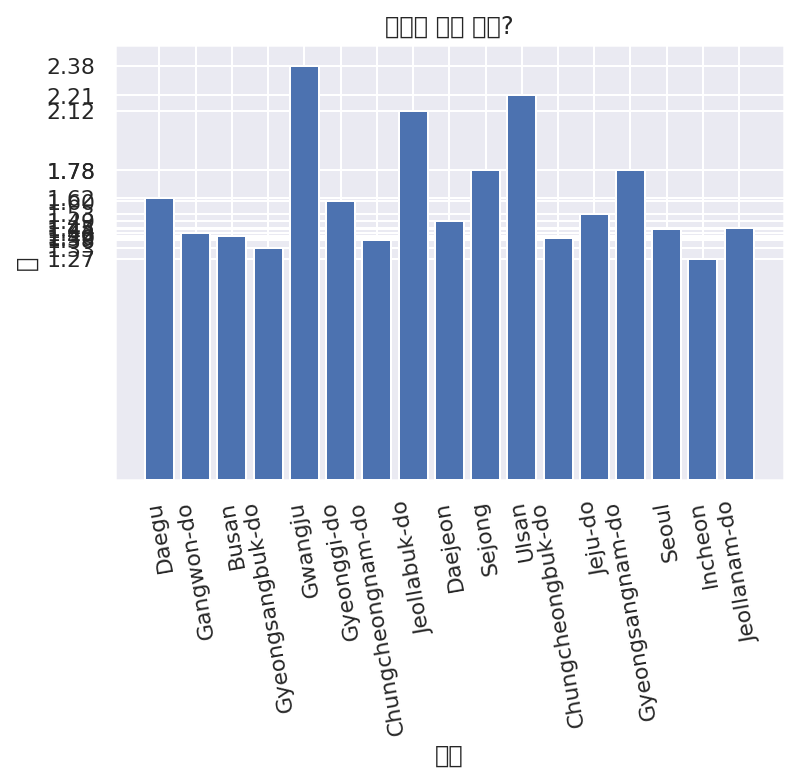

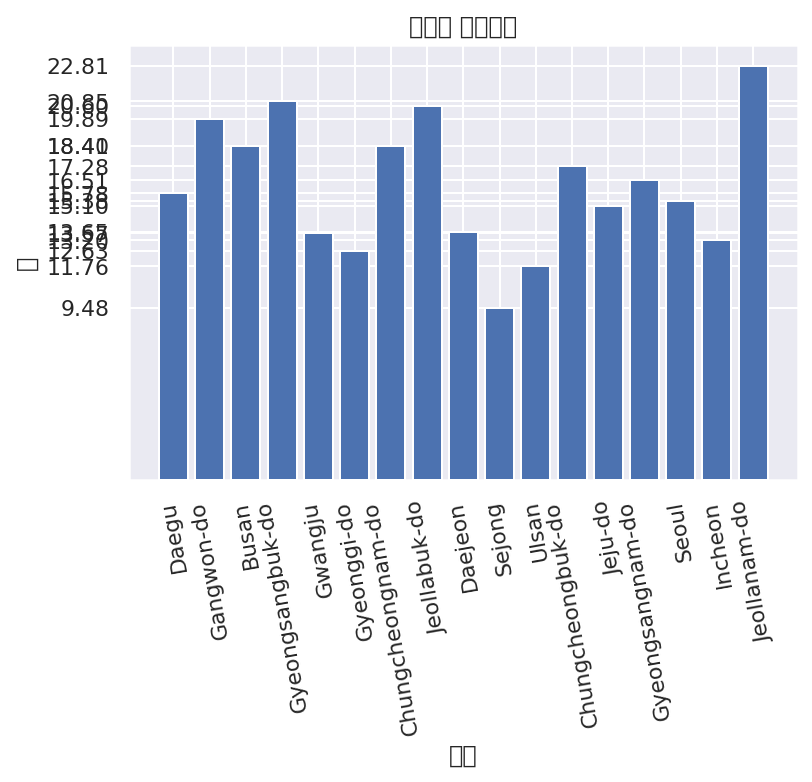

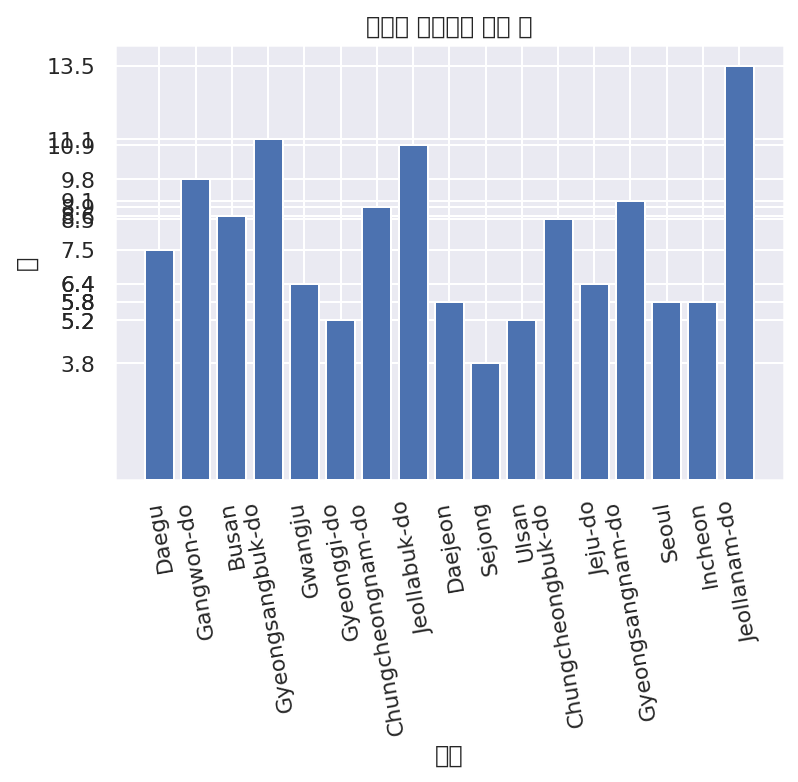

In [169]:
x=region.index
y1=region['elementary_school_count']
y2=region['kindergarten_count']
y3=region['university_count']
y4=region['nursing_home_count']

y5=region['academy_ratio']
y6=region['elderly_population_ratio']
y7=region['elderly_alone_ratio']

xlabel=x
plt.title('지역별 초등학교 수')
plt.bar(x,y1)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y1)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

plt.title('지역별 유치원 수')
plt.bar(x,y2)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y2)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 대학 수')
plt.bar(x,y3)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y3)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 요양병원 수')
plt.bar(x,y4)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y4)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 학원 비율?')
plt.bar(x,y5)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y5)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 노인비율')
plt.bar(x,y6)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y6)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 독거노인 비율 수')
plt.bar(x,y7)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y7)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

#### 이걸로 공공기관 수와 확진자 사이의 수,노인 인구비율과 사망자,확진자 수를 비교하면 좋을 것 같다. time_province와 다르게 시/군/구 까지 지역 위치가 있어 나중에 특정 지역을 분석할 때 유용할듯 나이대 별 감염자 수 차이가 기 때문에 그 지역의 세대별 인구와 연관지어 할 수 있을듯? 일단 나는 time_povince와 연계를 위해 time_province 지역 리스트로 묶어서 해보고 있다. 지역별로 값이 차이가 있어(특히 경기도) 인구별로 나눠볼까 면적으로 나눠볼까 고민중 이다.

# 4-2. Weather 

In [170]:
'''
1. code - region에 있는 지역코드
2. province - 특별시, 광역시, 도
3. data - yyyy-mm-dd 형식으로 되어있음
4. avg_temp - 평균온도
5. min_temp - 최저 온도
6. max_temp - 최고 온도
7. precipitation -  하루 강수량
8. max_wind_speed - 최대 풍속
9. most_wind_direction - 가장 많이 불었던 풍향(최빈, 각도로 나타낸듯)
10. avg_relative_humidity - 평균상대습도 (기온과 음의 관계)
Source of the weather data: KMA (Korea Meteorological Administration)
'''
weather.head()
weather_tail = weather.tail(70)
weather_tail

code province        date  avg_temp  min_temp  max_temp  \
23305  70000  Jeju-do  2020-01-07      19.2      12.8      23.6   
23306  70000  Jeju-do  2020-01-08       8.1       6.9      13.2   
23307  70000  Jeju-do  2020-01-09       7.3       6.7       8.2   
23308  70000  Jeju-do  2020-01-10       8.0       4.3      11.0   
23309  70000  Jeju-do  2020-01-11       8.0       6.9       9.1   
...      ...      ...         ...       ...       ...       ...   
23370  70000  Jeju-do  2020-03-12       9.4       3.8      13.7   
23371  70000  Jeju-do  2020-03-13      11.2       8.2      14.5   
23372  70000  Jeju-do  2020-03-14       8.4       5.9      10.6   
23373  70000  Jeju-do  2020-03-15      11.1       6.8      15.3   
23374  70000  Jeju-do  2020-03-16       7.3       4.6      10.6   

       precipitation  max_wind_speed  most_wind_direction  \
23305           12.4            11.5                200.0   
23306            1.4            11.4                290.0   
23307            0.0             5.2                320.0   
23308            0.0             4.7                 20.0   
23309            0.0             5.4                360.0   
...              ...             ...                  ...   
23370            0.0             3.2                160.0   
23371            0.0             5.7                320.0   
23372            0.0             7.0                320.0   
23373            0.0             9.8                290.0   
23374            0.0             8.6                360.0   

       avg_relative_humidity  
23305                   69.8  
23306                   68.9  
23307                   65.5  
23308                   63.0  
23309                   60.4  
...                      ...  
23370                   58.9  
23371                   56.8  
23372                   48.6  
23373                   50.8  
23374                   53.5  

[70 rows x 10 columns]

In [171]:
weather.shape

(23375, 10)

In [172]:
import seaborn as sns

# 코로나과 화두가 된 2020년 1월 달부터의 온도변화

Text(0.5, 1.0, '시간에 따른 기온변화')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


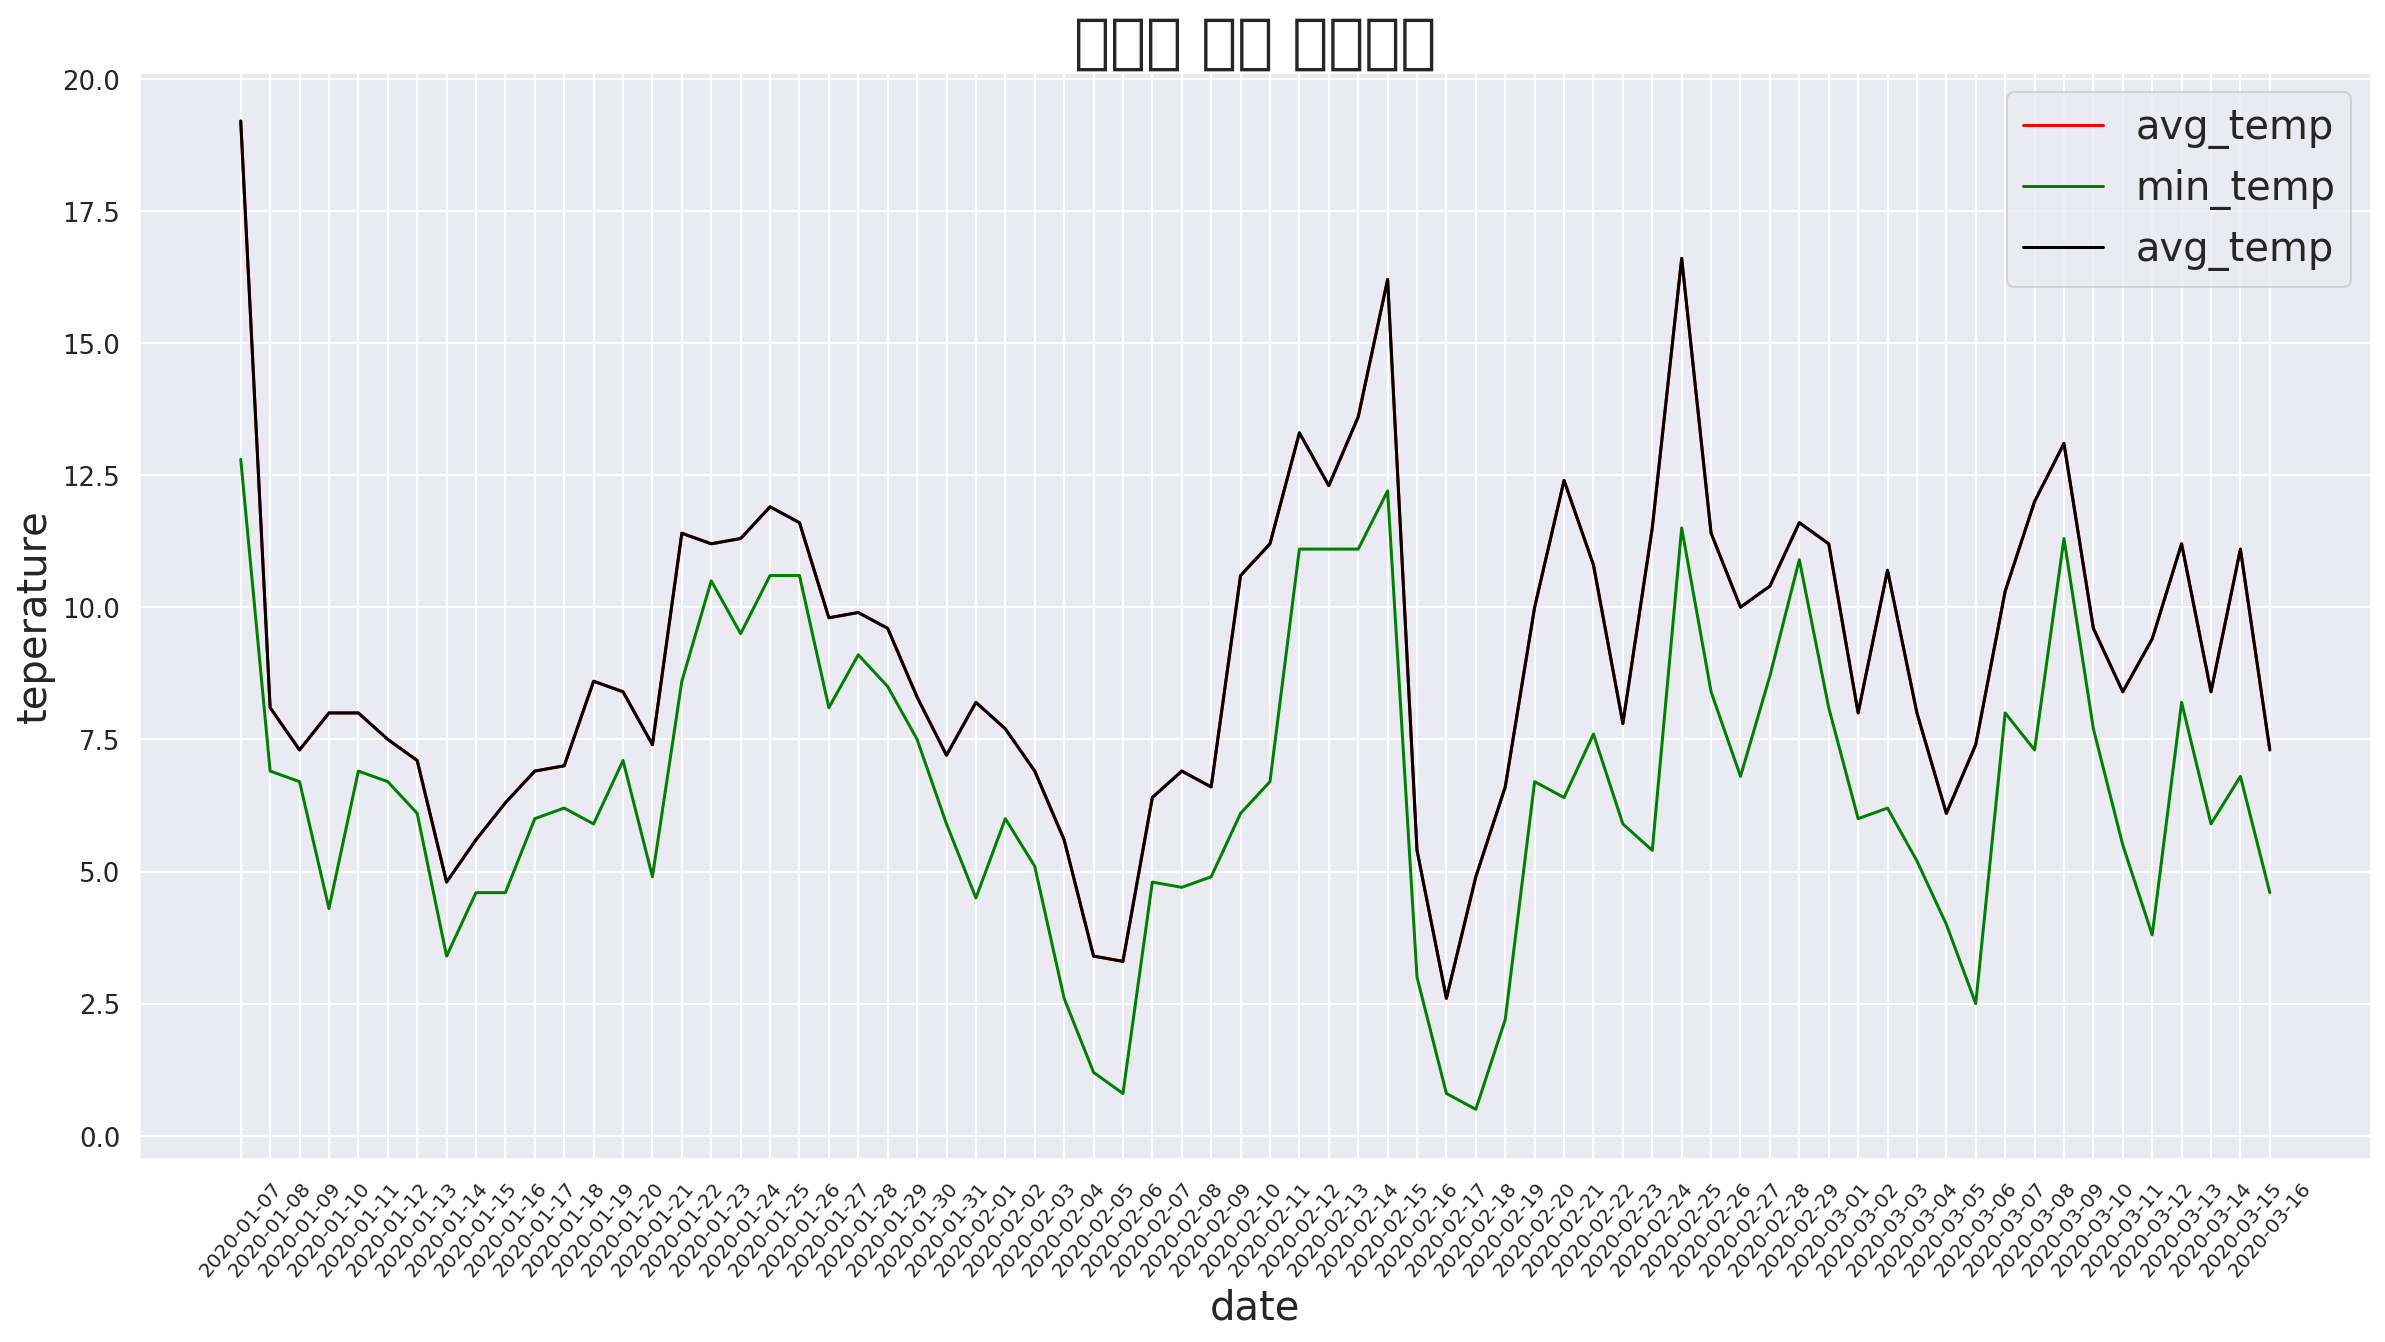

In [173]:

plt.figure(figsize=(20,10))
plt.plot(weather_tail['date'], weather_tail['avg_temp'], color='red')
plt.plot(weather_tail['date'], weather_tail['min_temp'], color='green')
plt.plot(weather_tail['date'], weather_tail['avg_temp'], color='black')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('teperature', fontsize=20)
plt.legend(['avg_temp','min_temp','avg_temp'], loc='best', fontsize=20)
plt.title('시간에 따른 기온변화', size=30)

# 코로나과 화두가 된 2020년 1월 달부터의 온도-습도 그래프

Text(0.5, 1.0, '온도와 습도의 관계')

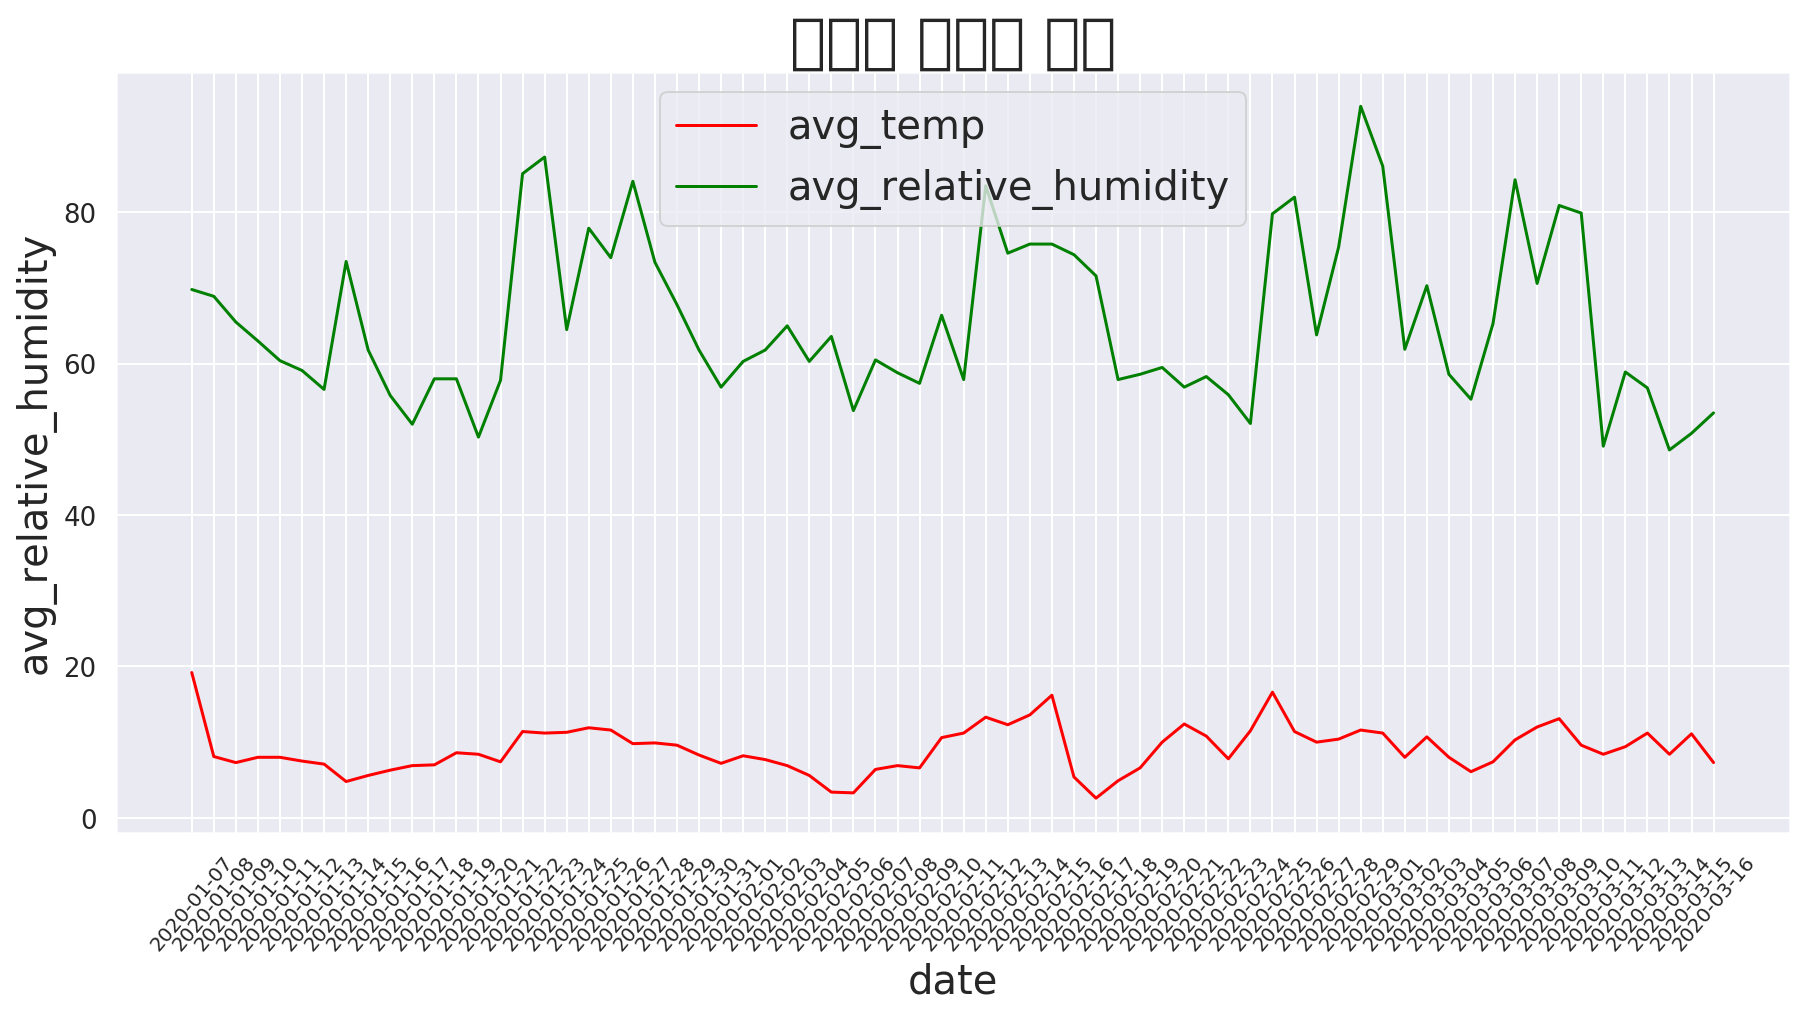

In [174]:
plt.figure(figsize=(15,7))
plt.plot(weather_tail['date'], weather_tail['avg_temp'], color='red')
plt.plot(weather_tail['date'], weather_tail['avg_relative_humidity'], color='green')

plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('avg_relative_humidity', fontsize=20)
plt.legend(['avg_temp','avg_relative_humidity'], loc='best', fontsize=20)
plt.title('온도와 습도의 관계', size=30)

# 4-3. SearchTrend

In [175]:
search_trend.head()

date     cold      flu  pneumonia  coronavirus
0  2016-03-17  0.15554  0.34471    0.18181      0.01236
1  2016-03-18  0.14417  0.49416    0.17563      0.01027
2  2016-03-19  0.13290  0.39907    0.15145      0.01154
3  2016-03-20  0.13863  0.39662    0.14408      0.00945
4  2016-03-21  0.16735  0.56989    0.21199      0.00963

SearchTrend 데이터

2016.03.17 - 2020.03.16 일별 네이버 검색비율이다.

date : 날짜

cold : 감기

flu : 독감

pnuemonia : 폐렴

coronavirus : 코로나

In [176]:
search_trend.isnull().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [177]:
# Time.csv + SearchTrend.csv
time_search = pd.merge(time,search_trend, on=['date'])

### 코로나 바이러스가 퍼진 시점부터 검색량 비율을 비교하기 위해 Time.csv와 SearchTrend.csv를 병합한다.

In [178]:
time_search.shape

(0, 15)

In [179]:
time_search.head()

Empty DataFrame
Columns: [date, test, negative, confirmed, released, deceased, day_test, day_negative, day_confirmed, day_released, day_deceased, cold, flu, pneumonia, coronavirus]
Index: []

In [180]:
# SearchTrend.csv
# 확진자와 코로나 검색량 연관성 확인
x_time = time_search['date']
y_confirm = time_search['confirmed']
y_cold = time_search['cold']*80
y_flu = time_search['flu']*80
y_pneumonia = time_search['pneumonia']*80
y_corona = time_search['coronavirus']*80
import plotly.offline as pyo
import plotly.graph_objs as go
trace1 = go.Bar(x = x_time, y = y_confirm, name = '확진')
trace2 = go.Scatter(x = x_time, y = y_cold, mode = 'lines',name = '감기')
trace3 = go.Scatter(x = x_time, y = y_flu, mode = 'lines',name = '독감')
trace4 = go.Scatter(x = x_time, y = y_pneumonia, mode = 'lines',name = '폐렴')
trace5 = go.Scatter(x = x_time, y = y_corona, mode = 'lines',name = '코로나')
data = [trace1, trace2, trace3, trace4, trace5]
pyo.iplot(data)

### 최초 코로나가 발생한 시점에 가장 많은 검색량이 발생했고, 확진자가 급등하기 시작한 2월 18일부터 5일간 엄청난 증가세를 보였다. 확진자의 증가 추세에 따라 사람들의 심리적 불안감이 나타났음을 의미한다.